# Using welch's t test to compare causes of death

### Importing required libraries

In [1]:
#importing required libraries to clean and preprocess the data
import pandas as pd
import numpy as np
from statistics import variance
import numpy as np
import scipy.stats
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Color index for using it later on
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m' 
    DARKCYAN = '\033[36m' 
    BLUE = '\033[94m' 
    GREEN = '\033[92m' 
    YELLOW = '\033[93m' 
    RED = '\033[91m'
    BOLD = '\033[1m' 
    UNDERLINE = '\033[4m' 
    END = '\033[0m'

__Importing annual death by causes dataset (downloaded from oxford university's portal)__

In [194]:
#dataset source : https://ourworldindata.org/causes-of-death (Oxford University)
#importing the csv file into python
df = pd.read_csv("annual_deaths_by_cause.csv")

__pre-processing the dataset__

In [195]:
df.head(5)

Entity Code  Year Number of executions (Amnesty International)  \
0  Afghanistan  AFG  2007                                           15   
1  Afghanistan  AFG  2008                                           17   
2  Afghanistan  AFG  2009                                            0   
3  Afghanistan  AFG  2011                                            2   
4  Afghanistan  AFG  2012                                           14   

   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)  \
0                                             2933.0          
1                                             2731.0          
2                                             2460.0          
3                                             2327.0          
4                                             2254.0          

   Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)  \
0                                             1402.0                                       
1                                             1424.0                                       
2                                             1449.0                                       
3                                             1508.0                                       
4                                             1544.0                                       

   Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)  \
0                                              450.0                   
1                                              455.0                   
2                                              460.0                   
3                                              473.0                   
4                                              482.0                   

   Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)  \
0                                             2488.0                        
1                                             2277.0                        
2                                             2040.0                        
3                                             1846.0                        
4                                             1705.0                        

   Deaths - Malaria - Sex: Both - Age: All Ages (Number)  \
0                                              393.0       
1                                              255.0       
2                                              239.0       
3                                              390.0       
4                                               94.0       

   Deaths - Drowning - Sex: Both - Age: All Ages (Number)  ...  \
0                                             2127.0       ...   
1                                             1973.0       ...   
2                                             1852.0       ...   
3                                             1775.0       ...   
4                                             1716.0       ...   

   Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)  \
0                                             4490.0                      
1                                             4534.0                      
2                                             4597.0                      
3                                             4785.0                      
4                                             4846.0                      

   Deaths - Poisonings - Sex: Both - Age: All Ages (Number)  \
0                                              512.0          
1                                              495.0          
2                                              483.0          
3                                              483.0          
4                                              482.0          

   Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)  \
0                                             2439.0               

In [193]:
#Droping Excecutions, as in most countries execution is illegal
df.drop(['Number of executions (Amnesty International)'],inplace=True,axis=1)

In [191]:
#Renaming the column names to more suitable names
new_column_names = ['country', 'code', 'year', 'meningitis', "alzheimer's_diesease",
       "parkinson's_disease", 'nutritional_deficiency', 'malaria', "drowning",
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis']

df.set_axis(new_column_names, axis=1, inplace=True)

In [5]:
df

country code  year  meningitis  alzheimer's_diesease  \
0     Afghanistan  AFG  2007      2933.0                1402.0   
1     Afghanistan  AFG  2008      2731.0                1424.0   
2     Afghanistan  AFG  2009      2460.0                1449.0   
3     Afghanistan  AFG  2011      2327.0                1508.0   
4     Afghanistan  AFG  2012      2254.0                1544.0   
...           ...  ...   ...         ...                   ...   
7268     Zimbabwe  ZWE  2015      1439.0                 754.0   
7269     Zimbabwe  ZWE  2016      1457.0                 767.0   
7270     Zimbabwe  ZWE  2017      1460.0                 781.0   
7271     Zimbabwe  ZWE  2018      1450.0                 795.0   
7272     Zimbabwe  ZWE  2019      1450.0                 812.0   

      parkinson's_disease  nutritional_deficiency  malaria  drowning  \
0                   450.0                  2488.0    393.0    2127.0   
1                   455.0                  2277.0    255.0    1973.0   
2                   460.0                  2040.0    239.0    1852.0   
3                   473.0                  1846.0    390.0    1775.0   
4                   482.0                  1705.0     94.0    1716.0   
...                   ...                     ...      ...       ...   
7268                215.0                  3019.0   2518.0     770.0   
7269                219.0                  3056.0   2050.0     801.0   
7270                223.0                  2990.0   2116.0     818.0   
7271                227.0                  2918.0   2088.0     825.0   
7272                232.0                  2884.0   2068.0     827.0   

      interpersonal_violence  ...  chronic_kidney_disease  poisonings  \
0                     3657.0  ...                  4490.0       512.0   
1                     3785.0  ...                  4534.0       495.0   
2                     3874.0  ...                  4597.0       483.0   
3                     4170.0  ...                  4785.0       483.0   
4                     4245.0  ...                  4846.0       482.0   
...                      ...  ...                     ...         ...   
7268                  1302.0  ...                  2108.0       381.0   
7269                  1342.0  ...                  2160.0       393.0   
7270                  1363.0  ...                  2196.0       398.0   
7271                  1396.0  ...                  2240.0       400.0   
7272                  1434.0  ...                  2292.0       405.0   

      protein_energy_malnutrition  terrorism  road_injuries  \
0                          2439.0     1199.0         7425.0   
1                          2231.0     1092.0         7355.0   
2                          1998.0     1065.0         7290.0   
3                          1805.0     1525.0         7432.0   
4                          1667.0     3521.0         7494.0   
...                           ...        ...            ...   
7268                       2990.0        NaN         2373.0   
7269                       3027.0        NaN         2436.0   
7270                       2962.0        0.0         2473.0   
7271                       2890.0        NaN         2509.0   
7272                       2855.0        NaN         2554.0   

      chronic_respiratory_diseases  chronic_liver_diseases  \
0                           7222.0                  3346.0   
1                           7143.0                  3316.0   
2                           7045.0                  3291.0   
3                           6916.0                  3318.0   
4                           6878.0                  3353.0   
...                            ...                     ...   
7268                        2751.0                  1956.0   
7269                        2788.0                  1962.0   
7270                        2818.0                  2007.0   
7271                        2849.0                  2030.0   
7272                        2891.0  

In [6]:
#Overview of the variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

In [7]:
#A statistical summar of the dataset
df.describe()

year     meningitis  alzheimer's_diesease  parkinson's_disease  \
count  7273.000000    6840.000000          6.840000e+03          6840.000000   
mean   2004.425134    8213.149561          2.736319e+04          6493.627339   
std       8.623572   34982.933895          1.113146e+05         25767.447063   
min    1990.000000       0.000000          0.000000e+00             0.000000   
25%    1997.000000      19.000000          1.287500e+02            37.000000   
50%    2004.000000     150.500000          8.455000e+02           209.000000   
75%    2012.000000    1622.250000          4.251000e+03           984.000000   
max    2019.000000  432524.000000          1.623276e+06        362907.000000   

       nutritional_deficiency        malaria       drowning  \
count             6840.000000    6840.000000    6840.000000   
mean             11006.353947   18903.160234    8619.055117   
std              48289.687100   97346.780570   35879.406010   
min                  0.000000       0.000000       0.000000   
25%                 11.000000       0.000000      39.000000   
50%                159.000000       0.000000     253.000000   
75%               2204.000000    1017.250000    1014.250000   
max             757152.000000  961129.000000  460665.000000   

       interpersonal_violence  maternal_disorders      hiv/aids  ...  \
count             6840.000000         6840.000000  6.840000e+03  ...   
mean             10636.648684         6131.066959  2.814125e+04  ...   
std              40888.793762        26355.210370  1.391973e+05  ...   
min                  0.000000            0.000000  0.000000e+00  ...   
25%                 48.000000            6.000000  1.400000e+01  ...   
50%                342.000000           70.500000  1.870000e+02  ...   
75%               1391.250000         1244.500000  3.836500e+03  ...   
max             463129.000000       302586.000000  1.844490e+06  ...   

       chronic_kidney_disease    poisonings  protein_energy_malnutrition  \
count            6.840000e+03   6840.000000                  6840.000000   
mean             2.506893e+04   2145.455848                  9531.528801   
std              9.600839e+04   8433.507625                 41689.675155   
min              0.000000e+00      0.000000                     0.000000   
25%              2.140000e+02      8.000000                     6.000000   
50%              1.080000e+03     72.000000                   120.000000   
75%              4.497500e+03    371.000000                  2120.000000   
max              1.427232e+06  92101.000000                656314.000000   

          terrorism  road_injuries  chronic_respiratory_diseases  \
count   2891.000000   6.840000e+03                  6.840000e+03   
mean     349.235905   3.063496e+04                  9.130390e+04   
std     1917.143788   1.166999e+05                  3.772013e+05   
min        0.000000   0.000000e+00                  1.000000e+00   
25%        0.000000   2.077500e+02                  3.685000e+02   
50%        5.000000   1.239500e+03                  2.104000e+03   
75%       60.000000   5.786250e+03                  9.013250e+03   
max    44490.000000   1.285039e+06                  3.974315e+06   

       chronic_liver_diseases  digestive_diseases  fire_heat_hot_substance  \
count            6.840000e+03        6.840000e+03              6840.000000   
mean             3.189892e+04        5.652551e+04              3006.043275   
std              1.194387e+05        2.109884e+05             11211.885249   
min              0.000000e+00        0.000000e+00                 0.000000   
25%              2.047500e+02        4.000000e+02                21.000000   
50%              1.541000e+03        2.778500e+03               152.000000   
75%              5.670500e+03        9.594000e+03               593.250000   
max              1.472012e+06        2.557689e+06            129705.000000   

       acute_hepatitis  
count      6840.000000  
mean       3112.066520  


In [8]:
df.head(5)

country code  year  meningitis  alzheimer's_diesease  \
0  Afghanistan  AFG  2007      2933.0                1402.0   
1  Afghanistan  AFG  2008      2731.0                1424.0   
2  Afghanistan  AFG  2009      2460.0                1449.0   
3  Afghanistan  AFG  2011      2327.0                1508.0   
4  Afghanistan  AFG  2012      2254.0                1544.0   

   parkinson's_disease  nutritional_deficiency  malaria  drowning  \
0                450.0                  2488.0    393.0    2127.0   
1                455.0                  2277.0    255.0    1973.0   
2                460.0                  2040.0    239.0    1852.0   
3                473.0                  1846.0    390.0    1775.0   
4                482.0                  1705.0     94.0    1716.0   

   interpersonal_violence  ...  chronic_kidney_disease  poisonings  \
0                  3657.0  ...                  4490.0       512.0   
1                  3785.0  ...                  4534.0       495.0   
2                  3874.0  ...                  4597.0       483.0   
3                  4170.0  ...                  4785.0       483.0   
4                  4245.0  ...                  4846.0       482.0   

   protein_energy_malnutrition  terrorism  road_injuries  \
0                       2439.0     1199.0         7425.0   
1                       2231.0     1092.0         7355.0   
2                       1998.0     1065.0         7290.0   
3                       1805.0     1525.0         7432.0   
4                       1667.0     3521.0         7494.0   

   chronic_respiratory_diseases  chronic_liver_diseases  digestive_diseases  \
0                        7222.0                  3346.0              6458.0   
1                        7143.0                  3316.0              6408.0   
2                        7045.0                  3291.0              6358.0   
3                        6916.0                  3318.0              6370.0   
4                        6878.0                  3353.0              6398.0   

   fire_heat_hot_substance  acute_hepatitis  
0                    481.0           3437.0  
1                    462.0           3005.0  
2                    448.0           2663.0  
3                    448.0           2365.0  
4                    445.0           2264.0  

[5 rows x 35 columns]

__User Defined Function : Filling NA values__

In [9]:
#Function to fill NA values
def fillNa(df):
    columnNames = list(df.columns)
    for col in columnNames: 
        df[col] = df[col].fillna(df[col].mean())

__User Defined Function : Creating subsets based on country__

In [10]:
#Functio to create a subset based ont the country name
def getSubset(df, countryName):
    
    df_new = df[df["country"]==countryName] #Creating a subset with only the specific country's data
    #Removing the redundant columns
    df_new.index = df_new["year"] #Setting year as the index valus
    df_new.drop(["country","code","year"],inplace=True, axis=1) # Dropping all categorical columns
    fillNa(df_new) #Filling NA or missing values
    #Typecasting deaths to integers
    df_new[list(df_new.columns)] = df_new[list(df_new.columns)].astype("int64") 
    
    return df_new

__User Defined Function : Creating a subset of all countries except queried__

In [11]:
#Creating a subset with countries except specified country
#row : rest of the world
def rowSubset(df,df_to_be_removed):
    df_row = df.drop(df_to_be_removed.index)
    #Filling the na values of Rest of the world dataframe
    fillNa(df_row.iloc[:,3:35])
    df_row.dropna(inplace=True)
    df_row['year'] = df_row['year'].astype("object")
    df_row = df_row.groupby(['year']).mean().round()
    df_row[list(df_row.columns)] = df_row[list(df_row.columns)].astype("int64")
    
    return df_row

__User Defined Function : conducting Welch's t-test for all variables of two datasets__

In [12]:
#Welch's t test of unequal variance
def t_test(df1, df2):
    p_values = []
    for col in list(df1.columns):
        x = scipy.stats.ttest_ind(a=np.array(df1[col]), b=np.array(df2[col]), equal_var=False)
        p_values.append([col,x[0],x[1]])
    
    return p_values

__User Defined Function : to check whether the p values are greater than level of significance__

In [13]:
def acceptedVals(arr,level_of_sig):
    acceptance = 1-lev
    for x in level_of_sig:
        if x[2]>0.05:
            print(x)

__User Defined Function : For header of the generalised t-test result__

In [14]:
def headerResult(country1,country2,level_of_sig,variable,statistic,p_value):
    header = (color.BLUE+" Welch's T Test for comparing "+country1+
    "'s and "+country2+"'s "+variable+" deaths. "+color.END)
    print(header.center(110,"-"))

    print("\n -> "+color.UNDERLINE+"Null Hypothesis (Ho) [µO=µ1]" +color.END +
        "\nThere is no significant difference in the average of deaths caused by "
         +variable+" in ",country1 + " and " + country2 + "." )

    print("\n -> "+color.UNDERLINE+ "Allternate Hypothesis (H1) [µO≠µ1]" +color.END +
        "\nThere is a significant difference in the average of deaths caused by "
         +variable+" in ",country1 + " and " + country2 +".")
    
    print("\n -> "+color.UNDERLINE+ "Confidence Level Interval : " +color.END + str(1-level_of_sig))

    print(color.BOLD+"\n- Statistic (t) value : " +color.END , round(float(statistic),9))
    print(color.BOLD+"- Probability (p) value : " +color.END , "{:.40f}". format(p_value))  

__User Defined Function : to plot a line graph and a bar plot of the values of given variable__

In [162]:
def plotGraph(df1, df2, variable,country1,country2):
    
    palette = sns.color_palette()

    c1 = random.choice(palette)
    idx = palette.index(c1)
    palette.pop(idx)
    c2 = random.choice(palette)
    
    plt.figure(figsize=(5, 5))
    plt.title(str(variable + " (DEATHS PER 100,000 OF POPULATION)"))
    plot_one = sns.lineplot(data = df1, x = 'year', y = variable, color = c1 , label = country1)
    plot_two = sns.lineplot(data = df2, x = 'year', y = variable, color = c2, label = country2)
    plt.show()
    

    plt.figure(figsize=(5, 5))
    plt.title("Average Deaths per 100,000 from 1990-2021")
    plt.bar(x=[country1,country2],height=[df1[variable].mean(),
                                          df2[variable].mean()],color=[c1,c2])
    plt.show()
    

__User Defined Function : To properly display the Welch's t-test result and visualisations__

In [163]:
def finalResult(df1,df2,values,country1,country2,level_of_sig,show_only_nnullAcceptance = False):
    for val in values:
        variable = val[0]
        statistic = val[1]
        p_value = val[2]
        

        #Rejecting null hypothesis
        if p_value<level_of_sig:
            
            if show_only_nnullAcceptance:
                pass
            
            else:
                headerResult(country1,country2,level_of_sig,variable,statistic,p_value)
                print(color.BOLD + "\n- Decision" +color.END)
                print("As p value (", "{:.40f}". format(p_value) , 
                      ") is less than level of significance (" , level_of_sig,
                      "),\nWe Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}")

                print(color.BOLD + "\n- Statistical Inference" +color.END)
                print("There is a significant difference in the average of no. deaths caused by "
                 +variable+" in ",country1 + " and " + country2 +"."+
                      "\nTime period : Past 30 years (1991-2019)\n")
                

                plotGraph(df1,df2,variable,country1,country2)
                plt.pause(0.0001)
                
                print("\n")
                print("-"*100)
                print("\n")
                
        
        else:
            
            headerResult(country1,country2,level_of_sig,variable,statistic,p_value)
            print(color.BOLD + "\n- Decision" +color.END)
            print("As p value (", "{:.40f}". format(p_value) , 
                  ") is greater than level of significance (" , level_of_sig,
                  "),\nWe Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}")
            
            print(color.BOLD + "\n- Statistical Inference" +color.END)
            print("There is no significant difference in the average of no. deaths caused by "
             +variable+" in ",country1 + " and " + country2 +"."+
                  "\nTime period : Past 30 years (1991-2019)\n")
            
            plotGraph(df1,df2,variable,country1,country2)
            plt.pause(0.0001)
        
            print("\n")
            print("-"*100)
            print("\n")

__User Defined Function : Standardize the datasets according to deaths per 100,000 people of a population__

In [164]:
#Creating a user-defined function to standardize the data for every 100,000 people in the population
def normalizeDf(df_cont,pop_arr):
    for index in range(0,len(df_cont)):
        df_cont.iloc[index] = (df_cont.iloc[index]/pop_arr[index])*100000

__Creating subsets using previously created user-defined function, according to country name__

In [165]:
#Getting subsets (samples) of data for 36 variables, 30 years for these specific countries
df_india = getSubset(df,"India").sort_index(ascending=True)
df_china = getSubset(df,"China").sort_index(ascending=True)
df_usa = getSubset(df, "United States").sort_index(ascending=True)
df_uk = getSubset(df, "United Kingdom").sort_index(ascending=True)
df_som = getSubset(df, "Somalia").sort_index(ascending=True)

__Importing the file that holds population of the above countries (downloaded from world statistics forum)__

In [166]:
#Importing the population of the 5 countries to be analysed
df_population = pd.read_excel("population.xlsx")

In [167]:
df_population

Country  Year  Population
0      India  1990   870452165
1      India  1991   888941756
2      India  1992   907574049
3      India  1993   926351297
4      India  1994   945261958
..       ...   ...         ...
145  Somalia  2015    13763906
146  Somalia  2016    14292847
147  Somalia  2017    14864221
148  Somalia  2018    15411094
149  Somalia  2019    15981300

[150 rows x 3 columns]

__Standrdizing data according to their respective populations__

In [168]:
#Population of countries in order from 1990 to 2019
india_population_arr = list(df_population[df_population["Country"]=="India"]["Population"])
som_population_arr = list(df_population[df_population["Country"]=="Somalia"]["Population"])
uk_population_arr = list(df_population[df_population["Country"]=="UK"]["Population"])
usa_population_arr = list(df_population[df_population["Country"]=="USA"]["Population"])
china_population_arr = list(df_population[df_population["Country"]=="China"]["Population"])

In [169]:
#Normalising the dataset to make the data uniform to deaths per 1000 of the population
normalizeDf(df_india,india_population_arr)
normalizeDf(df_som,som_population_arr)
normalizeDf(df_uk,uk_population_arr)
normalizeDf(df_usa,usa_population_arr)
normalizeDf(df_china,china_population_arr)

__Performing t-test with the help of pre-defined functions__

In [181]:
# Welch's t-test on specific country combinations using user-defined functions
us_china_t_test = t_test(df_usa,df_china)
us_uk_t_test = t_test(df_usa,df_uk)
usa_som_t_test = t_test(df_usa,df_som)
usa_india_t_test = t_test(df_india,df_usa)
ind_uk_t_test = t_test(df_india,df_uk)
ind_chn_t_test = t_test(df_india,df_china)

# Final tests

## Comparing India and USA's causes of death

----------------- Welch's T Test for comparing USA's and INDIA's meningitis deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by meningitis in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by meningitis in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  12.115706723
- Probability (p) value :  0.0000000000006806259190777065682339845710

- Decision
As p value ( 0.0000000000006806259190777065682339845710 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by meningitis in  USA and INDIA.
Time period : Past 30 years (1991-2019)



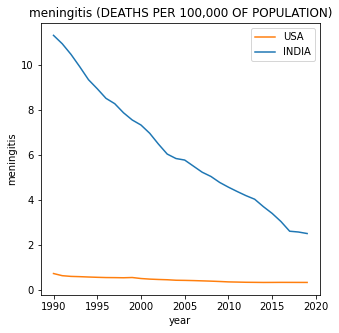

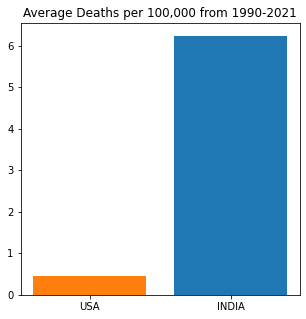



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and INDIA's alzheimer's_diesease deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alzheimer's_diesease in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alzheimer's_diesease in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -44.034159342
- Probability (p) value :  0.0000000000000000000000000000000000000022

- Decision
As p value ( 0.0000000000000000000000000000000000000022 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alzheimer's_diesease in  USA and INDIA.
Time period : Past 30 years (19

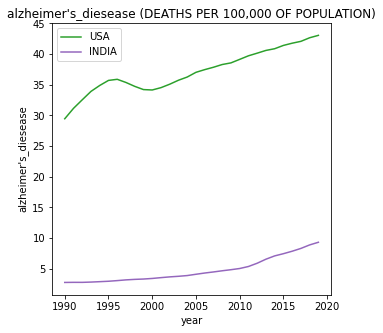

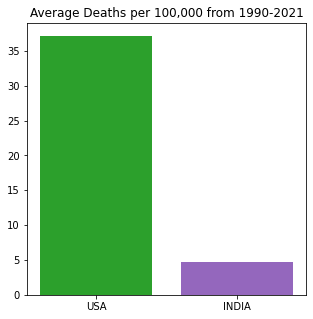



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and INDIA's parkinson's_disease deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by parkinson's_disease in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by parkinson's_disease in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -19.741208915
- Probability (p) value :  0.0000000000000000000027966672365684876316

- Decision
As p value ( 0.0000000000000000000027966672365684876316 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by parkinson's_disease in  USA and INDIA.
Time period : Past 30 years (1991-

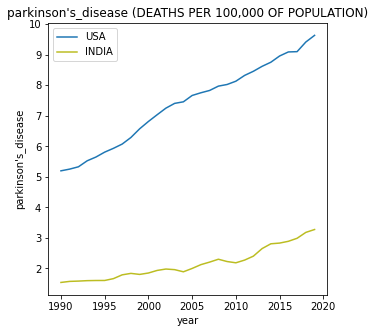

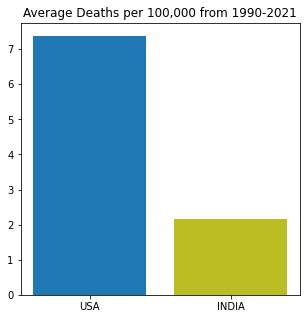



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and INDIA's nutritional_deficiency deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by nutritional_deficiency in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by nutritional_deficiency in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  5.798479997
- Probability (p) value :  0.0000027618091169853716406823538470627355

- Decision
As p value ( 0.0000027618091169853716406823538470627355 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by nutritional_deficiency in  USA and INDIA.
Time period : Past 30 years

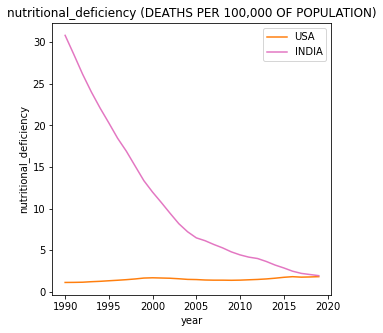

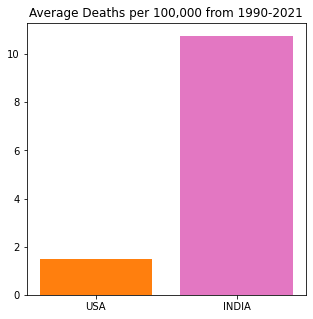



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing USA's and INDIA's malaria deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by malaria in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by malaria in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  8.622046099
- Probability (p) value :  0.0000000017025710739845383730019215184686

- Decision
As p value ( 0.0000000017025710739845383730019215184686 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by malaria in  USA and INDIA.
Time period : Past 30 years (1991-2019)



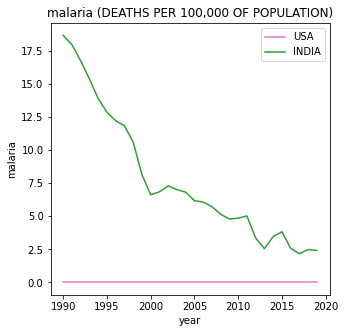

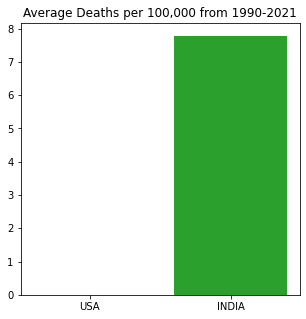



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing USA's and INDIA's drowning deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drowning in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drowning in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  14.685889042
- Probability (p) value :  0.0000000000000041956744748893951738128778

- Decision
As p value ( 0.0000000000000041956744748893951738128778 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drowning in  USA and INDIA.
Time period : Past 30 years (1991-2019)



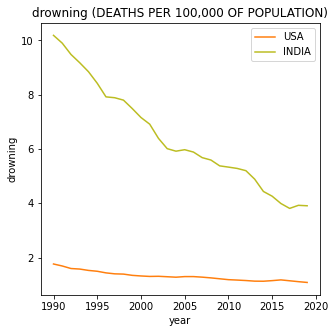

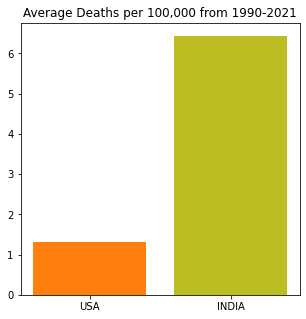



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and INDIA's interpersonal_violence deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by interpersonal_violence in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by interpersonal_violence in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -10.298838638
- Probability (p) value :  0.0000000000045064417415947465101472520593

- Decision
As p value ( 0.0000000000045064417415947465101472520593 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by interpersonal_violence in  USA and INDIA.
Time period : Past 30 yea

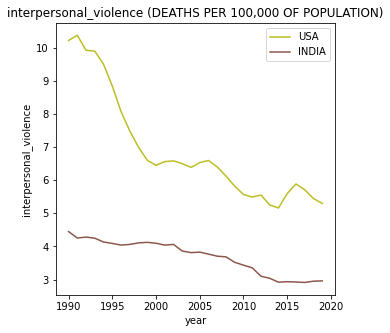

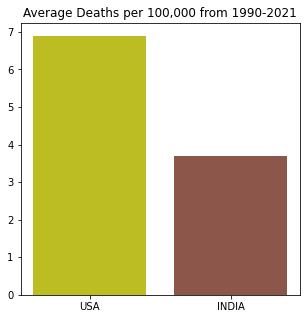



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and INDIA's maternal_disorders deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by maternal_disorders in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by maternal_disorders in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  12.222126527
- Probability (p) value :  0.0000000000005702382011567689429874714489

- Decision
As p value ( 0.0000000000005702382011567689429874714489 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by maternal_disorders in  USA and INDIA.
Time period : Past 30 years (1991-2019

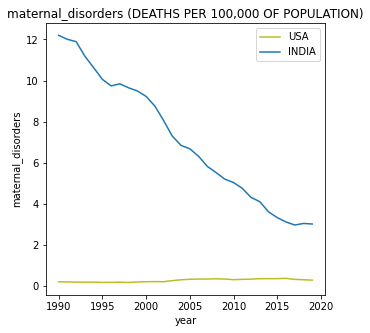

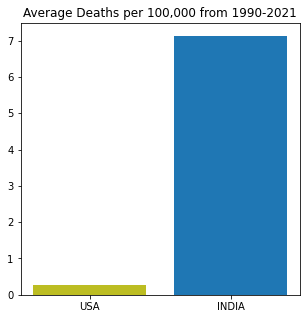



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing USA's and INDIA's hiv/aids deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by hiv/aids in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by hiv/aids in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.494069489
- Probability (p) value :  0.6231231832055129649106106626277323812246

- Decision
As p value ( 0.6231231832055129649106106626277323812246 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by hiv/aids in  USA and INDIA.
Time period : Past 30 years (1991-2019)



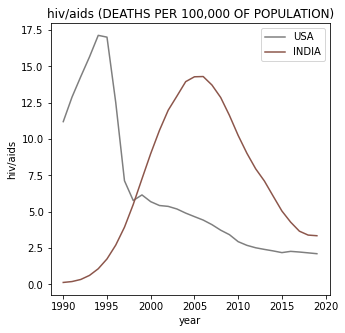

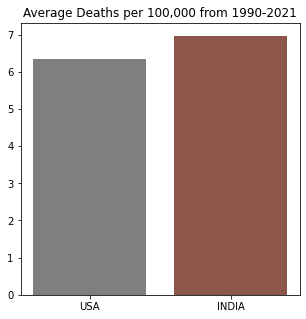



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and INDIA's drug_use_disorders deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drug_use_disorders in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drug_use_disorders in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -8.41293598
- Probability (p) value :  0.0000000028446648187627561208767214528384

- Decision
As p value ( 0.0000000028446648187627561208767214528384 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drug_use_disorders in  USA and INDIA.
Time period : Past 30 years (1991-2019)

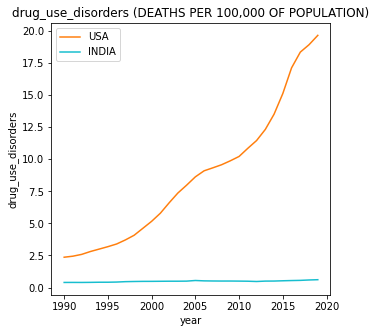

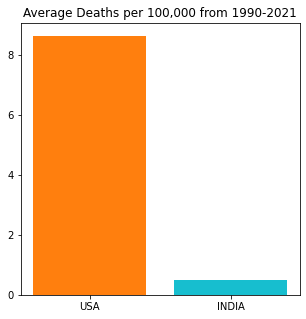



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing USA's and INDIA's tuberculosis deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by tuberculosis in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by tuberculosis in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  19.380716352
- Probability (p) value :  0.0000000000000000038003330459753580001097

- Decision
As p value ( 0.0000000000000000038003330459753580001097 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by tuberculosis in  USA and INDIA.
Time period : Past 30 years (1991-2019)



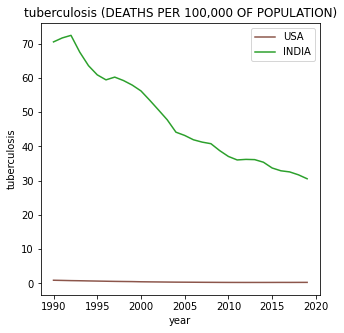

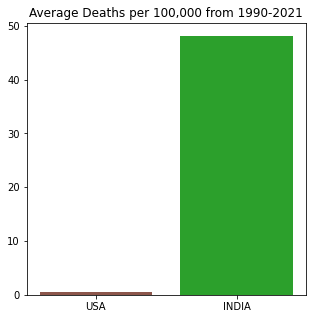



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and INDIA's cardiovascular_diseases deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by cardiovascular_diseases in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by cardiovascular_diseases in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -22.836946271
- Probability (p) value :  0.0000000000000000000000005024128505809994

- Decision
As p value ( 0.0000000000000000000000005024128505809994 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by cardiovascular_diseases in  USA and INDIA.
Time period : Past 30 

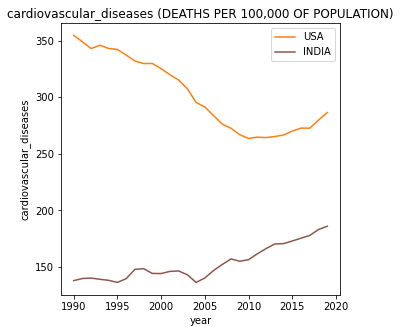

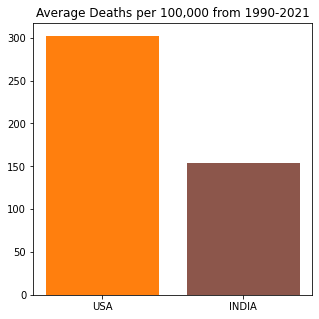



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and INDIA's lower_respiratory_infections deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by lower_respiratory_infections in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by lower_respiratory_infections in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  8.974494764
- Probability (p) value :  0.0000000003391191406232006737972518447627

- Decision
As p value ( 0.0000000003391191406232006737972518447627 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by lower_respiratory_infections in  USA and INDIA.
Time peri

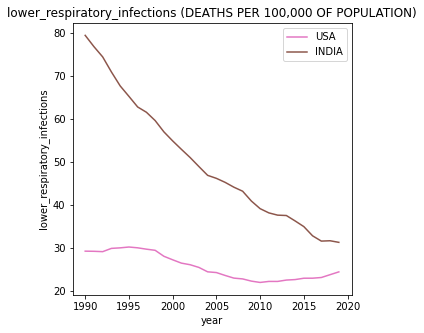

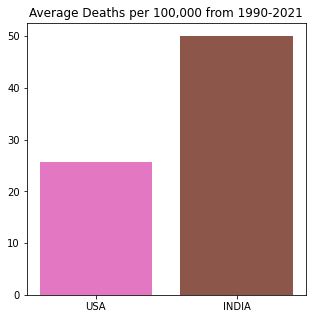



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and INDIA's neonatal_disorders deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neonatal_disorders in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neonatal_disorders in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  16.673419428
- Probability (p) value :  0.0000000000000001837615508647436485874212

- Decision
As p value ( 0.0000000000000001837615508647436485874212 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neonatal_disorders in  USA and INDIA.
Time period : Past 30 years (1991-2019

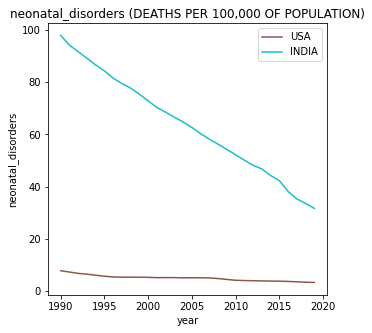

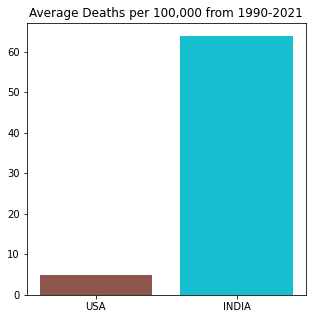



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and INDIA's alcohol_use_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alcohol_use_disorders in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alcohol_use_disorders in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -18.077485928
- Probability (p) value :  0.0000000000000000125654315406549576845572

- Decision
As p value ( 0.0000000000000000125654315406549576845572 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alcohol_use_disorders in  USA and INDIA.
Time period : Past 30 years 

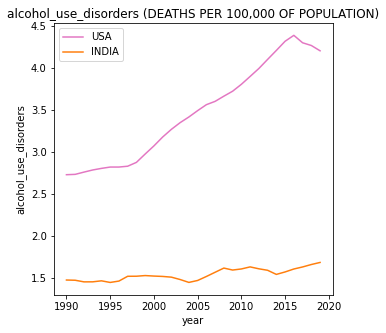

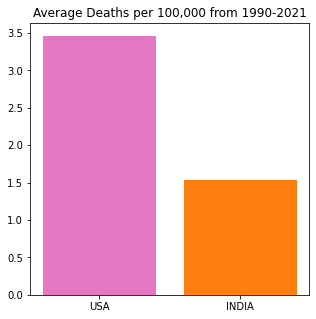



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and INDIA's self_harm deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by self_harm in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by self_harm in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  9.851680419
- Probability (p) value :  0.0000000000057174929318750367160292666587

- Decision
As p value ( 0.0000000000057174929318750367160292666587 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by self_harm in  USA and INDIA.
Time period : Past 30 years (1991-2019)



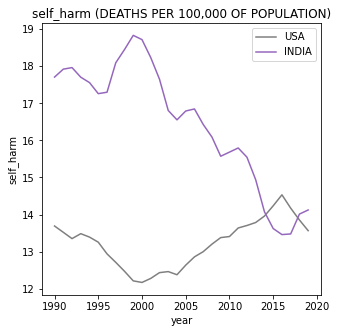

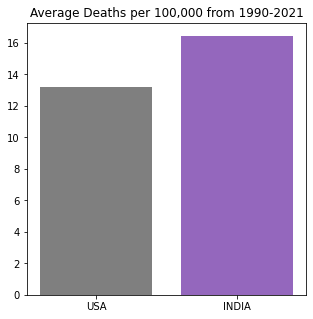



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and INDIA's exposure_to_forces_of_nature deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  2.425588632
- Probability (p) value :  0.0196361252579865183665042138727585552260

- Decision
As p value ( 0.0196361252579865183665042138727585552260 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by exposure_to_forces_of_nature in  USA and INDIA.
Time peri

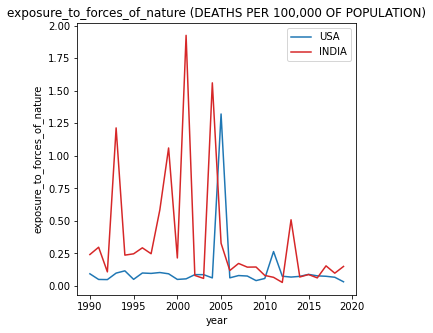

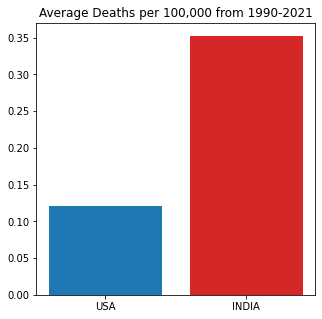



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and INDIA's diarrheal_diseases deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diarrheal_diseases in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diarrheal_diseases in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  17.162991812
- Probability (p) value :  0.0000000000000000865624887286748005565488

- Decision
As p value ( 0.0000000000000000865624887286748005565488 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diarrheal_diseases in  USA and INDIA.
Time period : Past 30 years (1991-2019

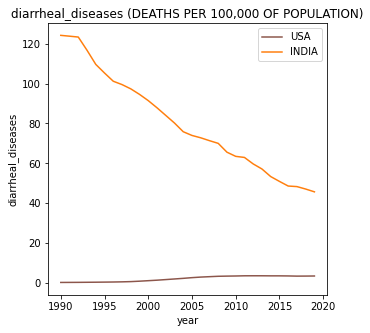

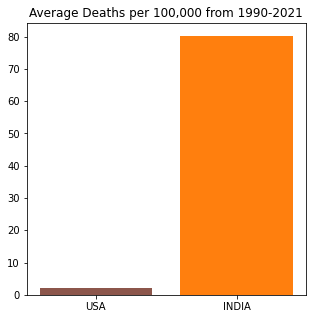



----------------------------------------------------------------------------------------------------


---- Welch's T Test for comparing USA's and INDIA's environmental_heat_and_cold_exposure deaths. ----

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  19.528896312
- Probability (p) value :  0.0000000000000000000000001033772372811630

- Decision
As p value ( 0.0000000000000000000000001033772372811630 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by environmental_heat_and_cold_exposure in 

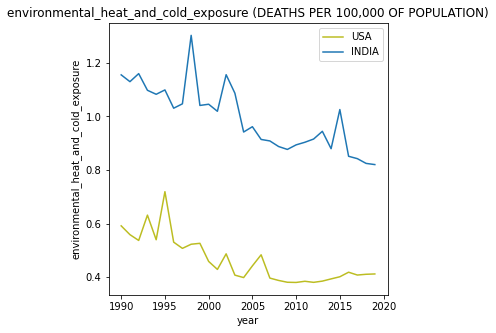

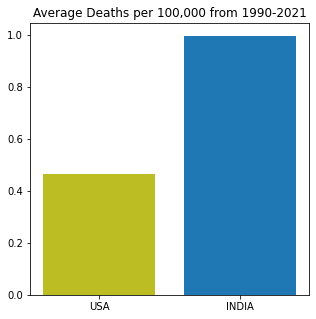



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and INDIA's neoplasms deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neoplasms in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neoplasms in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -98.210894734
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neoplasms in  USA and INDIA.
Time period : Past 30 years (1991-2019)



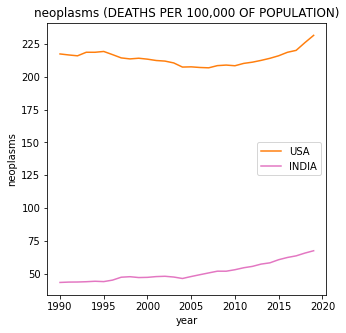

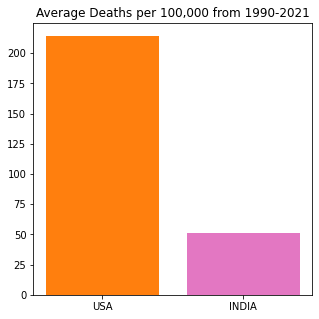



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and INDIA's conflict_and_terrorism deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by conflict_and_terrorism in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by conflict_and_terrorism in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  1.508839815
- Probability (p) value :  0.1374514382619866081913784228163422085345

- Decision
As p value ( 0.1374514382619866081913784228163422085345 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by conflict_and_terrorism in  USA and INDIA.
Time period : Past 3

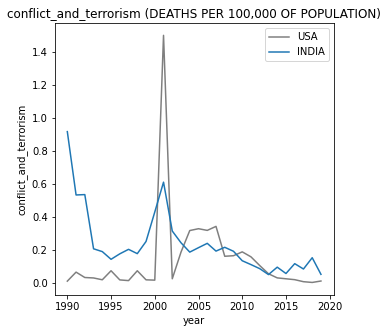

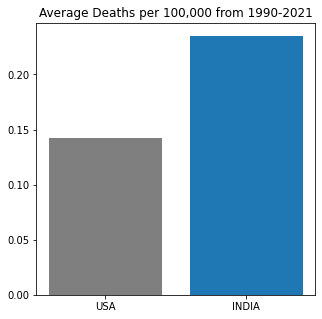



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and INDIA's diabetes_mellitus deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diabetes_mellitus in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diabetes_mellitus in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -13.326432196
- Probability (p) value :  0.0000000000000000064580892059889953744094

- Decision
As p value ( 0.0000000000000000064580892059889953744094 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diabetes_mellitus in  USA and INDIA.
Time period : Past 30 years (1991-2019)


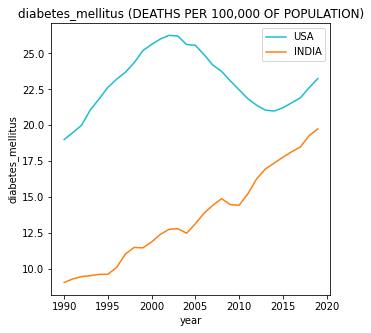

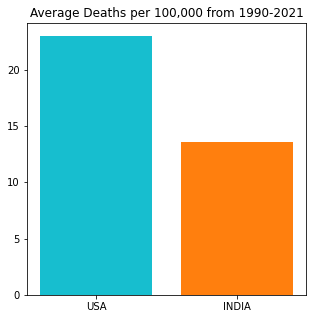



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and INDIA's chronic_kidney_disease deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_kidney_disease in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_kidney_disease in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -7.662275356
- Probability (p) value :  0.0000000095022454297537132289958500307517

- Decision
As p value ( 0.0000000095022454297537132289958500307517 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_kidney_disease in  USA and INDIA.
Time period : Past 30 year

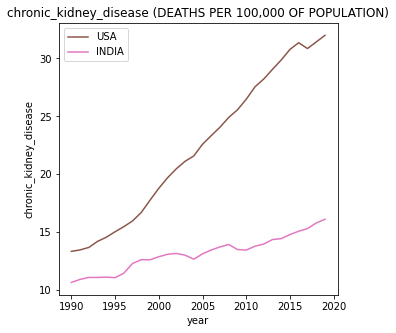

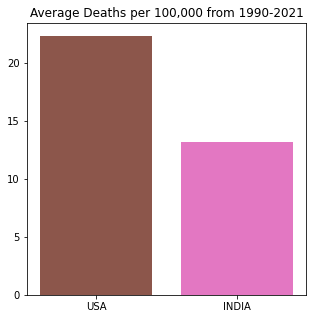



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and INDIA's poisonings deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by poisonings in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by poisonings in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  2.048150964
- Probability (p) value :  0.0489688072571783719610927221310703316703

- Decision
As p value ( 0.0489688072571783719610927221310703316703 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by poisonings in  USA and INDIA.
Time period : Past 30 years (1991-2019)



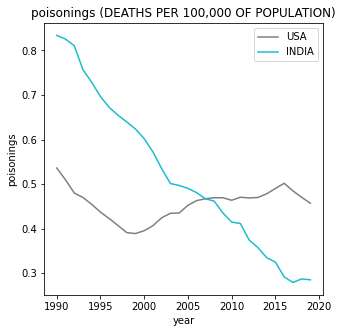

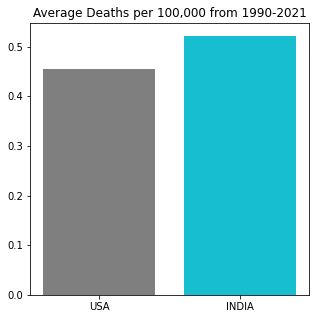



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and INDIA's protein_energy_malnutrition deaths. ---------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  5.272446156
- Probability (p) value :  0.0000118285909040975449087315304885770217

- Decision
As p value ( 0.0000118285909040975449087315304885770217 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by protein_energy_malnutrition in  USA and INDIA.
Time period 

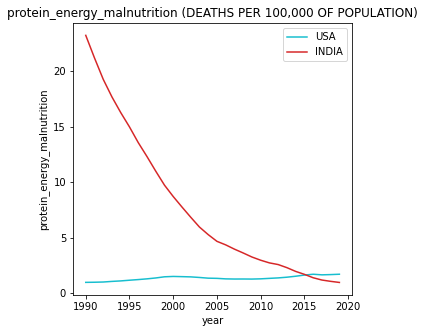

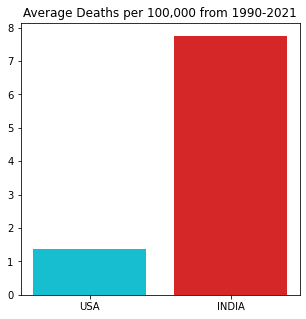



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and INDIA's terrorism deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by terrorism in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by terrorism in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.273373034
- Probability (p) value :  0.7864347641236840713574451910972129553556

- Decision
As p value ( 0.7864347641236840713574451910972129553556 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by terrorism in  USA and INDIA.
Time period : Past 30 years (1991-2019)



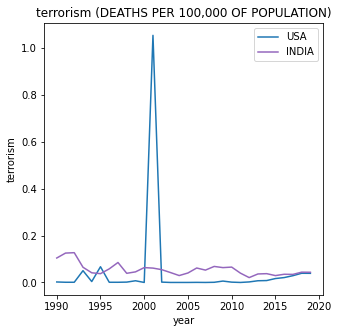

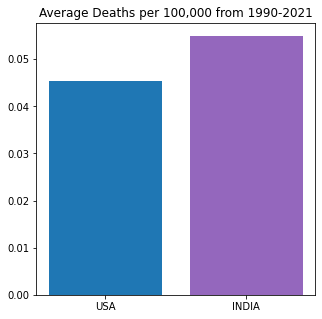



----------------------------------------------------------------------------------------------------


--------------- Welch's T Test for comparing USA's and INDIA's road_injuries deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by road_injuries in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by road_injuries in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.076152578
- Probability (p) value :  0.9397482316315335371115224916138686239719

- Decision
As p value ( 0.9397482316315335371115224916138686239719 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by road_injuries in  USA and INDIA.
Time period : Past 30 years (1991-2019)



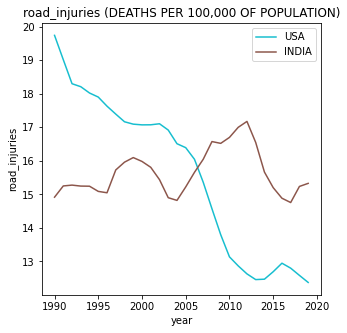

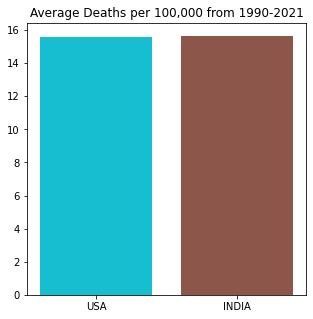



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and INDIA's chronic_respiratory_diseases deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  11.566767539
- Probability (p) value :  0.0000000000000003838621890870037353569342

- Decision
As p value ( 0.0000000000000003838621890870037353569342 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_respiratory_diseases in  USA and INDIA.
Time per

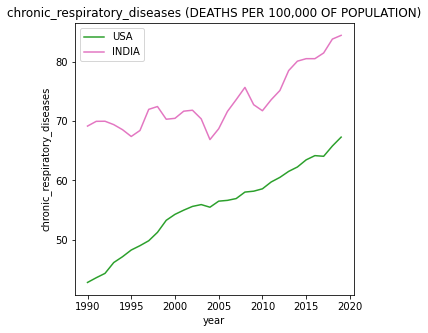

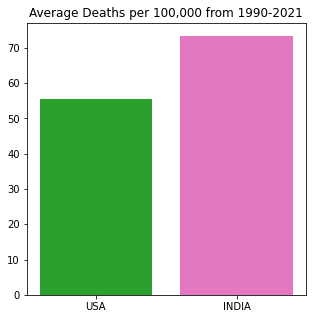



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and INDIA's chronic_liver_diseases deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_liver_diseases in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_liver_diseases in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  3.193722117
- Probability (p) value :  0.0025435927827980628172788168939177921857

- Decision
As p value ( 0.0025435927827980628172788168939177921857 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_liver_diseases in  USA and INDIA.
Time period : Past 30 years

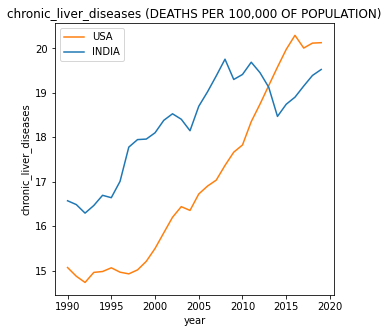

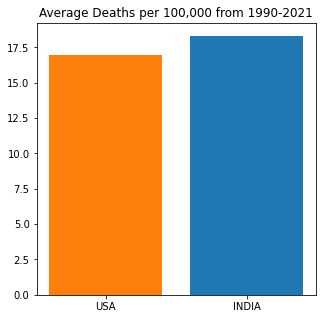



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and INDIA's digestive_diseases deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by digestive_diseases in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by digestive_diseases in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  1.277889417
- Probability (p) value :  0.2073849539114311080201247250442975200713

- Decision
As p value ( 0.2073849539114311080201247250442975200713 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by digestive_diseases in  USA and INDIA.
Time period : Past 30 years (199

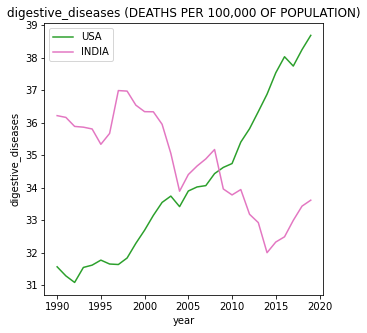

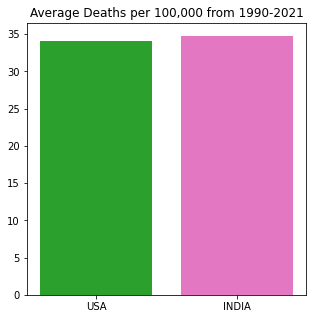



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and INDIA's fire_heat_hot_substance deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  9.380178482
- Probability (p) value :  0.0000000000003988999837144772348625088058

- Decision
As p value ( 0.0000000000003988999837144772348625088058 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by fire_heat_hot_substance in  USA and INDIA.
Time period : Past 30 ye

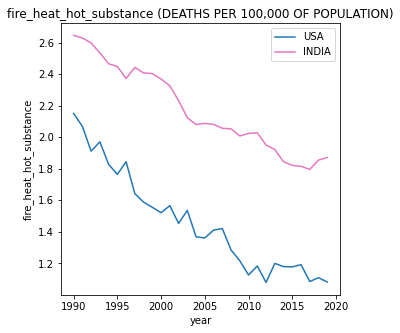

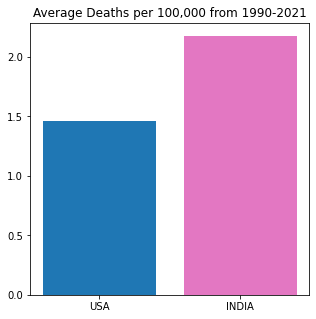



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and INDIA's acute_hepatitis deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by acute_hepatitis in  USA and INDIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by acute_hepatitis in  USA and INDIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  17.742942306
- Probability (p) value :  0.0000000000000000404321169451369628869869

- Decision
As p value ( 0.0000000000000000404321169451369628869869 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by acute_hepatitis in  USA and INDIA.
Time period : Past 30 years (1991-2019)



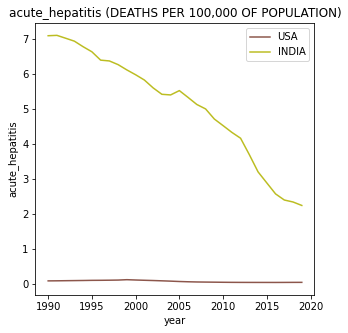

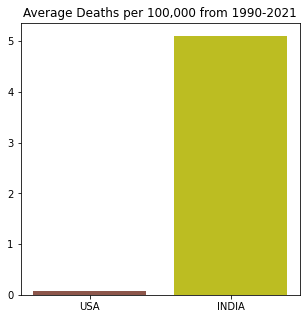



----------------------------------------------------------------------------------------------------




In [183]:
finalResult(df_usa,df_india,usa_india_t_test,"USA","INDIA",0.05,show_only_nnullAcceptance = False)

## Comparing India and China's causes of death

---------------- Welch's T Test for comparing INDIA's and CHINA's meningitis deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by meningitis in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by meningitis in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -92.099335457
- Probability (p) value :  0.0000000000000000000000000000000000001579

- Decision
As p value ( 0.0000000000000000000000000000000000001579 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by meningitis in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



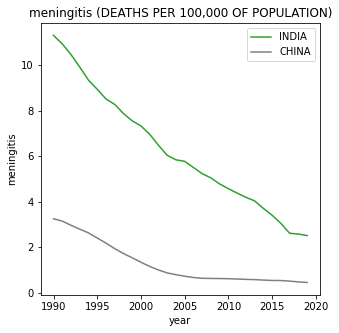

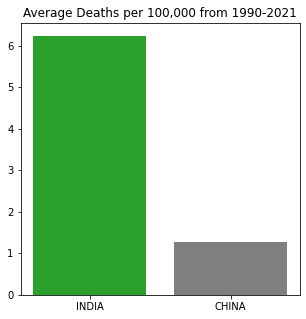



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and CHINA's alzheimer's_diesease deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alzheimer's_diesease in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alzheimer's_diesease in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  53.825904234
- Probability (p) value :  0.0000000000000000000000000000007649512551

- Decision
As p value ( 0.0000000000000000000000000000007649512551 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alzheimer's_diesease in  INDIA and CHINA.
Time period : Past 30 year

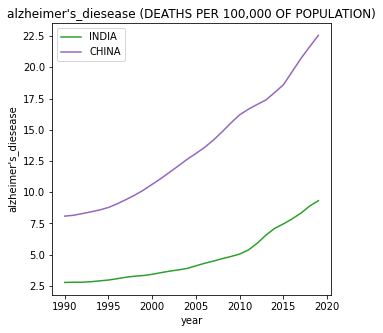

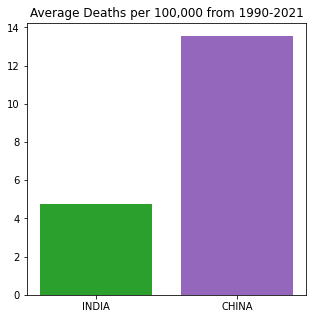



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and CHINA's parkinson's_disease deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by parkinson's_disease in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by parkinson's_disease in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  26.555040399
- Probability (p) value :  0.0000000000000000000005898687706329603478

- Decision
As p value ( 0.0000000000000000000005898687706329603478 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by parkinson's_disease in  INDIA and CHINA.
Time period : Past 30 years (

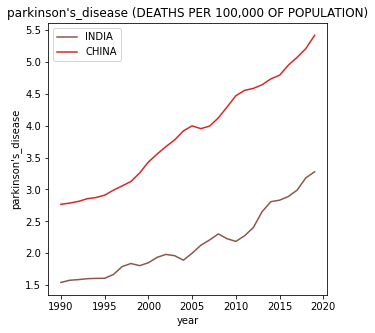

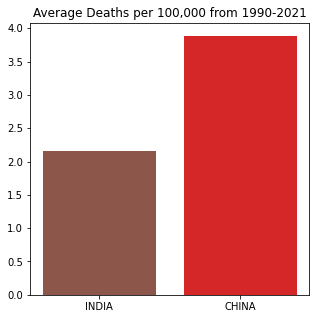



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing INDIA's and CHINA's nutritional_deficiency deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by nutritional_deficiency in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by nutritional_deficiency in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -17.073015564
- Probability (p) value :  0.0000000000000001136759919852063456086972

- Decision
As p value ( 0.0000000000000001136759919852063456086972 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by nutritional_deficiency in  INDIA and CHINA.
Time period : Past 

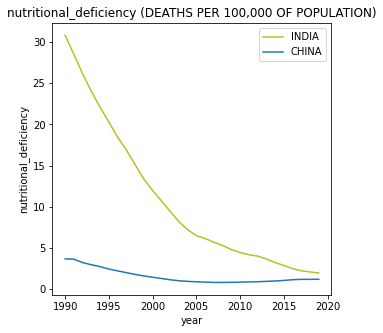

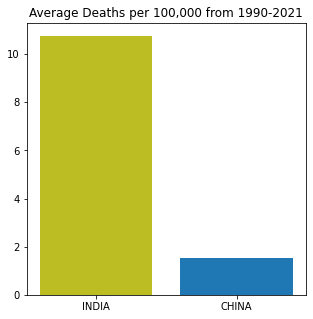



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing INDIA's and CHINA's malaria deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by malaria in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by malaria in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -9.353833813
- Probability (p) value :  0.0000000002937549789044346915798124455431

- Decision
As p value ( 0.0000000002937549789044346915798124455431 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by malaria in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



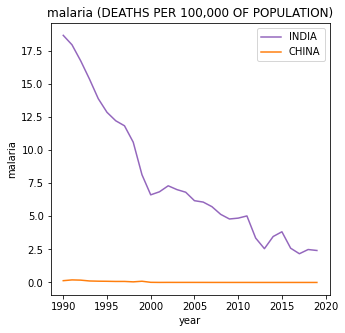

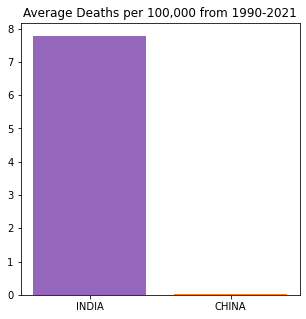



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing INDIA's and CHINA's drowning deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drowning in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drowning in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -56.517437761
- Probability (p) value :  0.0000000000000000000000000000000000000840

- Decision
As p value ( 0.0000000000000000000000000000000000000840 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drowning in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



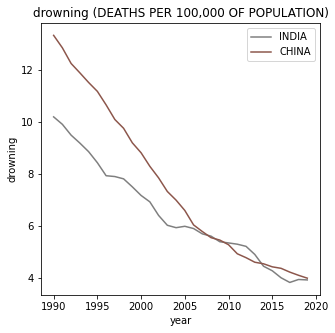

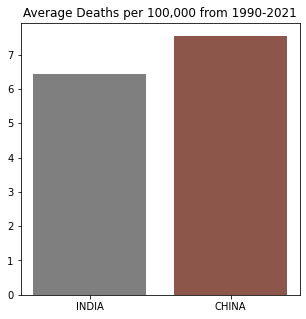



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing INDIA's and CHINA's interpersonal_violence deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by interpersonal_violence in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by interpersonal_violence in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -6.605450196
- Probability (p) value :  0.0000002251404523383228409536693662498785

- Decision
As p value ( 0.0000002251404523383228409536693662498785 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by interpersonal_violence in  INDIA and CHINA.
Time period : Past 3

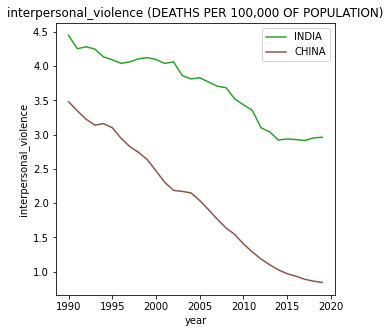

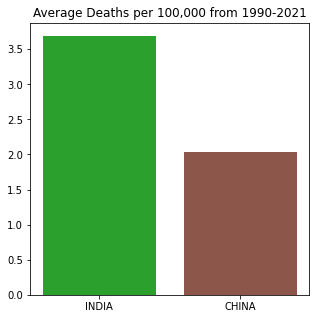



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and CHINA's maternal_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by maternal_disorders in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by maternal_disorders in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -69.673254035
- Probability (p) value :  0.0000000000000000000000000000000006259164

- Decision
As p value ( 0.0000000000000000000000000000000006259164 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by maternal_disorders in  INDIA and CHINA.
Time period : Past 30 years (19

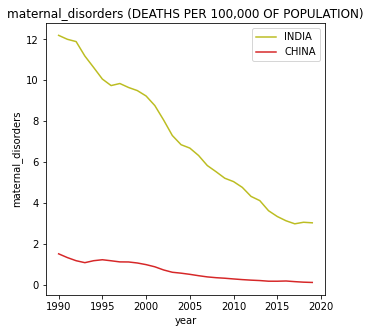

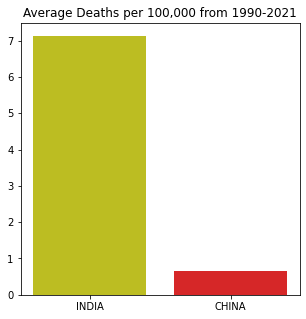



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing INDIA's and CHINA's hiv/aids deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by hiv/aids in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by hiv/aids in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -7.453777559
- Probability (p) value :  0.0000000070174167722846408334351355309041

- Decision
As p value ( 0.0000000070174167722846408334351355309041 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by hiv/aids in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



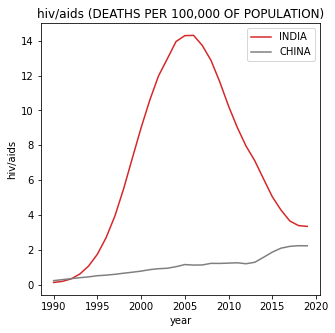

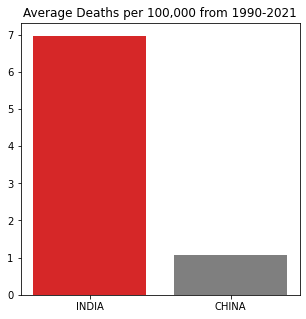



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and CHINA's drug_use_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drug_use_disorders in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drug_use_disorders in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  8.797510957
- Probability (p) value :  0.0000000011098810826071566068316108855172

- Decision
As p value ( 0.0000000011098810826071566068316108855172 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drug_use_disorders in  INDIA and CHINA.
Time period : Past 30 years (1991

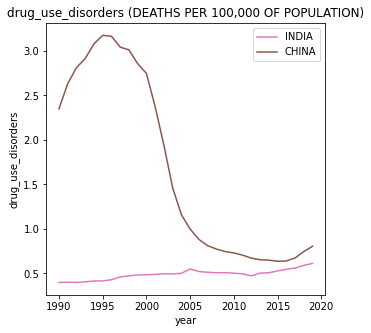

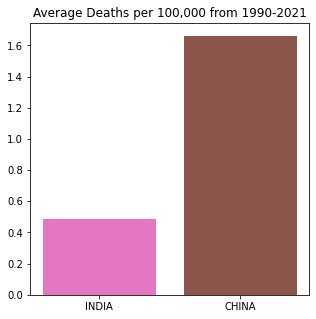



----------------------------------------------------------------------------------------------------


--------------- Welch's T Test for comparing INDIA's and CHINA's tuberculosis deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by tuberculosis in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by tuberculosis in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -55.730234639
- Probability (p) value :  0.0000000000000000000000000000004676887198

- Decision
As p value ( 0.0000000000000000000000000000004676887198 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by tuberculosis in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



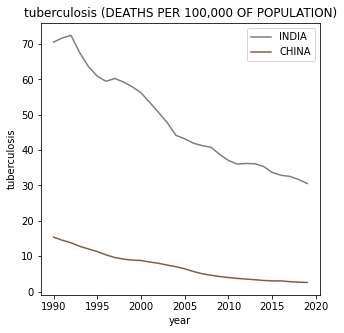

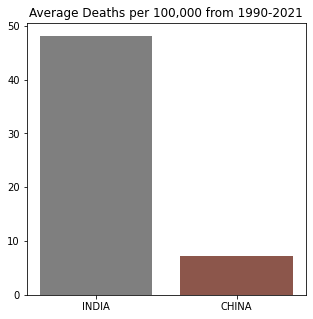



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing INDIA's and CHINA's cardiovascular_diseases deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by cardiovascular_diseases in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by cardiovascular_diseases in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  30.80951029
- Probability (p) value :  0.0000000000000000000000010957883927840839

- Decision
As p value ( 0.0000000000000000000000010957883927840839 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by cardiovascular_diseases in  INDIA and CHINA.
Time period : Past

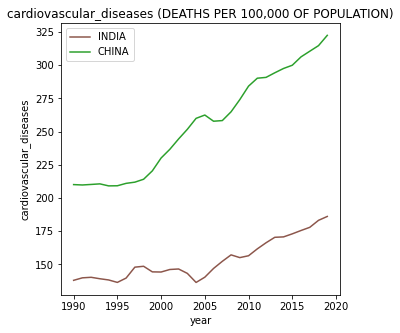

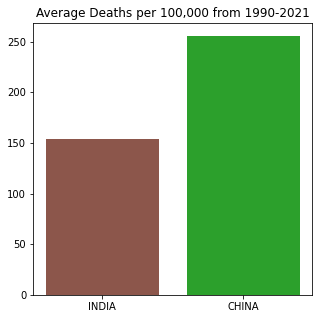



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing INDIA's and CHINA's lower_respiratory_infections deaths. -------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by lower_respiratory_infections in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by lower_respiratory_infections in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -29.309946348
- Probability (p) value :  0.0000000000000000000000192838958922791772

- Decision
As p value ( 0.0000000000000000000000192838958922791772 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by lower_respiratory_infections in  INDIA and CHINA.
T

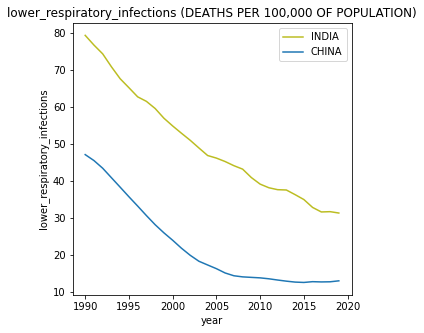

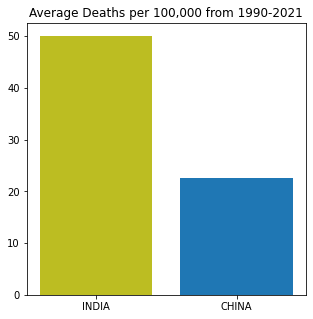



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and CHINA's neonatal_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neonatal_disorders in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neonatal_disorders in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -99.415206095
- Probability (p) value :  0.0000000000000000000000000000000000000011

- Decision
As p value ( 0.0000000000000000000000000000000000000011 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neonatal_disorders in  INDIA and CHINA.
Time period : Past 30 years (19

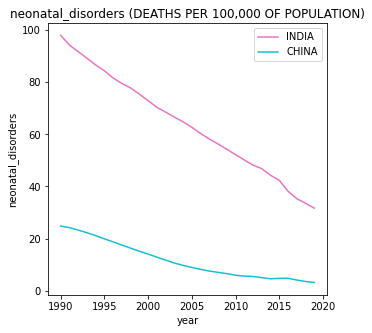

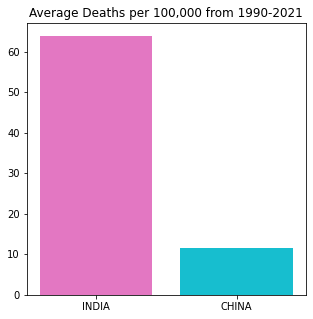



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing INDIA's and CHINA's alcohol_use_disorders deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alcohol_use_disorders in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alcohol_use_disorders in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  23.953537128
- Probability (p) value :  0.0000000000000000000100041570796713879872

- Decision
As p value ( 0.0000000000000000000100041570796713879872 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alcohol_use_disorders in  INDIA and CHINA.
Time period : Past 30 y

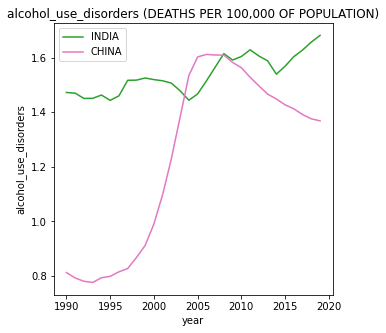

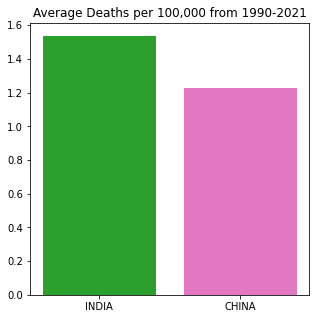



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing INDIA's and CHINA's self_harm deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by self_harm in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by self_harm in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  37.33945228
- Probability (p) value :  0.0000000000000000000000000000000102333539

- Decision
As p value ( 0.0000000000000000000000000000000102333539 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by self_harm in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



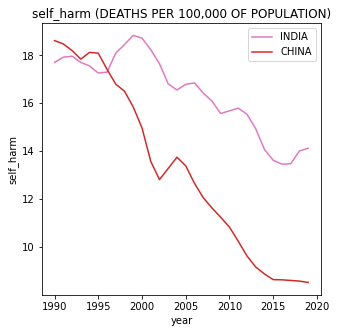

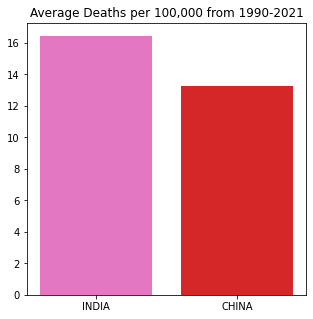



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing INDIA's and CHINA's exposure_to_forces_of_nature deaths. -------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by exposure_to_forces_of_nature in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by exposure_to_forces_of_nature in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -1.165451481
- Probability (p) value :  0.2532994535924381063196619834343437105417

- Decision
As p value ( 0.2532994535924381063196619834343437105417 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by exposure_to_forces_of_nature in  INDIA and CH

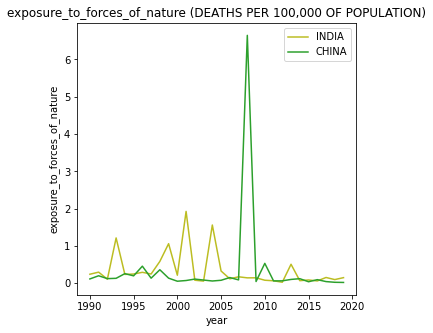

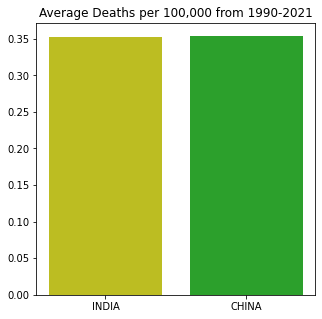



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and CHINA's diarrheal_diseases deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diarrheal_diseases in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diarrheal_diseases in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -20.934784859
- Probability (p) value :  0.0000000000000000004502829941272336463323

- Decision
As p value ( 0.0000000000000000004502829941272336463323 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diarrheal_diseases in  INDIA and CHINA.
Time period : Past 30 years (19

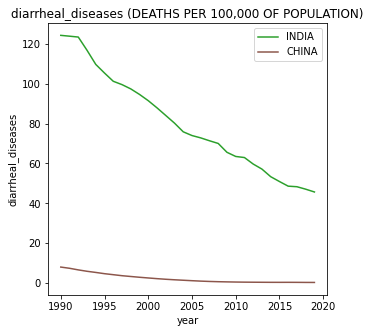

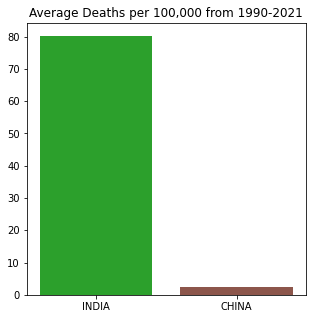



----------------------------------------------------------------------------------------------------


--- Welch's T Test for comparing INDIA's and CHINA's environmental_heat_and_cold_exposure deaths. ---

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -53.521699463
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by environmental_heat_and_cold_exposur

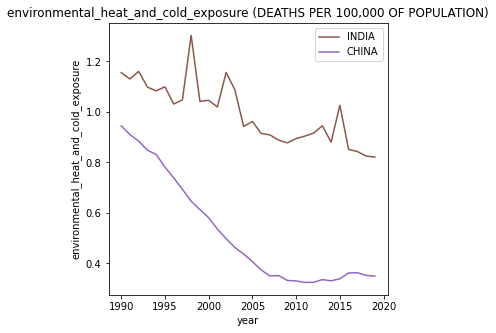

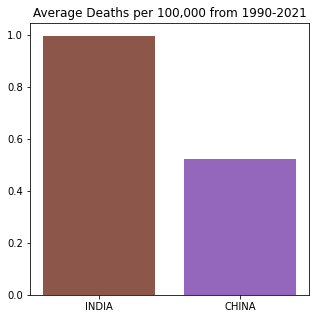



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing INDIA's and CHINA's neoplasms deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neoplasms in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neoplasms in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  153.239871515
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neoplasms in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



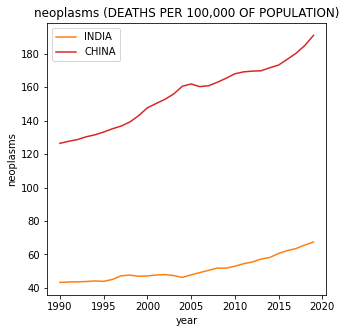

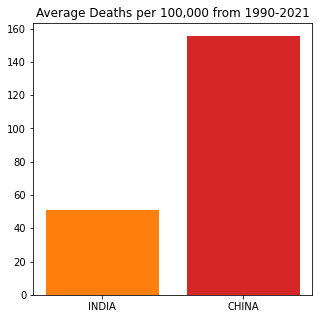



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing INDIA's and CHINA's conflict_and_terrorism deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by conflict_and_terrorism in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by conflict_and_terrorism in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -3.91125847
- Probability (p) value :  0.0005086103948804760258028956343423487851

- Decision
As p value ( 0.0005086103948804760258028956343423487851 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by conflict_and_terrorism in  INDIA and CHINA.
Time period : Past 30

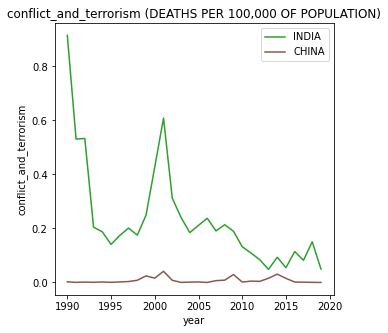

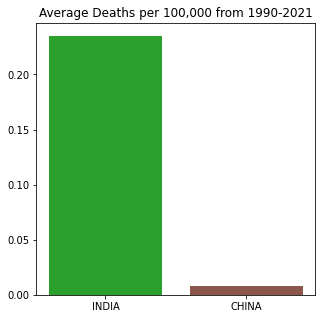



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and CHINA's diabetes_mellitus deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diabetes_mellitus in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diabetes_mellitus in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  17.275194291
- Probability (p) value :  0.0000000000000000083680498028427849508986

- Decision
As p value ( 0.0000000000000000083680498028427849508986 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diabetes_mellitus in  INDIA and CHINA.
Time period : Past 30 years (1991-2

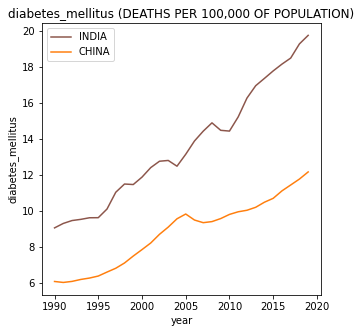

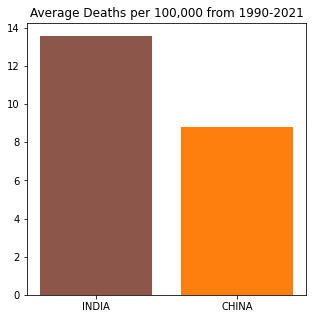



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing INDIA's and CHINA's chronic_kidney_disease deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_kidney_disease in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_kidney_disease in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  9.000296255
- Probability (p) value :  0.0000000006441002040489835862768463687949

- Decision
As p value ( 0.0000000006441002040489835862768463687949 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_kidney_disease in  INDIA and CHINA.
Time period : Past 30

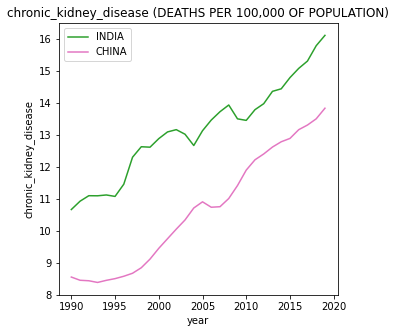

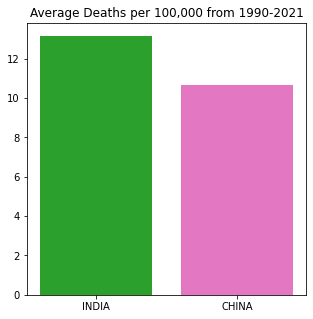



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing INDIA's and CHINA's poisonings deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by poisonings in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by poisonings in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -111.824469813
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by poisonings in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



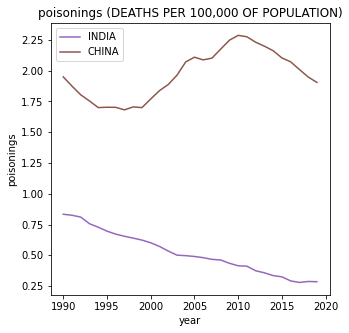

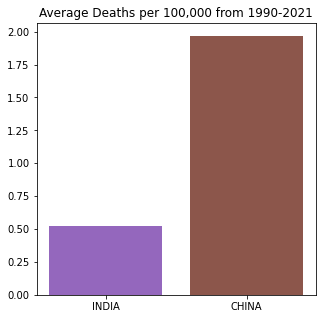



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing INDIA's and CHINA's protein_energy_malnutrition deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by protein_energy_malnutrition in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by protein_energy_malnutrition in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -17.234214549
- Probability (p) value :  0.0000000000000000885978056891619037877167

- Decision
As p value ( 0.0000000000000000885978056891619037877167 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by protein_energy_malnutrition in  INDIA and CHINA.
Time

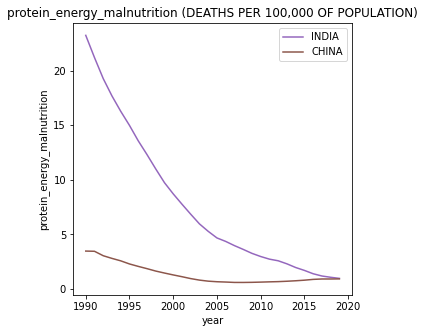

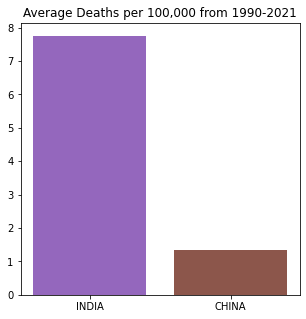



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing INDIA's and CHINA's terrorism deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by terrorism in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by terrorism in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -4.117272841
- Probability (p) value :  0.0002886210751217594804723942658597479749

- Decision
As p value ( 0.0002886210751217594804723942658597479749 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by terrorism in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



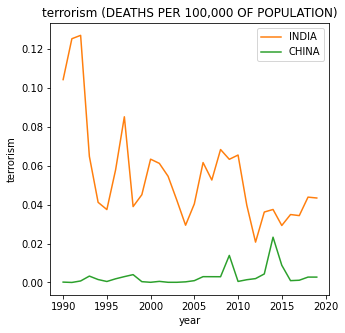

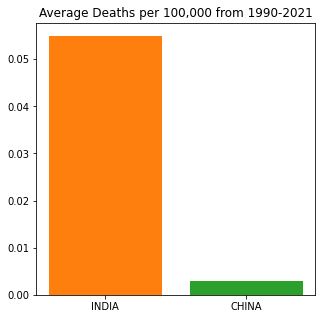



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing INDIA's and CHINA's road_injuries deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by road_injuries in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by road_injuries in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -16.43669644
- Probability (p) value :  0.0000000000000000003245298960061686433206

- Decision
As p value ( 0.0000000000000000003245298960061686433206 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by road_injuries in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)



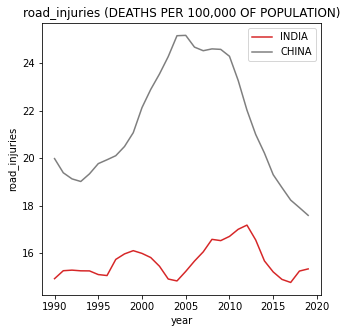

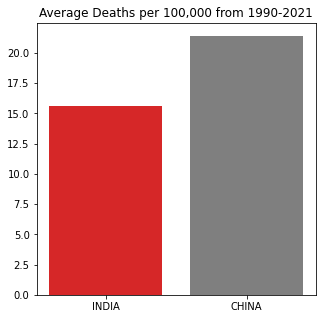



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing INDIA's and CHINA's chronic_respiratory_diseases deaths. -------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_respiratory_diseases in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_respiratory_diseases in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  21.085703028
- Probability (p) value :  0.0000000000000000000005796740608012428512

- Decision
As p value ( 0.0000000000000000000005796740608012428512 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_respiratory_diseases in  INDIA and CHINA.
Ti

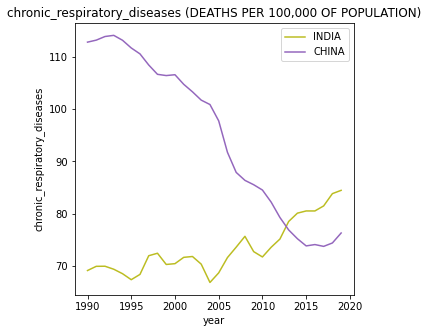

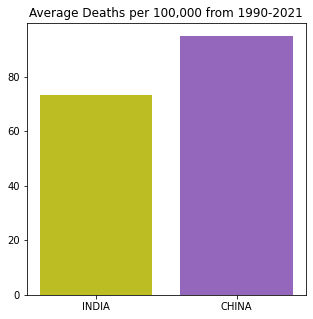



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing INDIA's and CHINA's chronic_liver_diseases deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_liver_diseases in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_liver_diseases in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -20.557622814
- Probability (p) value :  0.0000000000000000000000123501793644110794

- Decision
As p value ( 0.0000000000000000000000123501793644110794 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_liver_diseases in  INDIA and CHINA.
Time period : Past 

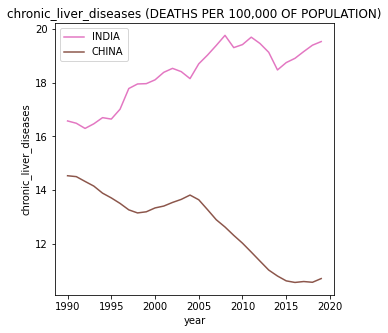

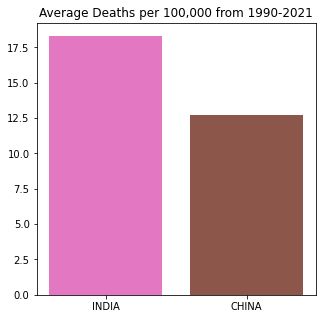



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and CHINA's digestive_diseases deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by digestive_diseases in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by digestive_diseases in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -11.442827209
- Probability (p) value :  0.0000000000000028516995351749696026954036

- Decision
As p value ( 0.0000000000000028516995351749696026954036 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by digestive_diseases in  INDIA and CHINA.
Time period : Past 30 years (19

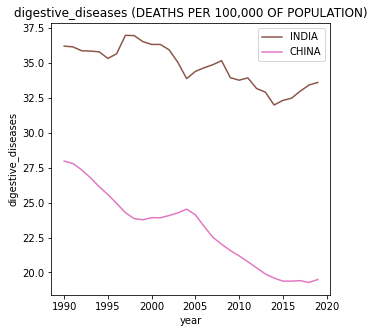

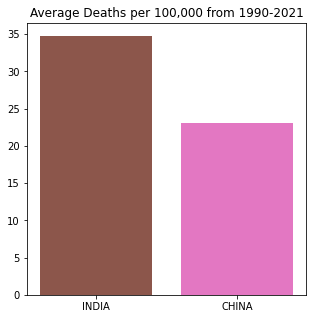



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing INDIA's and CHINA's fire_heat_hot_substance deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by fire_heat_hot_substance in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by fire_heat_hot_substance in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -39.65781077
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by fire_heat_hot_substance in  INDIA and CHINA.
Time period : Pas

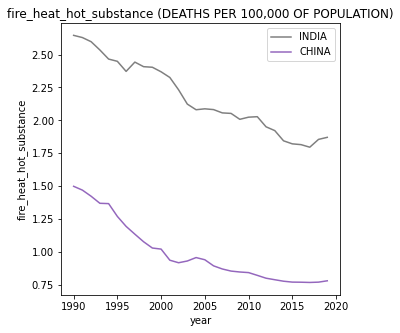

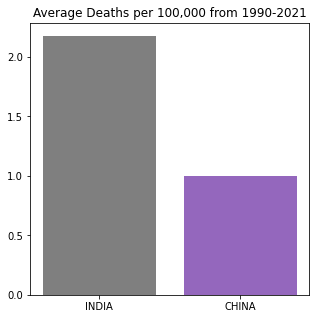



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing INDIA's and CHINA's acute_hepatitis deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by acute_hepatitis in  INDIA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by acute_hepatitis in  INDIA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -29.778587437
- Probability (p) value :  0.0000000000000000000000264531469798129400

- Decision
As p value ( 0.0000000000000000000000264531469798129400 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by acute_hepatitis in  INDIA and CHINA.
Time period : Past 30 years (1991-2019)


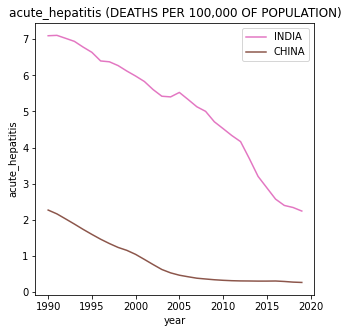

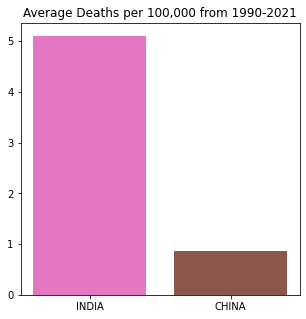



----------------------------------------------------------------------------------------------------




In [184]:
finalResult(df_india,df_china,usa_som_t_test,"INDIA","CHINA",0.05,show_only_nnullAcceptance = False)

## Comparing USA and UK's causes of death

------------------ Welch's T Test for comparing USA's and UK's meningitis deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by meningitis in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by meningitis in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -4.171690224
- Probability (p) value :  0.0001384432658362681756170076141643221490

- Decision
As p value ( 0.0001384432658362681756170076141643221490 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by meningitis in  USA and UK.
Time period : Past 30 years (1991-2019)



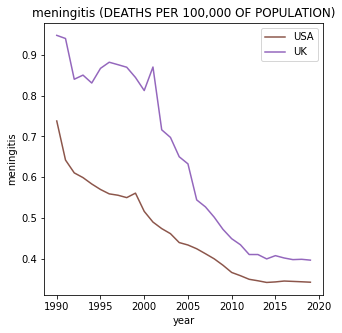

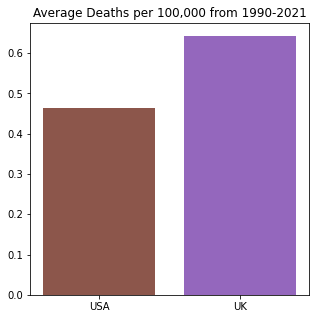



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and UK's alzheimer's_diesease deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alzheimer's_diesease in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alzheimer's_diesease in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -3.704231073
- Probability (p) value :  0.0005157478603712569798292464362532427913

- Decision
As p value ( 0.0005157478603712569798292464362532427913 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alzheimer's_diesease in  USA and UK.
Time period : Past 30 years (1991-2019)



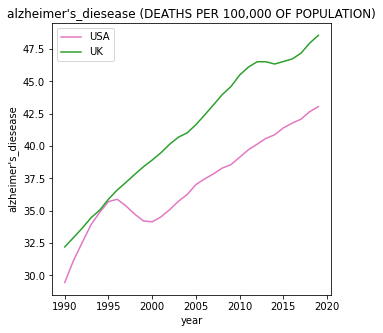

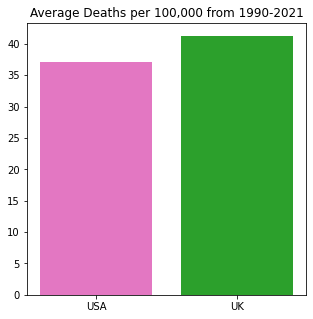



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and UK's parkinson's_disease deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by parkinson's_disease in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by parkinson's_disease in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -7.295037542
- Probability (p) value :  0.0000000011383685941975832269299144218705

- Decision
As p value ( 0.0000000011383685941975832269299144218705 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by parkinson's_disease in  USA and UK.
Time period : Past 30 years (1991-2019)



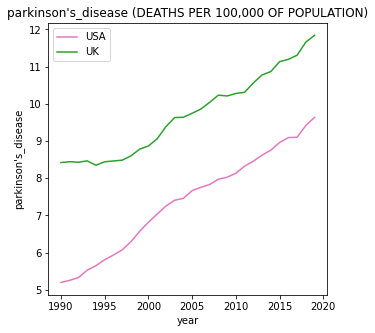

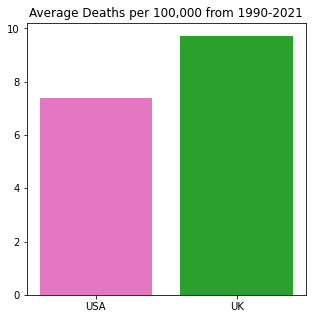



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and UK's nutritional_deficiency deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by nutritional_deficiency in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by nutritional_deficiency in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  32.729852093
- Probability (p) value :  0.0000000000000000000000001265105967915932

- Decision
As p value ( 0.0000000000000000000000001265105967915932 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by nutritional_deficiency in  USA and UK.
Time period : Past 30 years (1991-2

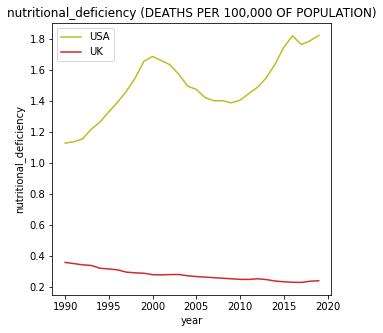

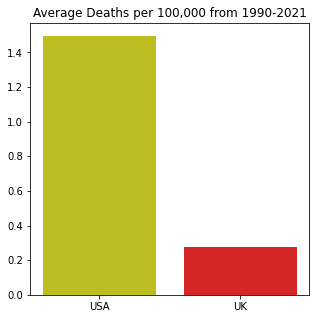



----------------------------------------------------------------------------------------------------


-------------------- Welch's T Test for comparing USA's and UK's malaria deaths. --------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by malaria in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by malaria in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  nan
- Probability (p) value :  nan

- Decision
As p value ( nan ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by malaria in  USA and UK.
Time period : Past 30 years (1991-2019)



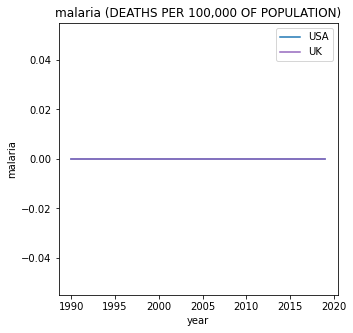

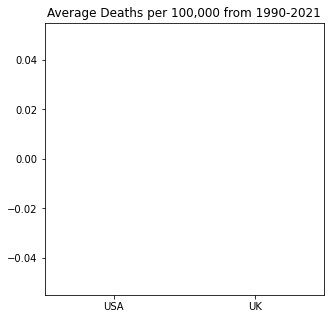



----------------------------------------------------------------------------------------------------


------------------- Welch's T Test for comparing USA's and UK's drowning deaths. --------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drowning in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drowning in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  20.471923978
- Probability (p) value :  0.0000000000000000000000015352447757001880

- Decision
As p value ( 0.0000000000000000000000015352447757001880 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drowning in  USA and UK.
Time period : Past 30 years (1991-2019)



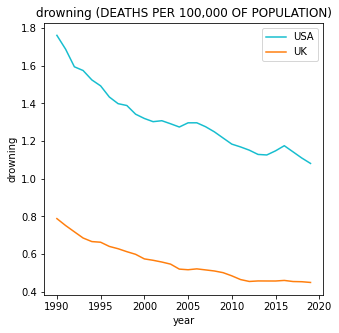

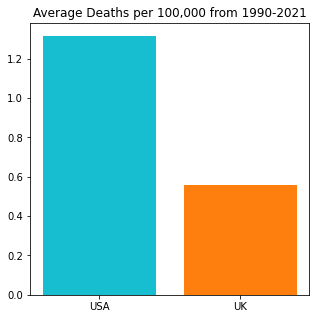



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and UK's interpersonal_violence deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by interpersonal_violence in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by interpersonal_violence in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  20.361444228
- Probability (p) value :  0.0000000000000000003271966851472646333080

- Decision
As p value ( 0.0000000000000000003271966851472646333080 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by interpersonal_violence in  USA and UK.
Time period : Past 30 years (1991-2

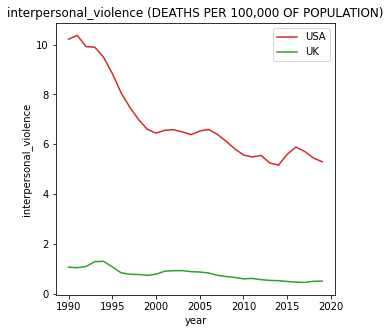

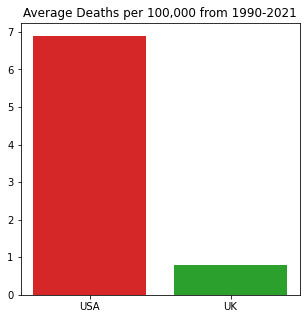



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and UK's maternal_disorders deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by maternal_disorders in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by maternal_disorders in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  13.228921375
- Probability (p) value :  0.0000000000000036758071527099476255678875

- Decision
As p value ( 0.0000000000000036758071527099476255678875 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by maternal_disorders in  USA and UK.
Time period : Past 30 years (1991-2019)



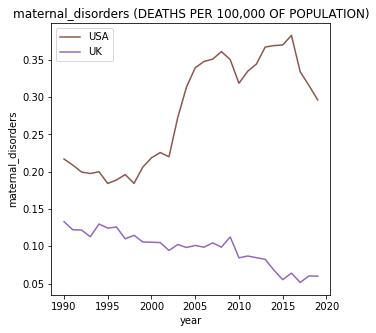

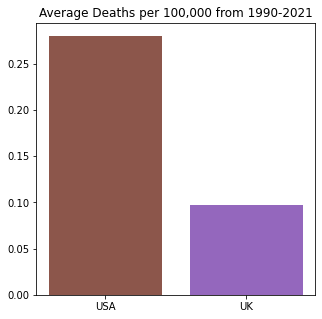



----------------------------------------------------------------------------------------------------


------------------- Welch's T Test for comparing USA's and UK's hiv/aids deaths. --------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by hiv/aids in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by hiv/aids in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.475260418
- Probability (p) value :  0.0000004188234480235040540512425795427465

- Decision
As p value ( 0.0000004188234480235040540512425795427465 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by hiv/aids in  USA and UK.
Time period : Past 30 years (1991-2019)



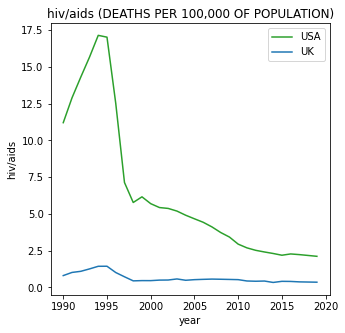

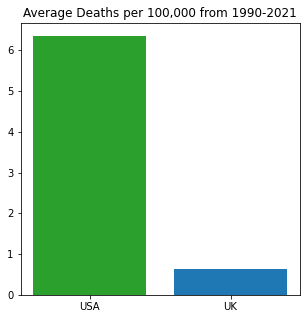



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and UK's drug_use_disorders deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drug_use_disorders in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drug_use_disorders in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  5.474092179
- Probability (p) value :  0.0000057739634135587709673530579235212201

- Decision
As p value ( 0.0000057739634135587709673530579235212201 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drug_use_disorders in  USA and UK.
Time period : Past 30 years (1991-2019)



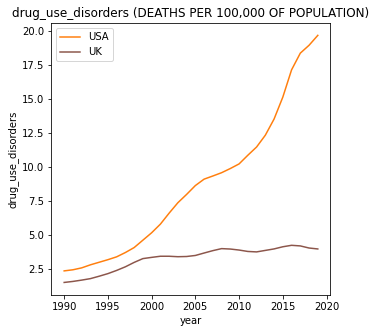

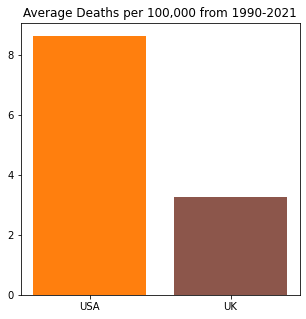



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and UK's tuberculosis deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by tuberculosis in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by tuberculosis in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -6.955215465
- Probability (p) value :  0.0000000036894793194116700975301953528132

- Decision
As p value ( 0.0000000036894793194116700975301953528132 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by tuberculosis in  USA and UK.
Time period : Past 30 years (1991-2019)



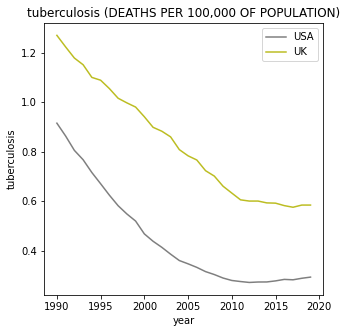

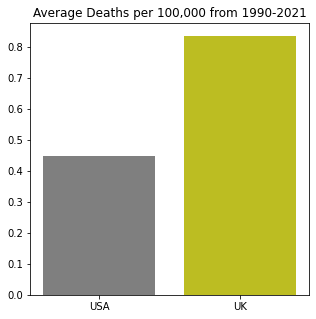



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and UK's cardiovascular_diseases deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by cardiovascular_diseases in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by cardiovascular_diseases in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -3.75048254
- Probability (p) value :  0.0006001684974900177048026672643743495428

- Decision
As p value ( 0.0006001684974900177048026672643743495428 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by cardiovascular_diseases in  USA and UK.
Time period : Past 30 years (1991

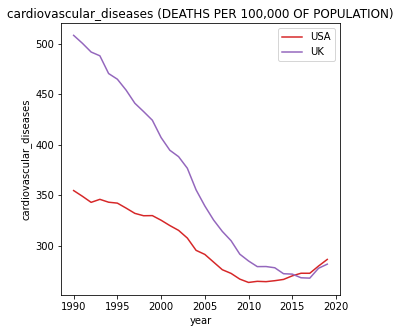

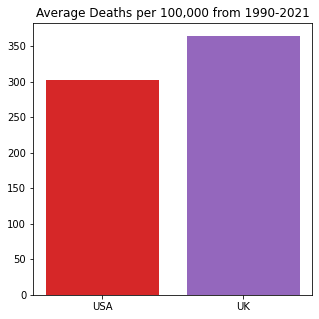



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing USA's and UK's lower_respiratory_infections deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by lower_respiratory_infections in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by lower_respiratory_infections in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -19.885275843
- Probability (p) value :  0.0000000000000000000514843850780088700626

- Decision
As p value ( 0.0000000000000000000514843850780088700626 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by lower_respiratory_infections in  USA and UK.
Time period : Pa

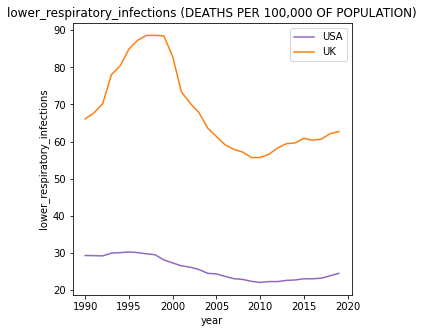

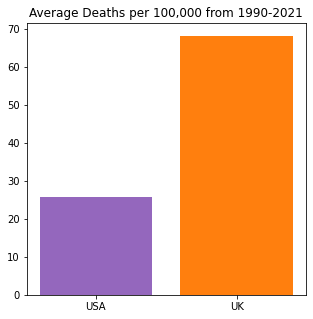



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and UK's neonatal_disorders deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neonatal_disorders in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neonatal_disorders in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.160845817
- Probability (p) value :  0.0000001065875998610417894164404187251627

- Decision
As p value ( 0.0000001065875998610417894164404187251627 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neonatal_disorders in  USA and UK.
Time period : Past 30 years (1991-2019)



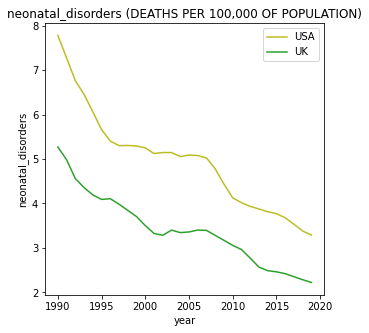

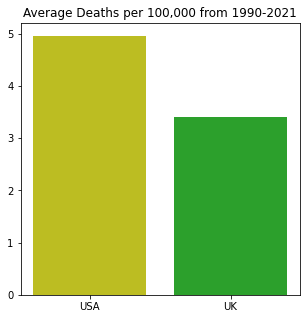



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and UK's alcohol_use_disorders deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alcohol_use_disorders in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alcohol_use_disorders in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  7.93765915
- Probability (p) value :  0.0000000001295340778756475661960903199933

- Decision
As p value ( 0.0000000001295340778756475661960903199933 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alcohol_use_disorders in  USA and UK.
Time period : Past 30 years (1991-2019)


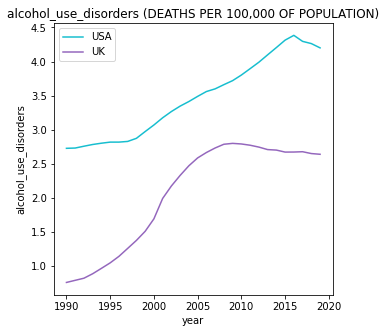

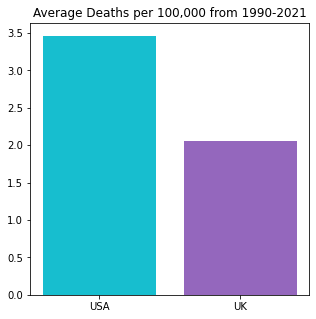



----------------------------------------------------------------------------------------------------


------------------- Welch's T Test for comparing USA's and UK's self_harm deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by self_harm in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by self_harm in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  18.856031141
- Probability (p) value :  0.0000000000000000000000003737389411591189

- Decision
As p value ( 0.0000000000000000000000003737389411591189 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by self_harm in  USA and UK.
Time period : Past 30 years (1991-2019)



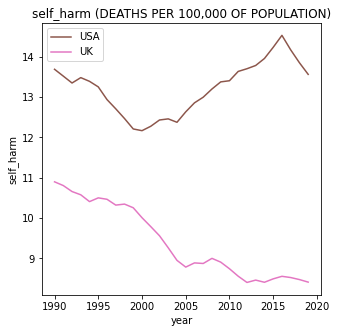

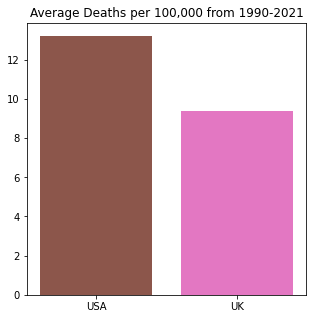



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing USA's and UK's exposure_to_forces_of_nature deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  2.312978321
- Probability (p) value :  0.0277411473244652366509921392889737035148

- Decision
As p value ( 0.0277411473244652366509921392889737035148 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by exposure_to_forces_of_nature in  USA and UK.
Time period : Past

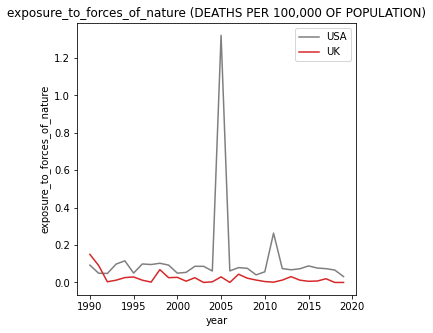

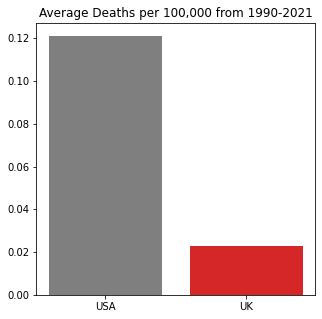



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and UK's diarrheal_diseases deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diarrheal_diseases in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diarrheal_diseases in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.705909069
- Probability (p) value :  0.4831315669034205173559826107521075755358

- Decision
As p value ( 0.4831315669034205173559826107521075755358 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by diarrheal_diseases in  USA and UK.
Time period : Past 30 years (1991-2019)



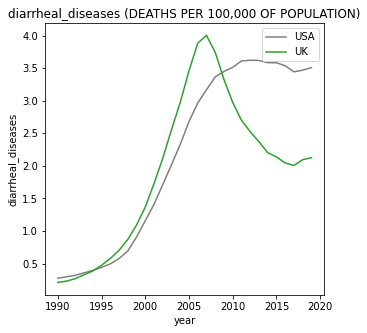

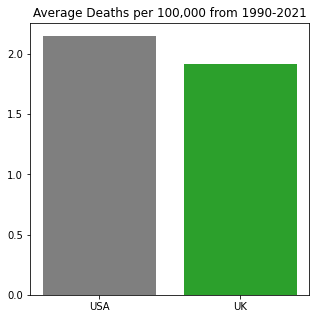



----------------------------------------------------------------------------------------------------


----- Welch's T Test for comparing USA's and UK's environmental_heat_and_cold_exposure deaths. ------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.488642959
- Probability (p) value :  0.0000000217897201327310144062205597139878

- Decision
As p value ( 0.0000000217897201327310144062205597139878 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by environmental_heat_and_cold_exposure in  USA an

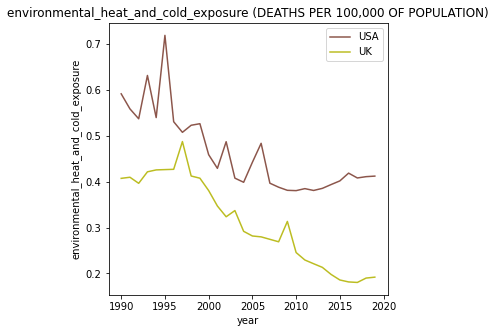

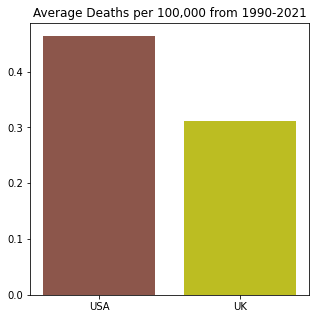



----------------------------------------------------------------------------------------------------


------------------- Welch's T Test for comparing USA's and UK's neoplasms deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neoplasms in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neoplasms in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -38.26553573
- Probability (p) value :  0.0000000000000000000000000000000000000009

- Decision
As p value ( 0.0000000000000000000000000000000000000009 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neoplasms in  USA and UK.
Time period : Past 30 years (1991-2019)



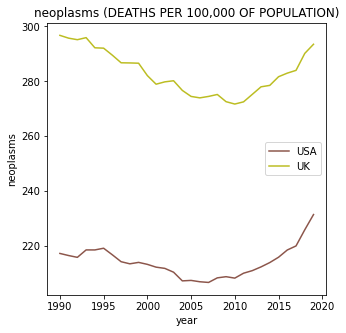

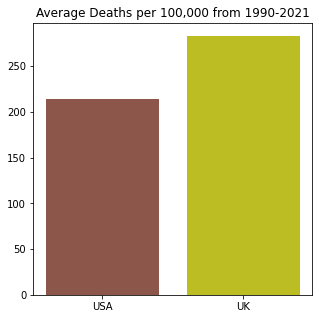



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and UK's conflict_and_terrorism deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by conflict_and_terrorism in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by conflict_and_terrorism in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.931165088
- Probability (p) value :  0.3581364449297130825300428114132955670357

- Decision
As p value ( 0.3581364449297130825300428114132955670357 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by conflict_and_terrorism in  USA and UK.
Time period : Past 30 years (

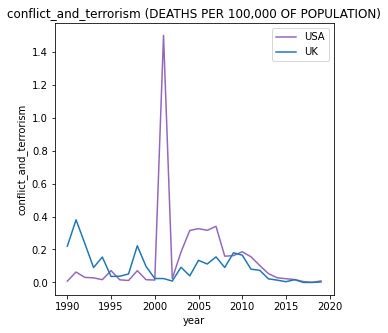

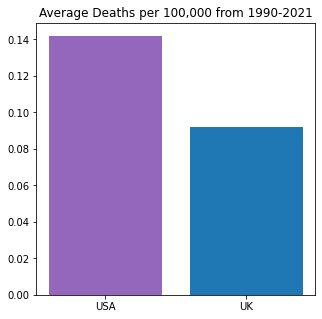



----------------------------------------------------------------------------------------------------


--------------- Welch's T Test for comparing USA's and UK's diabetes_mellitus deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diabetes_mellitus in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diabetes_mellitus in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  26.004238146
- Probability (p) value :  0.0000000000000000000000000000000379973599

- Decision
As p value ( 0.0000000000000000000000000000000379973599 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diabetes_mellitus in  USA and UK.
Time period : Past 30 years (1991-2019)



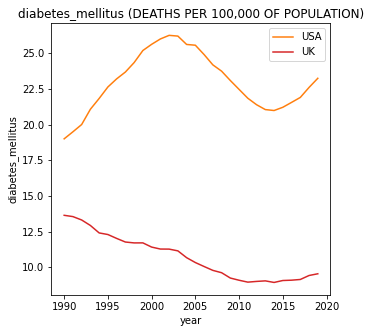

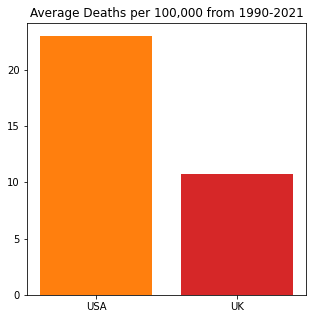



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and UK's chronic_kidney_disease deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_kidney_disease in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_kidney_disease in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  11.000725666
- Probability (p) value :  0.0000000000023793026681713066802979887748

- Decision
As p value ( 0.0000000000023793026681713066802979887748 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_kidney_disease in  USA and UK.
Time period : Past 30 years (1991-2

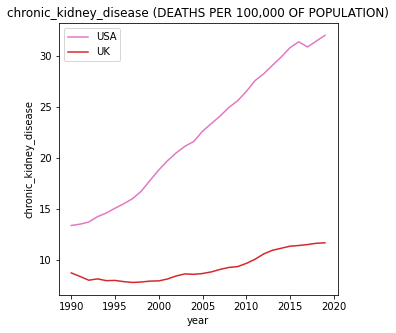

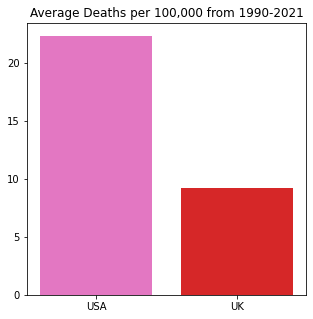



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing USA's and UK's poisonings deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by poisonings in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by poisonings in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  5.055289663
- Probability (p) value :  0.0000153114810494276712068972834401847649

- Decision
As p value ( 0.0000153114810494276712068972834401847649 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by poisonings in  USA and UK.
Time period : Past 30 years (1991-2019)



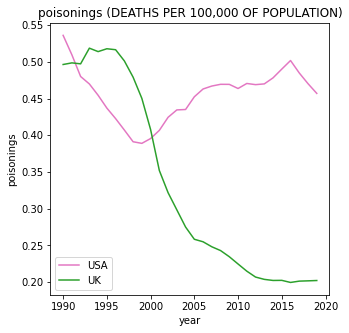

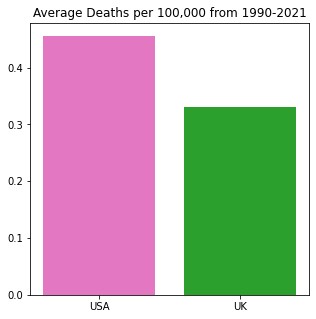



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and UK's protein_energy_malnutrition deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  31.257552579
- Probability (p) value :  0.0000000000000000000000043949743517146157

- Decision
As p value ( 0.0000000000000000000000043949743517146157 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by protein_energy_malnutrition in  USA and UK.
Time period : Past 3

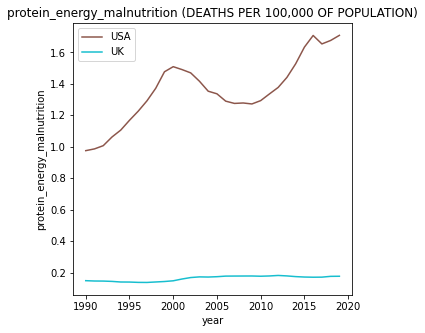

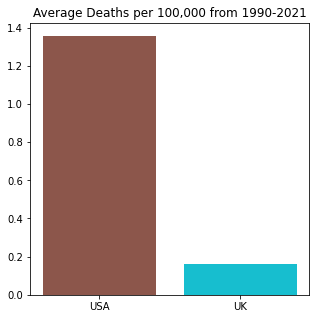



----------------------------------------------------------------------------------------------------


------------------- Welch's T Test for comparing USA's and UK's terrorism deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by terrorism in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by terrorism in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.273256668
- Probability (p) value :  0.7863715222730062182066035347816068679094

- Decision
As p value ( 0.7863715222730062182066035347816068679094 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by terrorism in  USA and UK.
Time period : Past 30 years (1991-2019)



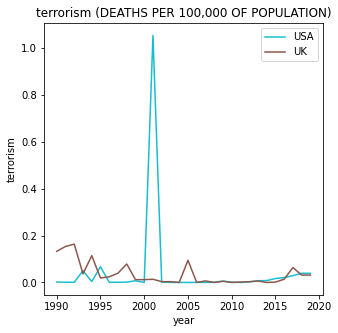

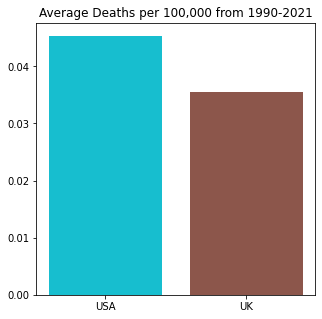



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and UK's road_injuries deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by road_injuries in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by road_injuries in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  16.616447142
- Probability (p) value :  0.0000000000000000000000365259297090450065

- Decision
As p value ( 0.0000000000000000000000365259297090450065 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by road_injuries in  USA and UK.
Time period : Past 30 years (1991-2019)



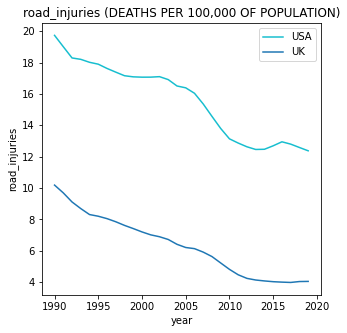

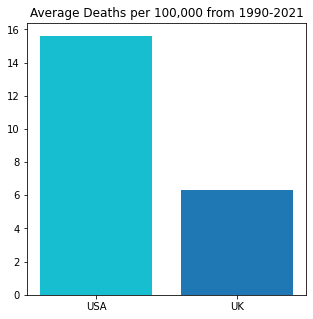



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing USA's and UK's chronic_respiratory_diseases deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -10.661939406
- Probability (p) value :  0.0000000000001037667185762314946437684417

- Decision
As p value ( 0.0000000000001037667185762314946437684417 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_respiratory_diseases in  USA and UK.
Time period : Pa

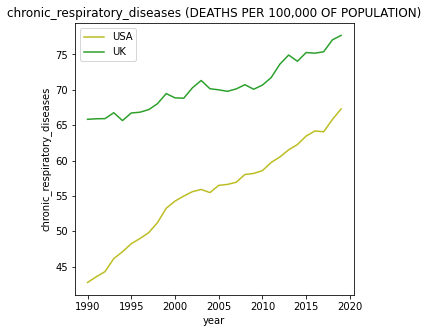

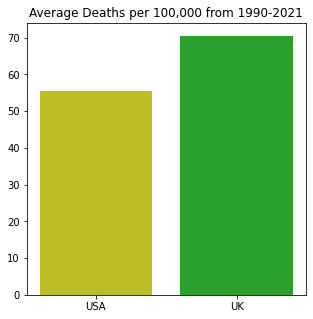



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and UK's chronic_liver_diseases deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_liver_diseases in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_liver_diseases in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.840298489
- Probability (p) value :  0.0000000061979652041263896289820256330777

- Decision
As p value ( 0.0000000061979652041263896289820256330777 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_liver_diseases in  USA and UK.
Time period : Past 30 years (1991-20

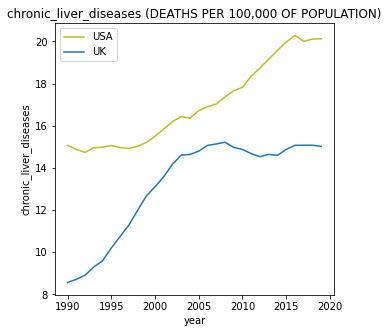

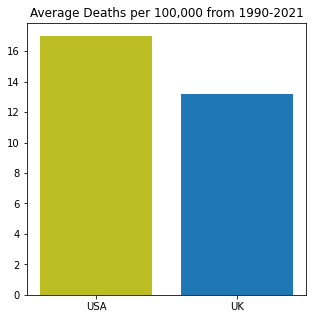



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and UK's digestive_diseases deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by digestive_diseases in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by digestive_diseases in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -11.957399025
- Probability (p) value :  0.0000000000000018861494543792550083545808

- Decision
As p value ( 0.0000000000000018861494543792550083545808 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by digestive_diseases in  USA and UK.
Time period : Past 30 years (1991-2019)



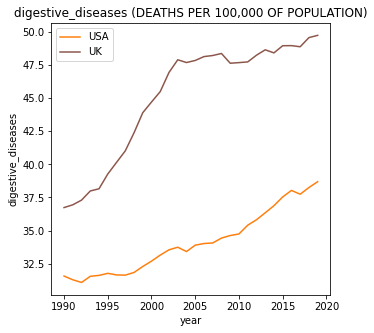

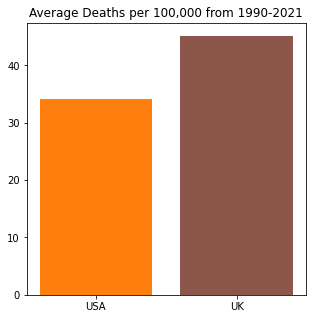



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and UK's fire_heat_hot_substance deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  7.797157908
- Probability (p) value :  0.0000000001555792253919197049971667867678

- Decision
As p value ( 0.0000000001555792253919197049971667867678 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by fire_heat_hot_substance in  USA and UK.
Time period : Past 30 years (1991

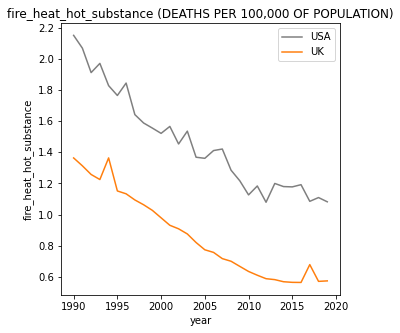

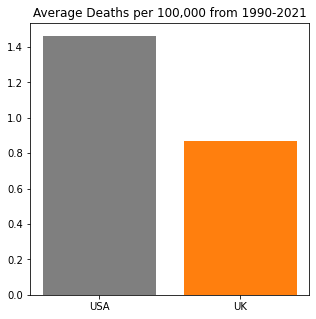



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing USA's and UK's acute_hepatitis deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by acute_hepatitis in  USA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by acute_hepatitis in  USA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.165037948
- Probability (p) value :  0.0000009252441468431454863518615706896586

- Decision
As p value ( 0.0000009252441468431454863518615706896586 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by acute_hepatitis in  USA and UK.
Time period : Past 30 years (1991-2019)



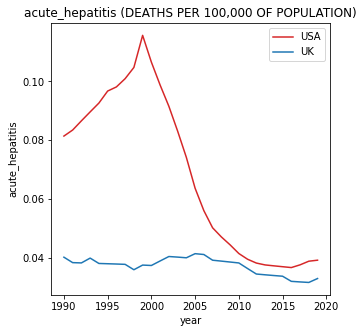

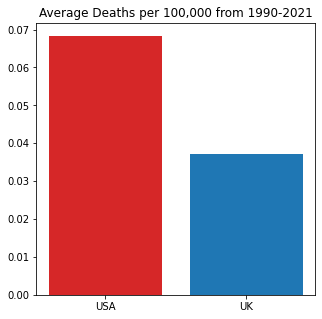



----------------------------------------------------------------------------------------------------




In [185]:
finalResult(df_usa,df_uk,us_uk_t_test,"USA","UK",0.05,show_only_nnullAcceptance = False)

## Comparing USA and Somalia's causes of death

---------------- Welch's T Test for comparing USA's and SOMALIA's meningitis deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by meningitis in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by meningitis in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -92.099335457
- Probability (p) value :  0.0000000000000000000000000000000000001579

- Decision
As p value ( 0.0000000000000000000000000000000000001579 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by meningitis in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



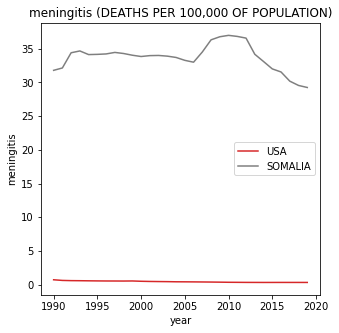

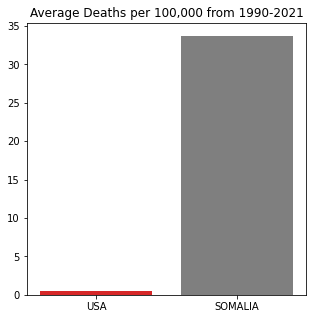



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and SOMALIA's alzheimer's_diesease deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alzheimer's_diesease in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alzheimer's_diesease in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  53.825904234
- Probability (p) value :  0.0000000000000000000000000000007649512551

- Decision
As p value ( 0.0000000000000000000000000000007649512551 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alzheimer's_diesease in  USA and SOMALIA.
Time period : Past 30 year

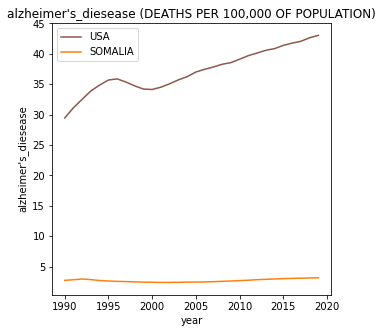

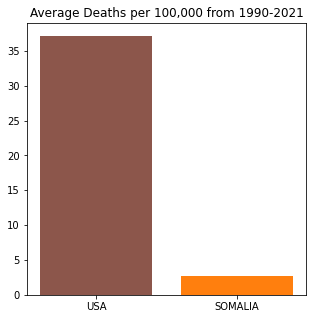



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and SOMALIA's parkinson's_disease deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by parkinson's_disease in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by parkinson's_disease in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  26.555040399
- Probability (p) value :  0.0000000000000000000005898687706329603478

- Decision
As p value ( 0.0000000000000000000005898687706329603478 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by parkinson's_disease in  USA and SOMALIA.
Time period : Past 30 years (

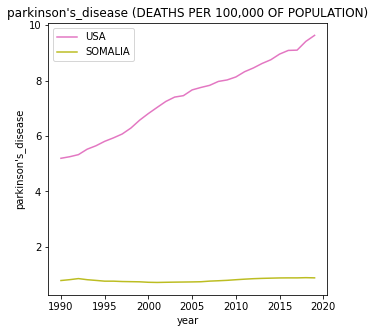

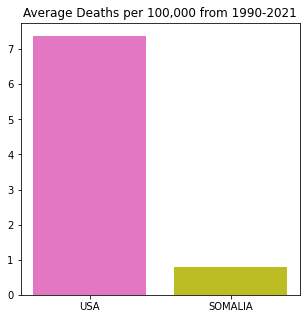



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and SOMALIA's nutritional_deficiency deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by nutritional_deficiency in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by nutritional_deficiency in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -17.073015564
- Probability (p) value :  0.0000000000000001136759919852063456086972

- Decision
As p value ( 0.0000000000000001136759919852063456086972 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by nutritional_deficiency in  USA and SOMALIA.
Time period : Past 

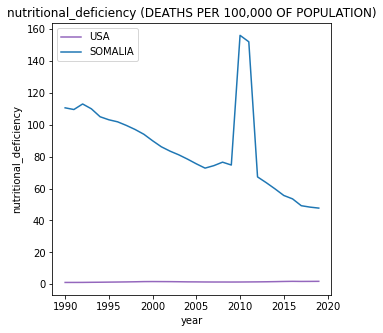

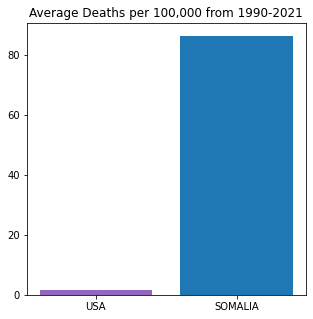



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and SOMALIA's malaria deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by malaria in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by malaria in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -9.353833813
- Probability (p) value :  0.0000000002937549789044346915798124455431

- Decision
As p value ( 0.0000000002937549789044346915798124455431 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by malaria in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



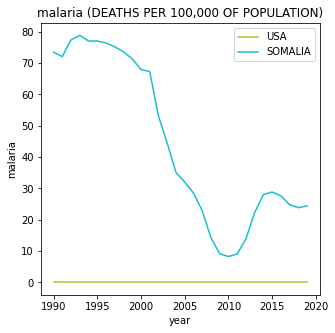

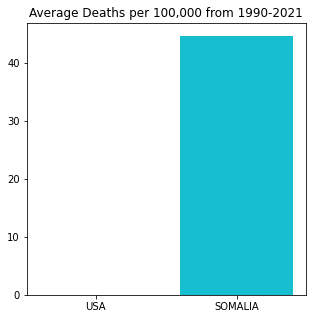



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and SOMALIA's drowning deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drowning in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drowning in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -56.517437761
- Probability (p) value :  0.0000000000000000000000000000000000000840

- Decision
As p value ( 0.0000000000000000000000000000000000000840 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drowning in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



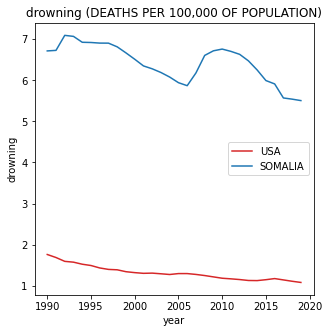

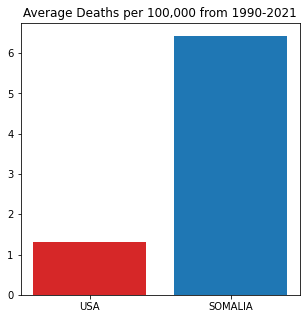



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and SOMALIA's interpersonal_violence deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by interpersonal_violence in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by interpersonal_violence in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -6.605450196
- Probability (p) value :  0.0000002251404523383228409536693662498785

- Decision
As p value ( 0.0000002251404523383228409536693662498785 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by interpersonal_violence in  USA and SOMALIA.
Time period : Past 3

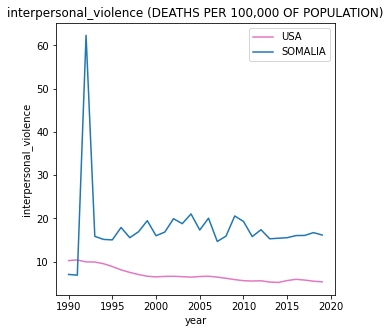

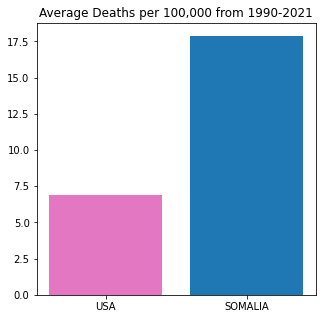



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and SOMALIA's maternal_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by maternal_disorders in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by maternal_disorders in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -69.673254035
- Probability (p) value :  0.0000000000000000000000000000000006259164

- Decision
As p value ( 0.0000000000000000000000000000000006259164 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by maternal_disorders in  USA and SOMALIA.
Time period : Past 30 years (19

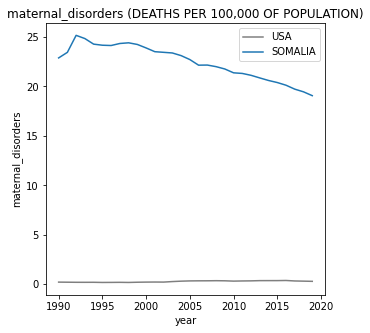

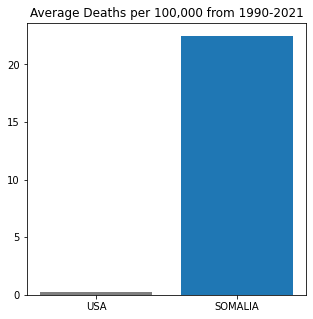



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and SOMALIA's hiv/aids deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by hiv/aids in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by hiv/aids in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -7.453777559
- Probability (p) value :  0.0000000070174167722846408334351355309041

- Decision
As p value ( 0.0000000070174167722846408334351355309041 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by hiv/aids in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



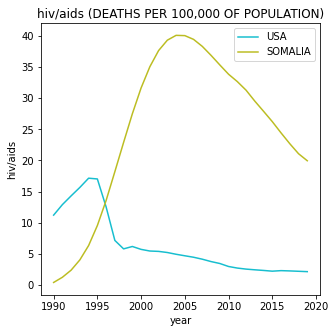

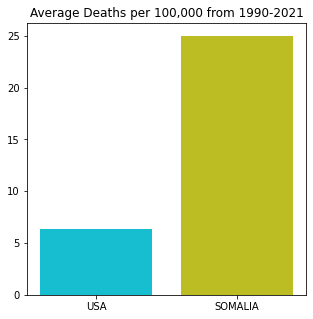



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and SOMALIA's drug_use_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drug_use_disorders in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drug_use_disorders in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  8.797510957
- Probability (p) value :  0.0000000011098810826071566068316108855172

- Decision
As p value ( 0.0000000011098810826071566068316108855172 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drug_use_disorders in  USA and SOMALIA.
Time period : Past 30 years (1991

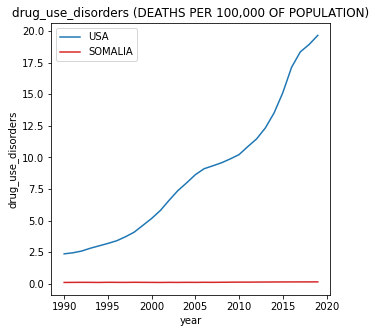

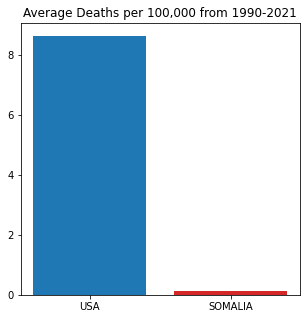



----------------------------------------------------------------------------------------------------


--------------- Welch's T Test for comparing USA's and SOMALIA's tuberculosis deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by tuberculosis in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by tuberculosis in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -55.730234639
- Probability (p) value :  0.0000000000000000000000000000004676887198

- Decision
As p value ( 0.0000000000000000000000000000004676887198 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by tuberculosis in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



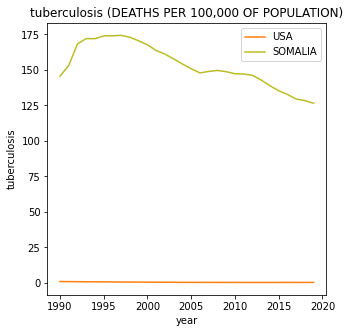

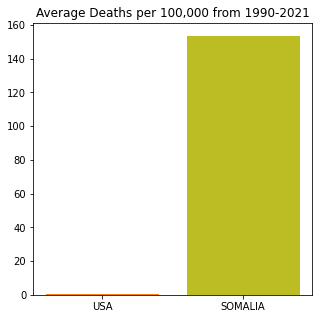



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing USA's and SOMALIA's cardiovascular_diseases deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by cardiovascular_diseases in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by cardiovascular_diseases in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  30.80951029
- Probability (p) value :  0.0000000000000000000000010957883927840839

- Decision
As p value ( 0.0000000000000000000000010957883927840839 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by cardiovascular_diseases in  USA and SOMALIA.
Time period : Past

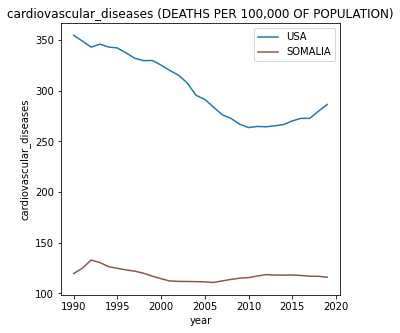

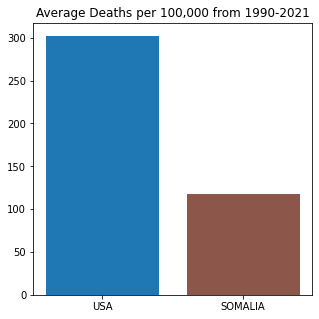



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing USA's and SOMALIA's lower_respiratory_infections deaths. -------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by lower_respiratory_infections in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by lower_respiratory_infections in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -29.309946348
- Probability (p) value :  0.0000000000000000000000192838958922791772

- Decision
As p value ( 0.0000000000000000000000192838958922791772 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by lower_respiratory_infections in  USA and SOMALIA.
T

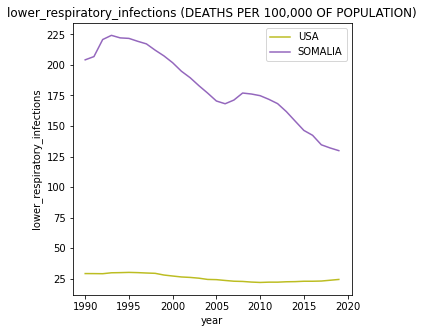

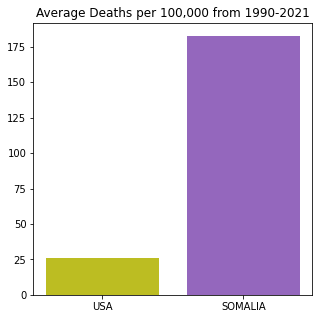



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and SOMALIA's neonatal_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neonatal_disorders in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neonatal_disorders in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -99.415206095
- Probability (p) value :  0.0000000000000000000000000000000000000011

- Decision
As p value ( 0.0000000000000000000000000000000000000011 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neonatal_disorders in  USA and SOMALIA.
Time period : Past 30 years (19

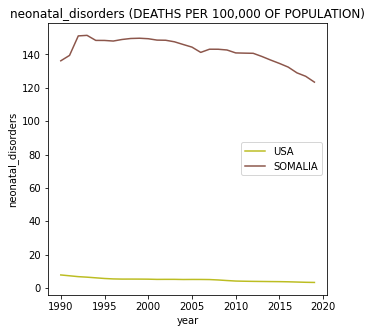

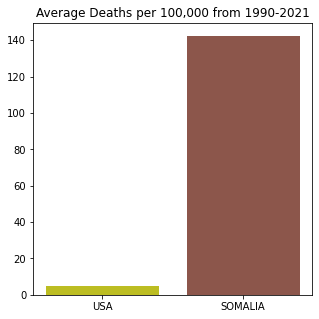



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and SOMALIA's alcohol_use_disorders deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alcohol_use_disorders in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alcohol_use_disorders in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  23.953537128
- Probability (p) value :  0.0000000000000000000100041570796713879872

- Decision
As p value ( 0.0000000000000000000100041570796713879872 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alcohol_use_disorders in  USA and SOMALIA.
Time period : Past 30 y

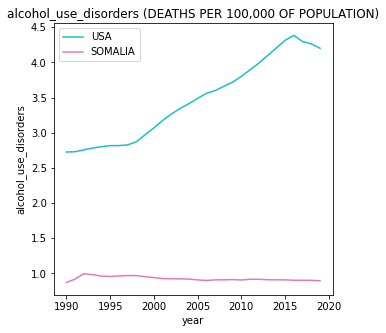

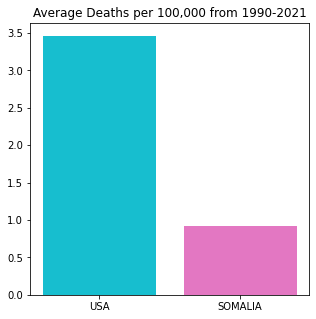



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing USA's and SOMALIA's self_harm deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by self_harm in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by self_harm in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  37.33945228
- Probability (p) value :  0.0000000000000000000000000000000102333539

- Decision
As p value ( 0.0000000000000000000000000000000102333539 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by self_harm in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



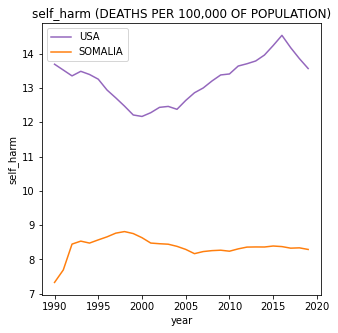

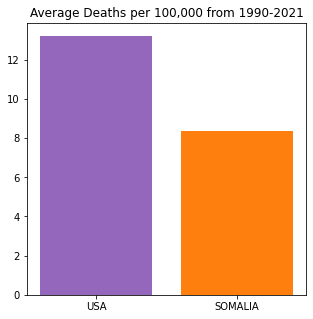



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing USA's and SOMALIA's exposure_to_forces_of_nature deaths. -------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -1.165451481
- Probability (p) value :  0.2532994535924381063196619834343437105417

- Decision
As p value ( 0.2532994535924381063196619834343437105417 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by exposure_to_forces_of_nature in  USA and SOMA

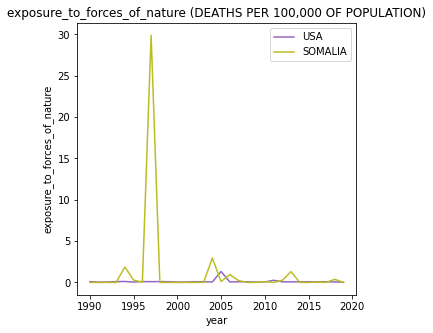

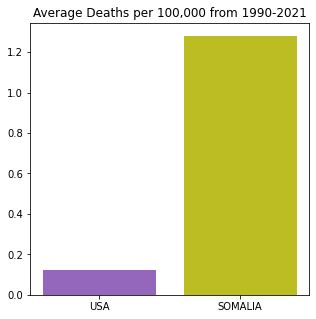



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and SOMALIA's diarrheal_diseases deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diarrheal_diseases in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diarrheal_diseases in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -20.934784859
- Probability (p) value :  0.0000000000000000004502829941272336463323

- Decision
As p value ( 0.0000000000000000004502829941272336463323 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diarrheal_diseases in  USA and SOMALIA.
Time period : Past 30 years (19

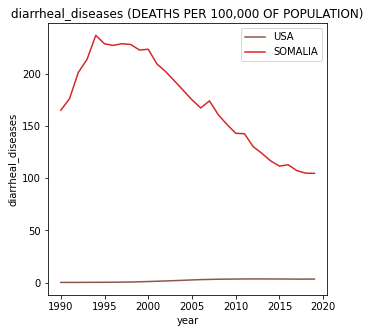

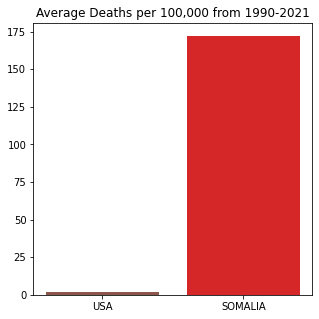



----------------------------------------------------------------------------------------------------


--- Welch's T Test for comparing USA's and SOMALIA's environmental_heat_and_cold_exposure deaths. ---

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -53.521699463
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by environmental_heat_and_cold_exposur

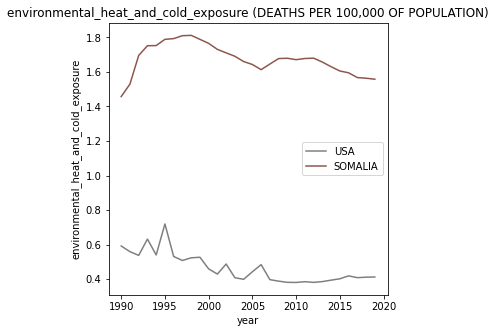

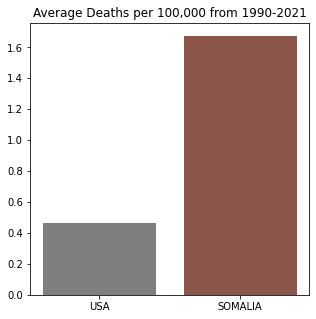



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing USA's and SOMALIA's neoplasms deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neoplasms in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neoplasms in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  153.239871515
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neoplasms in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



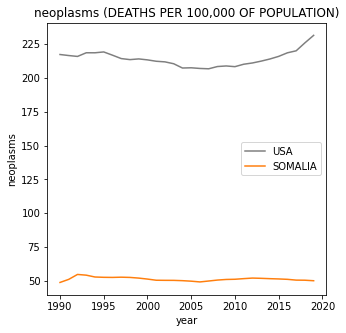

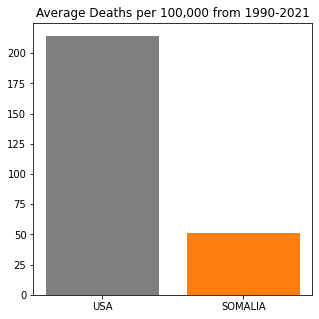



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and SOMALIA's conflict_and_terrorism deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by conflict_and_terrorism in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by conflict_and_terrorism in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -3.91125847
- Probability (p) value :  0.0005086103948804760258028956343423487851

- Decision
As p value ( 0.0005086103948804760258028956343423487851 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by conflict_and_terrorism in  USA and SOMALIA.
Time period : Past 30

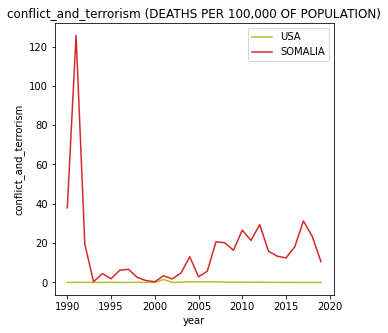

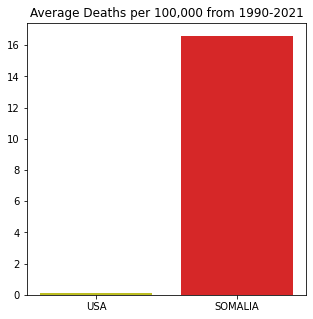



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and SOMALIA's diabetes_mellitus deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diabetes_mellitus in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diabetes_mellitus in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  17.275194291
- Probability (p) value :  0.0000000000000000083680498028427849508986

- Decision
As p value ( 0.0000000000000000083680498028427849508986 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diabetes_mellitus in  USA and SOMALIA.
Time period : Past 30 years (1991-2

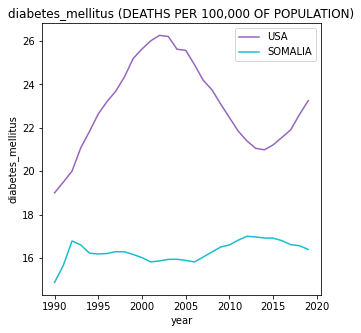

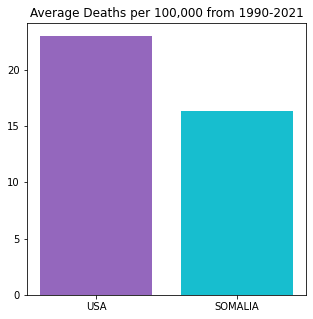



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and SOMALIA's chronic_kidney_disease deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_kidney_disease in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_kidney_disease in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  9.000296255
- Probability (p) value :  0.0000000006441002040489835862768463687949

- Decision
As p value ( 0.0000000006441002040489835862768463687949 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_kidney_disease in  USA and SOMALIA.
Time period : Past 30

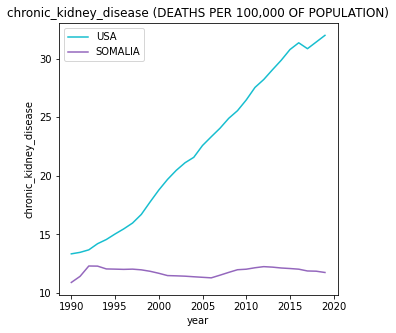

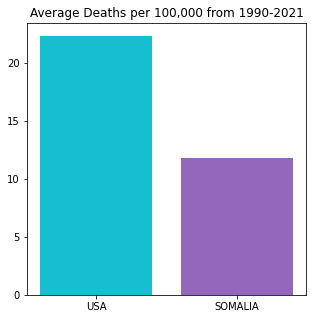



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing USA's and SOMALIA's poisonings deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by poisonings in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by poisonings in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -111.824469813
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by poisonings in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



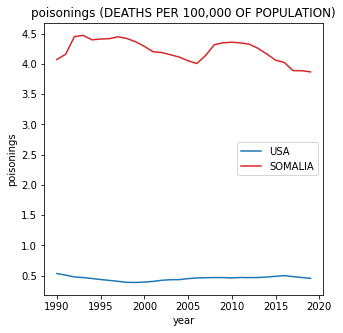

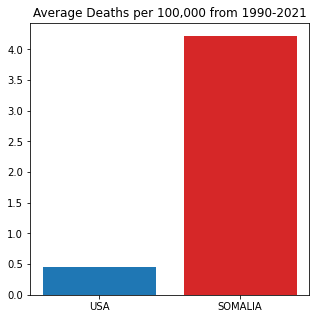



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing USA's and SOMALIA's protein_energy_malnutrition deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -17.234214549
- Probability (p) value :  0.0000000000000000885978056891619037877167

- Decision
As p value ( 0.0000000000000000885978056891619037877167 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by protein_energy_malnutrition in  USA and SOMALIA.
Time

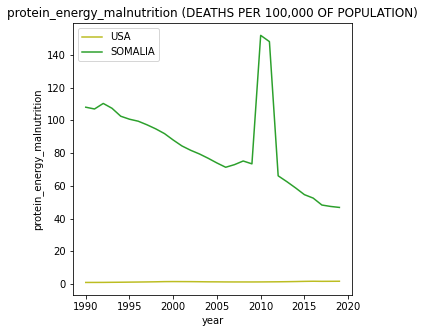

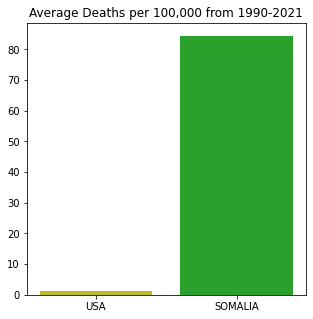



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing USA's and SOMALIA's terrorism deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by terrorism in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by terrorism in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -4.117272841
- Probability (p) value :  0.0002886210751217594804723942658597479749

- Decision
As p value ( 0.0002886210751217594804723942658597479749 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by terrorism in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



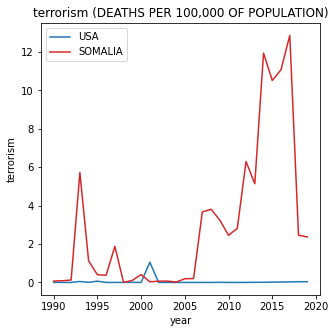

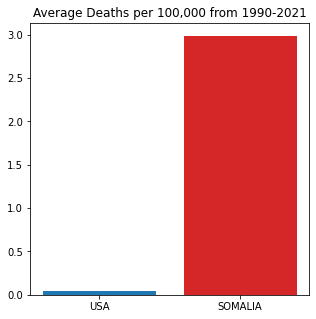



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and SOMALIA's road_injuries deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by road_injuries in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by road_injuries in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -16.43669644
- Probability (p) value :  0.0000000000000000003245298960061686433206

- Decision
As p value ( 0.0000000000000000003245298960061686433206 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by road_injuries in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)



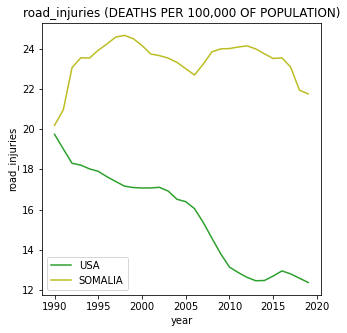

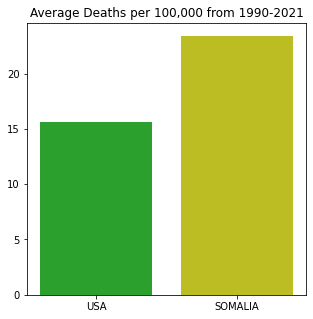



----------------------------------------------------------------------------------------------------


------- Welch's T Test for comparing USA's and SOMALIA's chronic_respiratory_diseases deaths. -------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  21.085703028
- Probability (p) value :  0.0000000000000000000005796740608012428512

- Decision
As p value ( 0.0000000000000000000005796740608012428512 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_respiratory_diseases in  USA and SOMALIA.
Ti

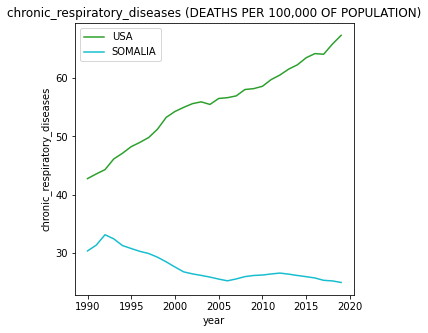

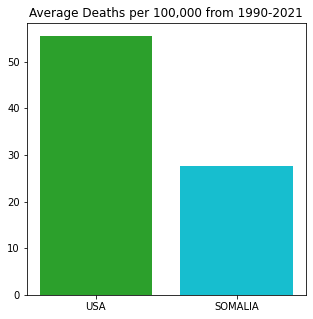



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and SOMALIA's chronic_liver_diseases deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_liver_diseases in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_liver_diseases in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -20.557622814
- Probability (p) value :  0.0000000000000000000000123501793644110794

- Decision
As p value ( 0.0000000000000000000000123501793644110794 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_liver_diseases in  USA and SOMALIA.
Time period : Past 

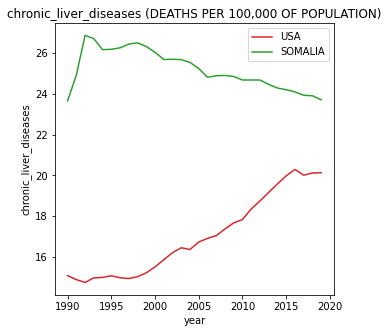

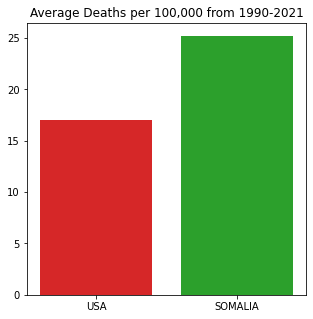



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and SOMALIA's digestive_diseases deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by digestive_diseases in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by digestive_diseases in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -11.442827209
- Probability (p) value :  0.0000000000000028516995351749696026954036

- Decision
As p value ( 0.0000000000000028516995351749696026954036 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by digestive_diseases in  USA and SOMALIA.
Time period : Past 30 years (19

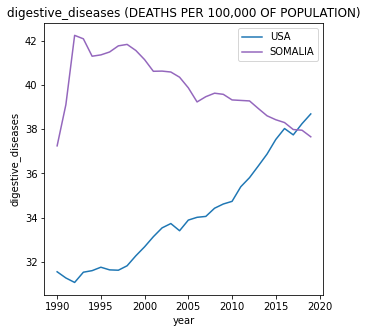

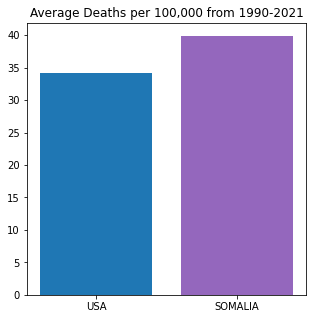



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing USA's and SOMALIA's fire_heat_hot_substance deaths. ----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -39.65781077
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by fire_heat_hot_substance in  USA and SOMALIA.
Time period : Pas

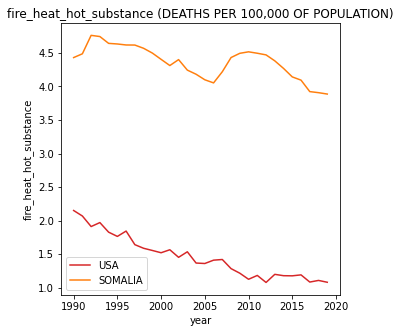

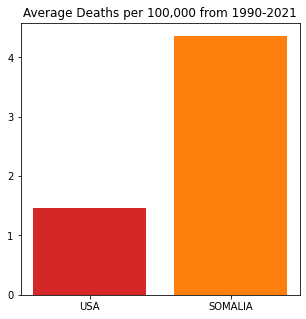



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and SOMALIA's acute_hepatitis deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by acute_hepatitis in  USA and SOMALIA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by acute_hepatitis in  USA and SOMALIA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -29.778587437
- Probability (p) value :  0.0000000000000000000000264531469798129400

- Decision
As p value ( 0.0000000000000000000000264531469798129400 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by acute_hepatitis in  USA and SOMALIA.
Time period : Past 30 years (1991-2019)


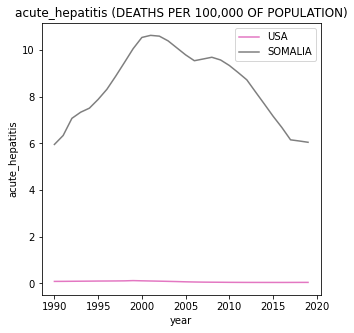

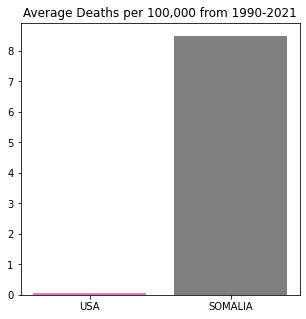



----------------------------------------------------------------------------------------------------




In [186]:
finalResult(df_usa,df_som,usa_som_t_test,"USA","SOMALIA",0.05,show_only_nnullAcceptance = False)

## Comparing USA and China's causes of death

----------------- Welch's T Test for comparing USA's and CHINA's meningitis deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by meningitis in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by meningitis in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -4.815295935
- Probability (p) value :  0.0000397153830884458617896462517826705607

- Decision
As p value ( 0.0000397153830884458617896462517826705607 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by meningitis in  USA and CHINA.
Time period : Past 30 years (1991-2019)



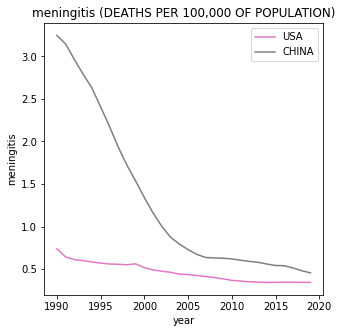

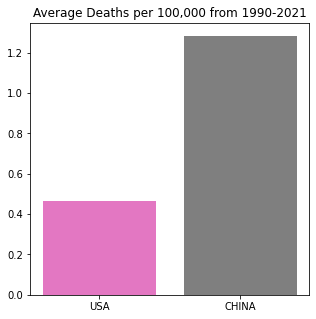



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and CHINA's alzheimer's_diesease deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alzheimer's_diesease in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alzheimer's_diesease in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  22.839351597
- Probability (p) value :  0.0000000000000000000000000000102902894197

- Decision
As p value ( 0.0000000000000000000000000000102902894197 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alzheimer's_diesease in  USA and CHINA.
Time period : Past 30 years (199

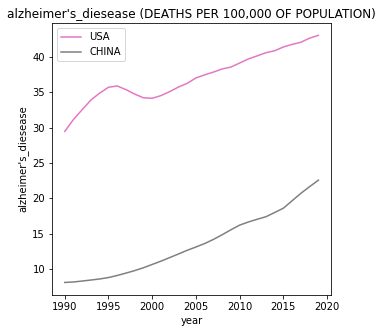

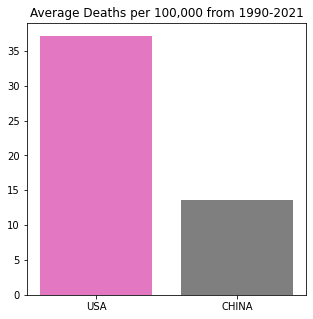



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing USA's and CHINA's parkinson's_disease deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by parkinson's_disease in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by parkinson's_disease in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  12.053940285
- Probability (p) value :  0.0000000000000004122001940944389932091708

- Decision
As p value ( 0.0000000000000004122001940944389932091708 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by parkinson's_disease in  USA and CHINA.
Time period : Past 30 years (1991-2

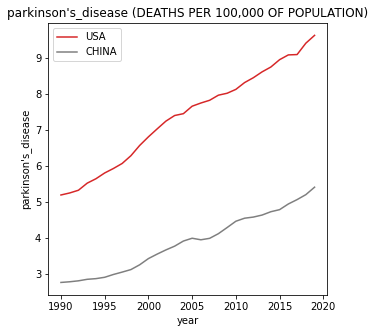

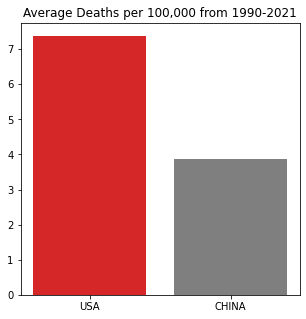



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and CHINA's nutritional_deficiency deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by nutritional_deficiency in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by nutritional_deficiency in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -0.27975582
- Probability (p) value :  0.7814673954375852549247838396695442497730

- Decision
As p value ( 0.7814673954375852549247838396695442497730 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by nutritional_deficiency in  USA and CHINA.
Time period : Past 3

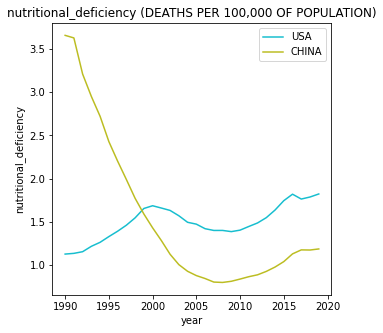

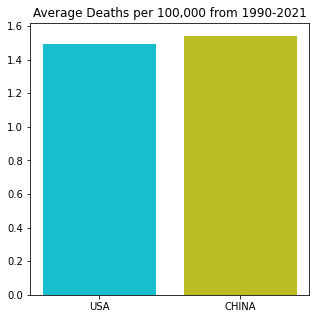



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing USA's and CHINA's malaria deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by malaria in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by malaria in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -3.572827962
- Probability (p) value :  0.0012581495305093860596901134130121135968

- Decision
As p value ( 0.0012581495305093860596901134130121135968 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by malaria in  USA and CHINA.
Time period : Past 30 years (1991-2019)



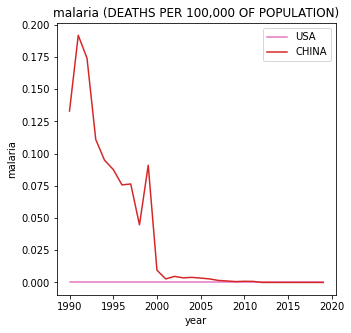

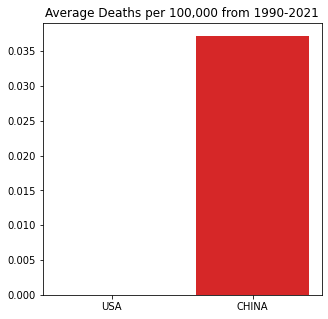



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing USA's and CHINA's drowning deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drowning in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drowning in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -11.247361105
- Probability (p) value :  0.0000000000039321085861434915352577619482

- Decision
As p value ( 0.0000000000039321085861434915352577619482 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drowning in  USA and CHINA.
Time period : Past 30 years (1991-2019)



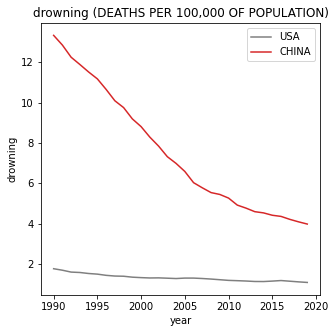

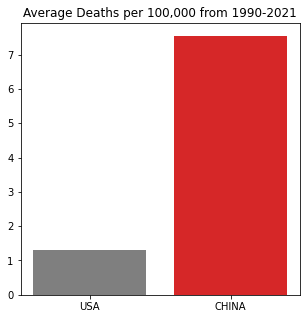



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and CHINA's interpersonal_violence deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by interpersonal_violence in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by interpersonal_violence in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  14.402441152
- Probability (p) value :  0.0000000000000000024354507265098635205071

- Decision
As p value ( 0.0000000000000000024354507265098635205071 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by interpersonal_violence in  USA and CHINA.
Time period : Past 30 year

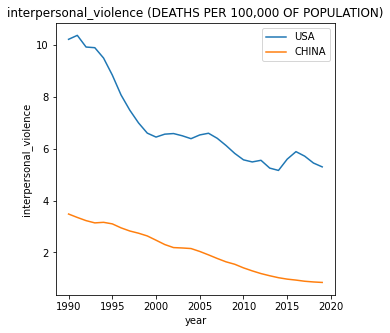

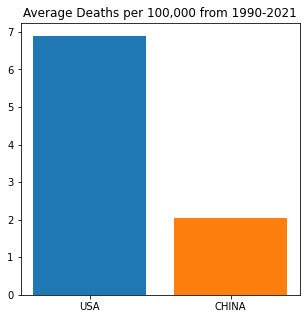



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and CHINA's maternal_disorders deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by maternal_disorders in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by maternal_disorders in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -4.454097485
- Probability (p) value :  0.0001049983244018230717524084449898680305

- Decision
As p value ( 0.0001049983244018230717524084449898680305 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by maternal_disorders in  USA and CHINA.
Time period : Past 30 years (1991-2019

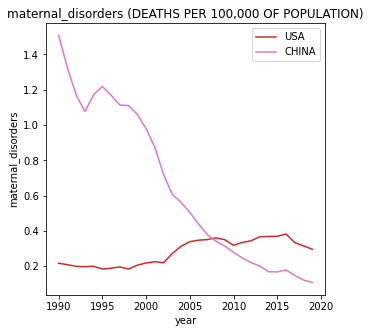

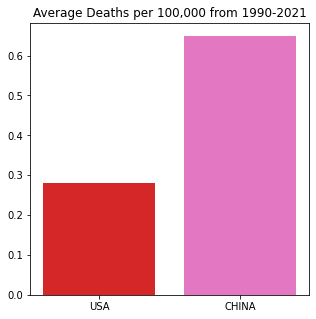



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing USA's and CHINA's hiv/aids deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by hiv/aids in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by hiv/aids in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  5.934278026
- Probability (p) value :  0.0000017056648013915116910869463132116586

- Decision
As p value ( 0.0000017056648013915116910869463132116586 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by hiv/aids in  USA and CHINA.
Time period : Past 30 years (1991-2019)



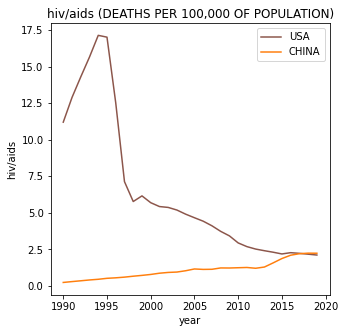

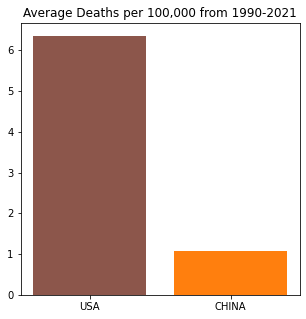



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and CHINA's drug_use_disorders deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drug_use_disorders in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drug_use_disorders in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  7.070314524
- Probability (p) value :  0.0000000588903324541616490742897214571289

- Decision
As p value ( 0.0000000588903324541616490742897214571289 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drug_use_disorders in  USA and CHINA.
Time period : Past 30 years (1991-2019)

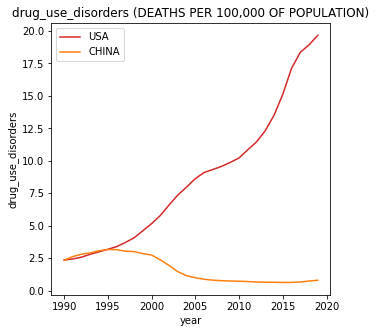

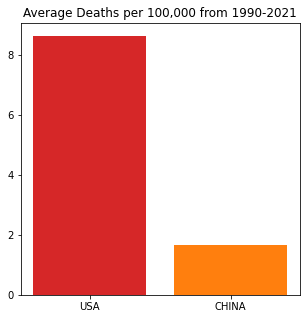



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing USA's and CHINA's tuberculosis deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by tuberculosis in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by tuberculosis in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -9.343716548
- Probability (p) value :  0.0000000002858977108519702323676392570690

- Decision
As p value ( 0.0000000002858977108519702323676392570690 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by tuberculosis in  USA and CHINA.
Time period : Past 30 years (1991-2019)



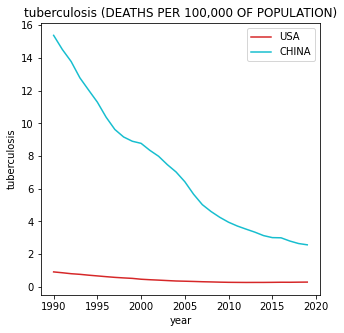

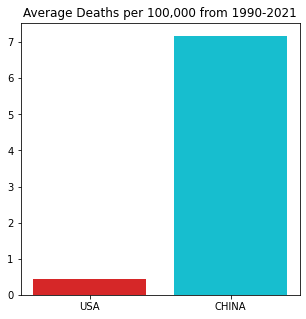



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and CHINA's cardiovascular_diseases deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by cardiovascular_diseases in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by cardiovascular_diseases in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  5.080039755
- Probability (p) value :  0.0000044517691378656012315766753173473802

- Decision
As p value ( 0.0000044517691378656012315766753173473802 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by cardiovascular_diseases in  USA and CHINA.
Time period : Past 30 ye

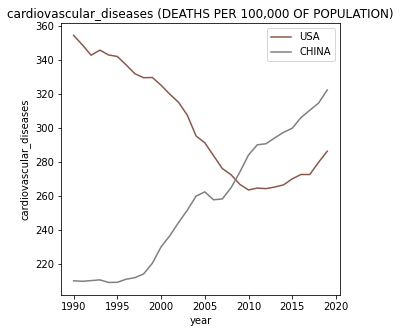

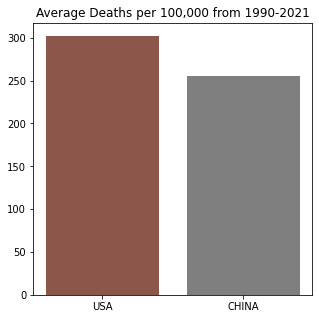



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and CHINA's lower_respiratory_infections deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by lower_respiratory_infections in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by lower_respiratory_infections in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  1.486126058
- Probability (p) value :  0.1467176680468748883878760125298867933452

- Decision
As p value ( 0.1467176680468748883878760125298867933452 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by lower_respiratory_infections in  USA and CHINA.
Ti

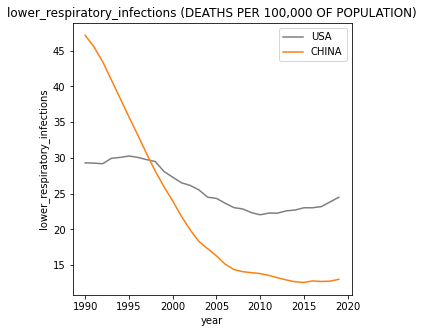

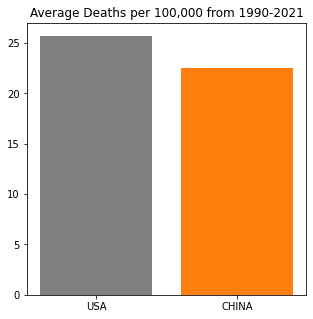



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and CHINA's neonatal_disorders deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neonatal_disorders in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neonatal_disorders in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -5.070225375
- Probability (p) value :  0.0000183189792128165955011065424429261839

- Decision
As p value ( 0.0000183189792128165955011065424429261839 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neonatal_disorders in  USA and CHINA.
Time period : Past 30 years (1991-2019

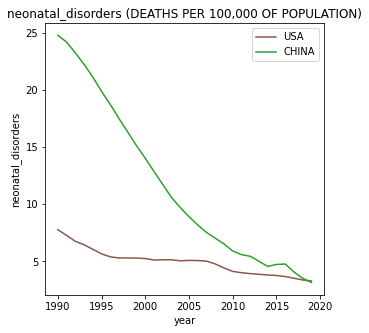

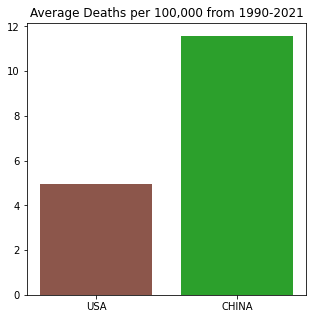



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and CHINA's alcohol_use_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alcohol_use_disorders in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alcohol_use_disorders in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  18.366022554
- Probability (p) value :  0.0000000000000000000000901263087962077343

- Decision
As p value ( 0.0000000000000000000000901263087962077343 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alcohol_use_disorders in  USA and CHINA.
Time period : Past 30 years (

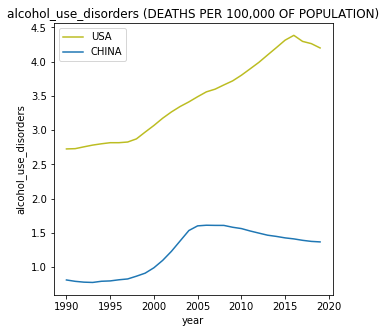

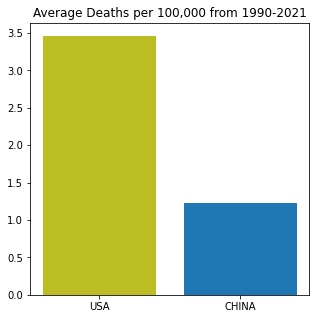



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and CHINA's self_harm deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by self_harm in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by self_harm in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -0.01911582
- Probability (p) value :  0.9848717174778134353374525744584389030933

- Decision
As p value ( 0.9848717174778134353374525744584389030933 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by self_harm in  USA and CHINA.
Time period : Past 30 years (1991-2019)



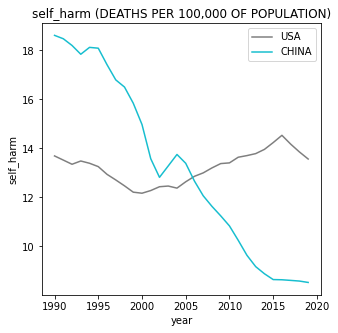

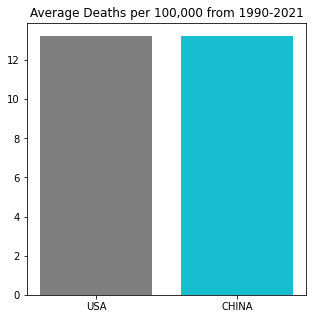



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and CHINA's exposure_to_forces_of_nature deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by exposure_to_forces_of_nature in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -1.047596454
- Probability (p) value :  0.3028850053303939748872153359116055071354

- Decision
As p value ( 0.3028850053303939748872153359116055071354 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by exposure_to_forces_of_nature in  USA and CHINA.
T

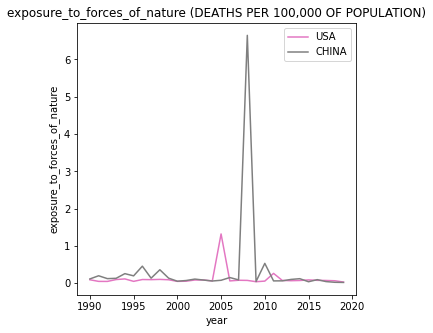

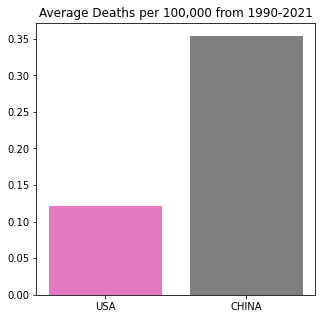



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and CHINA's diarrheal_diseases deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diarrheal_diseases in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diarrheal_diseases in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -0.509791086
- Probability (p) value :  0.6125966788038997856702394528838340193033

- Decision
As p value ( 0.6125966788038997856702394528838340193033 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by diarrheal_diseases in  USA and CHINA.
Time period : Past 30 years (19

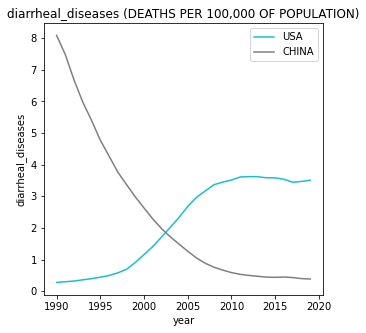

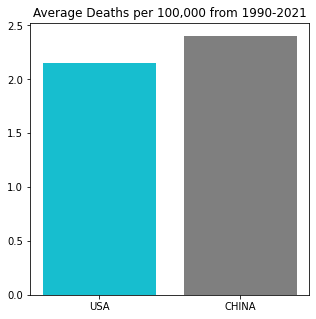



----------------------------------------------------------------------------------------------------


---- Welch's T Test for comparing USA's and CHINA's environmental_heat_and_cold_exposure deaths. ----

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -1.363081587
- Probability (p) value :  0.1807996324706850066466046200730488635600

- Decision
As p value ( 0.1807996324706850066466046200730488635600 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by environmental_heat_and_cold_expos

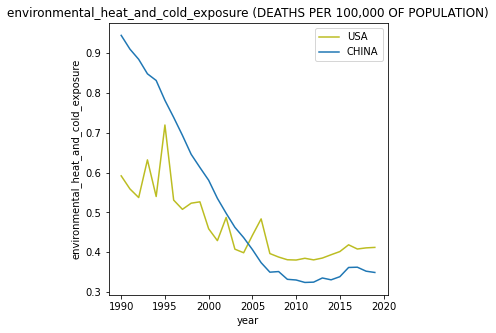

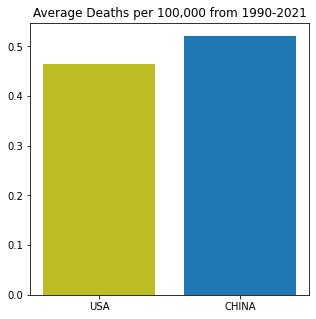



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and CHINA's neoplasms deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neoplasms in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neoplasms in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  16.465602849
- Probability (p) value :  0.0000000000000000074619073481330581096532

- Decision
As p value ( 0.0000000000000000074619073481330581096532 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neoplasms in  USA and CHINA.
Time period : Past 30 years (1991-2019)



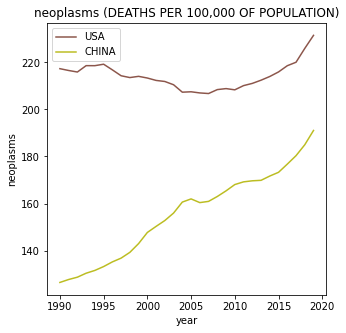

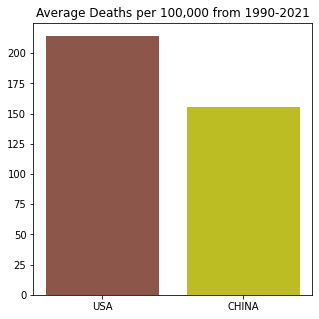



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and CHINA's conflict_and_terrorism deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by conflict_and_terrorism in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by conflict_and_terrorism in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  2.641191775
- Probability (p) value :  0.0131539409627529444574145500723716395441

- Decision
As p value ( 0.0131539409627529444574145500723716395441 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by conflict_and_terrorism in  USA and CHINA.
Time period : Past 30 years

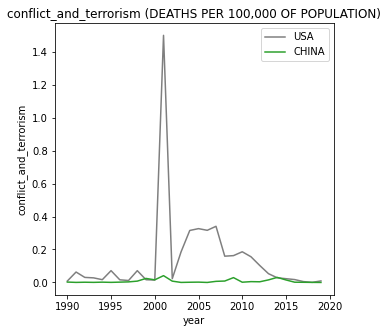

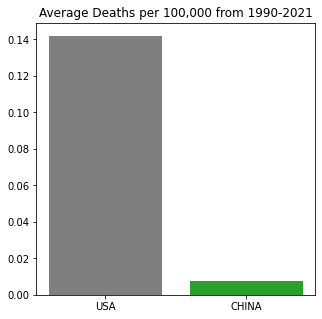



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and CHINA's diabetes_mellitus deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diabetes_mellitus in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diabetes_mellitus in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  27.728386106
- Probability (p) value :  0.0000000000000000000000000000000000542848

- Decision
As p value ( 0.0000000000000000000000000000000000542848 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diabetes_mellitus in  USA and CHINA.
Time period : Past 30 years (1991-2019)



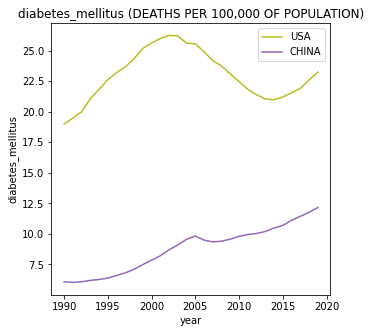

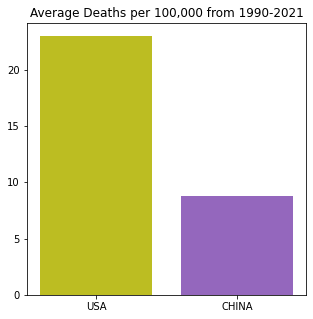



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and CHINA's chronic_kidney_disease deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_kidney_disease in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_kidney_disease in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  9.622395161
- Probability (p) value :  0.0000000000329172047929684056751571849752

- Decision
As p value ( 0.0000000000329172047929684056751571849752 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_kidney_disease in  USA and CHINA.
Time period : Past 30 years

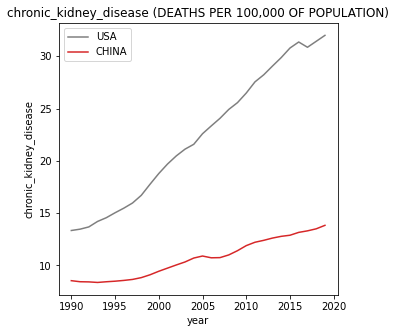

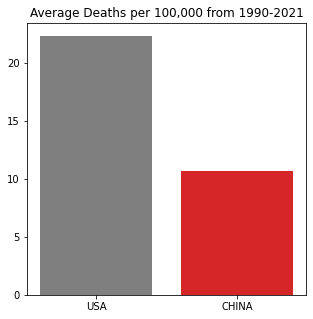



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and CHINA's poisonings deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by poisonings in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by poisonings in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -40.828096349
- Probability (p) value :  0.0000000000000000000000000002090971098343

- Decision
As p value ( 0.0000000000000000000000000002090971098343 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by poisonings in  USA and CHINA.
Time period : Past 30 years (1991-2019)



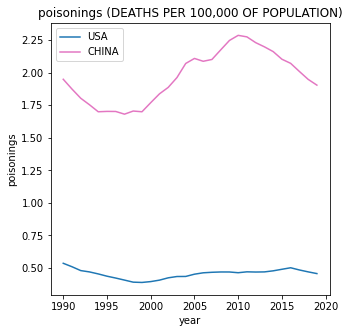

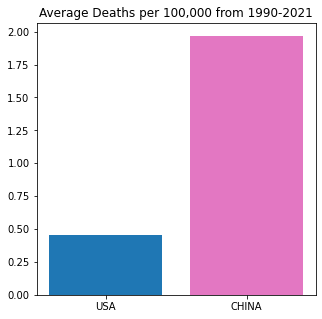



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and CHINA's protein_energy_malnutrition deaths. ---------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by protein_energy_malnutrition in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  0.05841642
- Probability (p) value :  0.9537798230721844516821761317260097712278

- Decision
As p value ( 0.9537798230721844516821761317260097712278 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by protein_energy_malnutrition in  USA and CHINA.
Time p

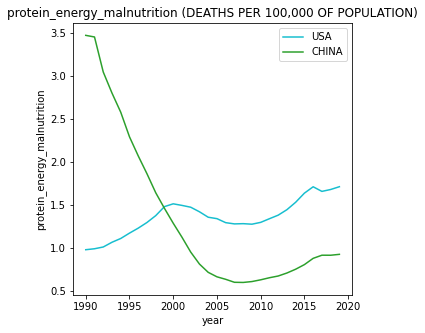

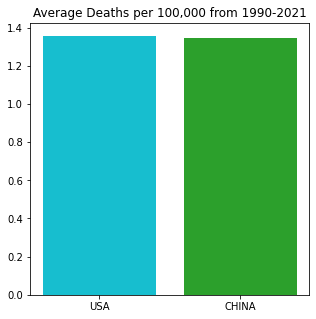



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing USA's and CHINA's terrorism deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by terrorism in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by terrorism in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  1.213646901
- Probability (p) value :  0.2346626848697666578580367513495730236173

- Decision
As p value ( 0.2346626848697666578580367513495730236173 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by terrorism in  USA and CHINA.
Time period : Past 30 years (1991-2019)



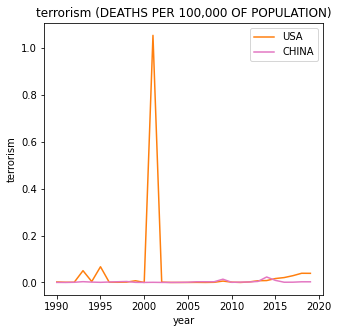

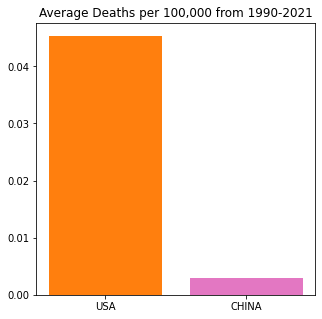



----------------------------------------------------------------------------------------------------


--------------- Welch's T Test for comparing USA's and CHINA's road_injuries deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by road_injuries in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by road_injuries in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -9.269995655
- Probability (p) value :  0.0000000000004811062678827343720933914839

- Decision
As p value ( 0.0000000000004811062678827343720933914839 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by road_injuries in  USA and CHINA.
Time period : Past 30 years (1991-2019)



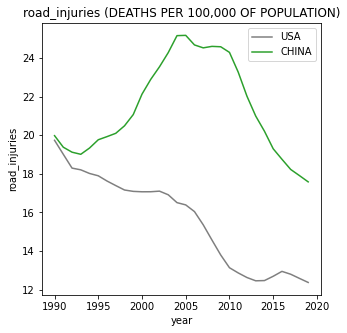

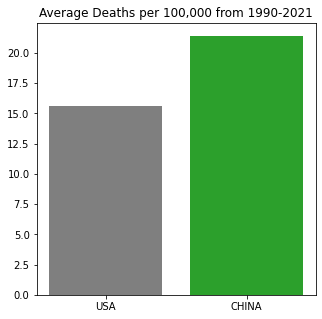



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing USA's and CHINA's chronic_respiratory_diseases deaths. --------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_respiratory_diseases in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -13.031389
- Probability (p) value :  0.0000000000000004747913633541133308388660

- Decision
As p value ( 0.0000000000000004747913633541133308388660 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_respiratory_diseases in  USA and CHINA.
Time perio

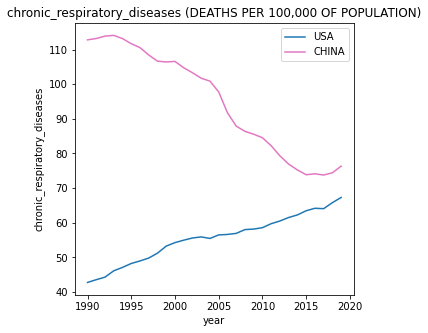

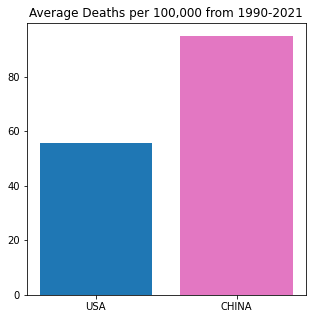



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing USA's and CHINA's chronic_liver_diseases deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_liver_diseases in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_liver_diseases in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  9.946990876
- Probability (p) value :  0.0000000000001499159944942417873677463995

- Decision
As p value ( 0.0000000000001499159944942417873677463995 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_liver_diseases in  USA and CHINA.
Time period : Past 30 years

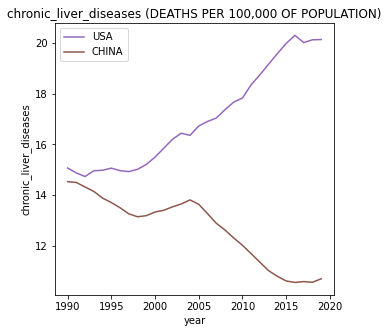

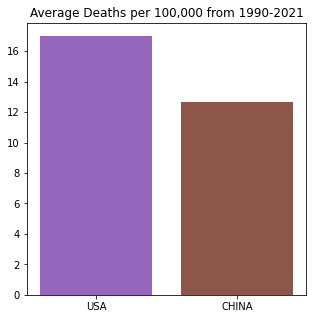



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing USA's and CHINA's digestive_diseases deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by digestive_diseases in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by digestive_diseases in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  16.718363205
- Probability (p) value :  0.0000000000000000000000131983100311294301

- Decision
As p value ( 0.0000000000000000000000131983100311294301 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by digestive_diseases in  USA and CHINA.
Time period : Past 30 years (1991-2019

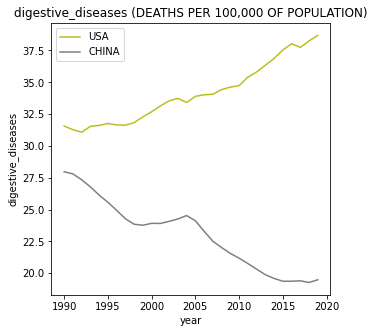

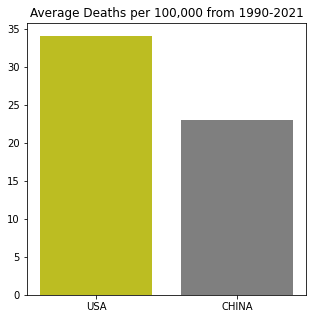



----------------------------------------------------------------------------------------------------


---------- Welch's T Test for comparing USA's and CHINA's fire_heat_hot_substance deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by fire_heat_hot_substance in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.465950515
- Probability (p) value :  0.0000000315204075118134456392247433418469

- Decision
As p value ( 0.0000000315204075118134456392247433418469 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by fire_heat_hot_substance in  USA and CHINA.
Time period : Past 30 ye

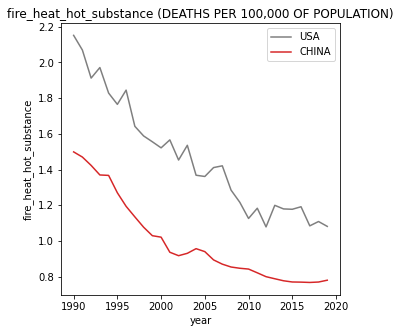

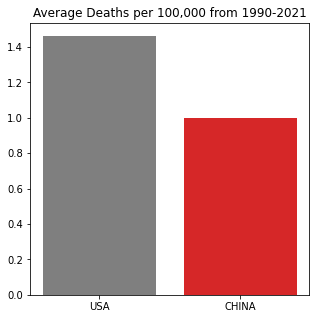



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing USA's and CHINA's acute_hepatitis deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by acute_hepatitis in  USA and CHINA.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by acute_hepatitis in  USA and CHINA.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -6.498075323
- Probability (p) value :  0.0000004035622050898435671039505764912114

- Decision
As p value ( 0.0000004035622050898435671039505764912114 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by acute_hepatitis in  USA and CHINA.
Time period : Past 30 years (1991-2019)



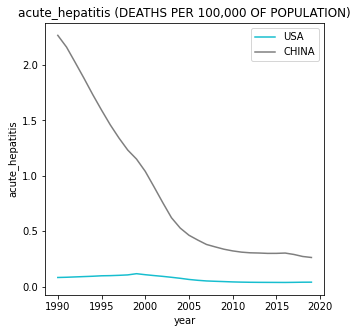

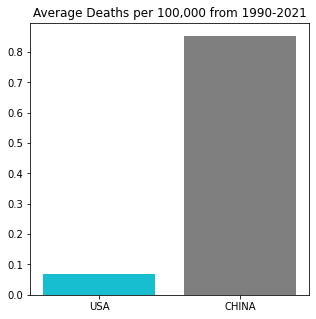



----------------------------------------------------------------------------------------------------




In [187]:
finalResult(df_usa,df_china,us_china_t_test,"USA","CHINA",0.05,show_only_nnullAcceptance = False)

## Comparing India and UK's causes of death

----------------- Welch's T Test for comparing INDIA's and UK's meningitis deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by meningitis in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by meningitis in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  11.712240511
- Probability (p) value :  0.0000000000013699062343824697815157319368

- Decision
As p value ( 0.0000000000013699062343824697815157319368 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by meningitis in  INDIA and UK.
Time period : Past 30 years (1991-2019)



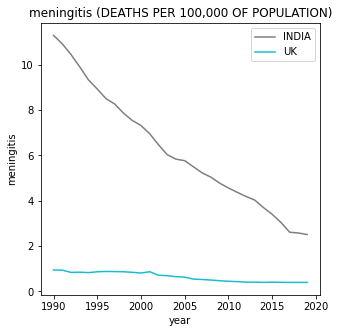

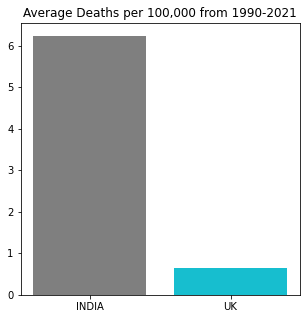



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and UK's alzheimer's_diesease deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alzheimer's_diesease in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alzheimer's_diesease in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -37.057085825
- Probability (p) value :  0.0000000000000000000000000000001841781171

- Decision
As p value ( 0.0000000000000000000000000000001841781171 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alzheimer's_diesease in  INDIA and UK.
Time period : Past 30 years (1991-

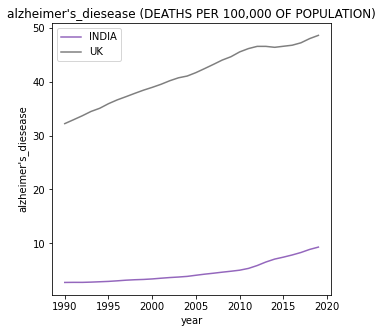

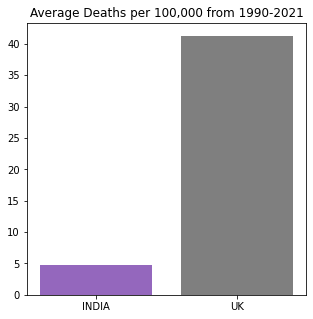



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing INDIA's and UK's parkinson's_disease deaths. -------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by parkinson's_disease in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by parkinson's_disease in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -33.788673562
- Probability (p) value :  0.0000000000000000000000000000001964623419

- Decision
As p value ( 0.0000000000000000000000000000001964623419 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by parkinson's_disease in  INDIA and UK.
Time period : Past 30 years (1991-201

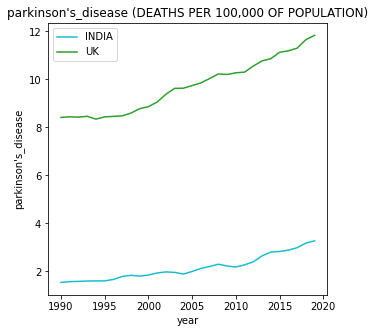

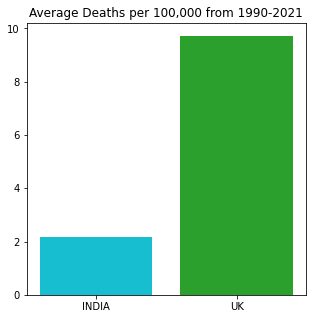



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and UK's nutritional_deficiency deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by nutritional_deficiency in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by nutritional_deficiency in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.56408317
- Probability (p) value :  0.0000003431706719787831192794772244142321

- Decision
As p value ( 0.0000003431706719787831192794772244142321 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by nutritional_deficiency in  INDIA and UK.
Time period : Past 30 years (19

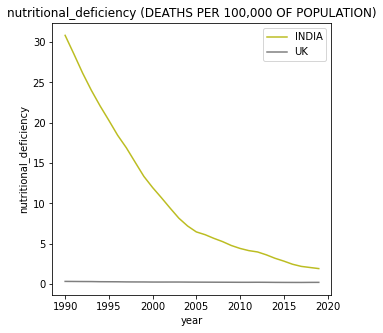

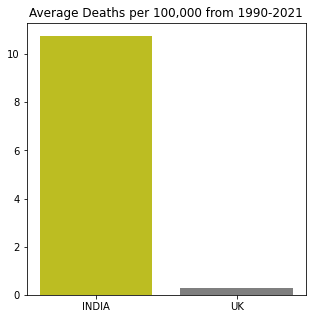



----------------------------------------------------------------------------------------------------


------------------- Welch's T Test for comparing INDIA's and UK's malaria deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by malaria in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by malaria in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  8.622046099
- Probability (p) value :  0.0000000017025710739845383730019215184686

- Decision
As p value ( 0.0000000017025710739845383730019215184686 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by malaria in  INDIA and UK.
Time period : Past 30 years (1991-2019)



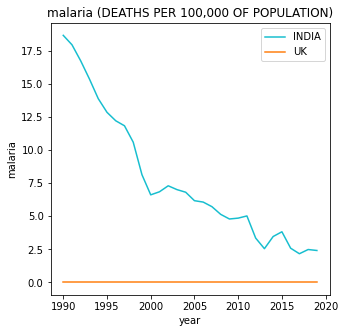

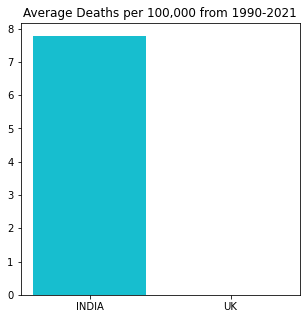



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing INDIA's and UK's drowning deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drowning in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drowning in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  16.91412717
- Probability (p) value :  0.0000000000000001297265579124286527213563

- Decision
As p value ( 0.0000000000000001297265579124286527213563 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drowning in  INDIA and UK.
Time period : Past 30 years (1991-2019)



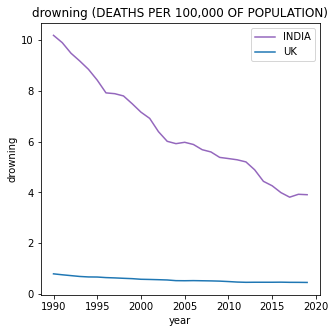

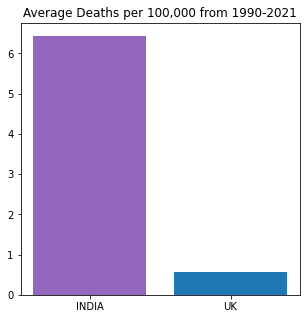



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and UK's interpersonal_violence deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by interpersonal_violence in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by interpersonal_violence in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  28.457544342
- Probability (p) value :  0.0000000000000000000000000000941511161722

- Decision
As p value ( 0.0000000000000000000000000000941511161722 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by interpersonal_violence in  INDIA and UK.
Time period : Past 30 years (

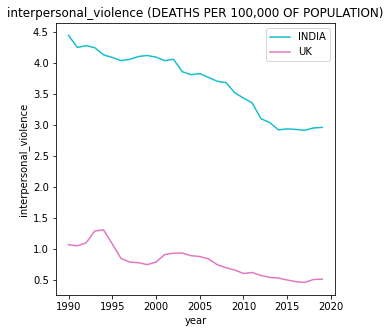

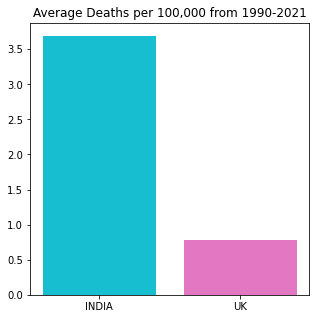



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing INDIA's and UK's maternal_disorders deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by maternal_disorders in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by maternal_disorders in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  12.552130703
- Probability (p) value :  0.0000000000003009038517927135048074732209

- Decision
As p value ( 0.0000000000003009038517927135048074732209 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by maternal_disorders in  INDIA and UK.
Time period : Past 30 years (1991-2019)



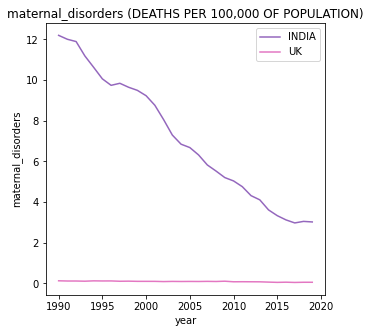

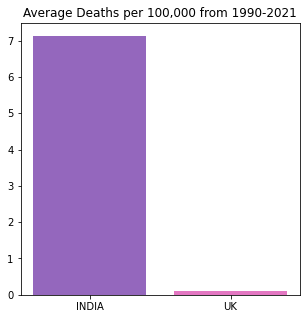



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing INDIA's and UK's hiv/aids deaths. -------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by hiv/aids in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by hiv/aids in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  7.204445068
- Probability (p) value :  0.0000000592358426448705062540800404466412

- Decision
As p value ( 0.0000000592358426448705062540800404466412 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by hiv/aids in  INDIA and UK.
Time period : Past 30 years (1991-2019)



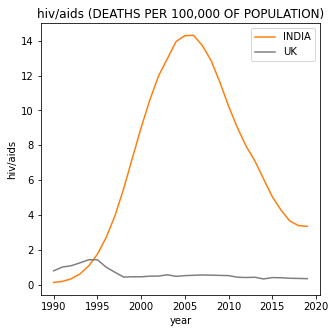

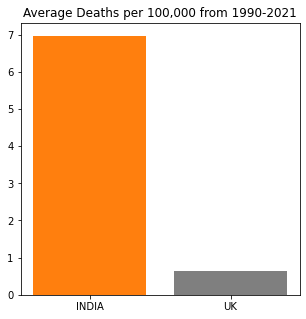



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing INDIA's and UK's drug_use_disorders deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by drug_use_disorders in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by drug_use_disorders in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -17.517687658
- Probability (p) value :  0.0000000000000000478177571725998194708249

- Decision
As p value ( 0.0000000000000000478177571725998194708249 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by drug_use_disorders in  INDIA and UK.
Time period : Past 30 years (1991-2019)


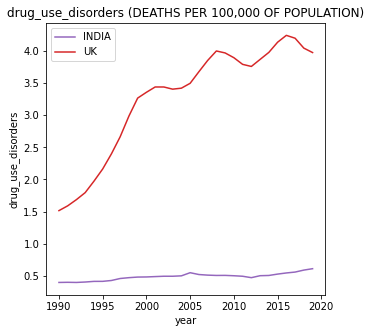

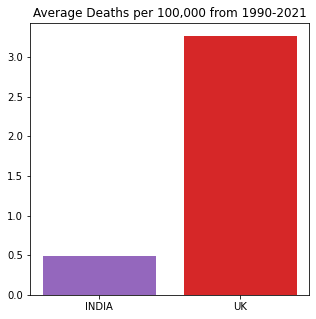



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing INDIA's and UK's tuberculosis deaths. -----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by tuberculosis in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by tuberculosis in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  19.223211982
- Probability (p) value :  0.0000000000000000047230261118018378033842

- Decision
As p value ( 0.0000000000000000047230261118018378033842 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by tuberculosis in  INDIA and UK.
Time period : Past 30 years (1991-2019)



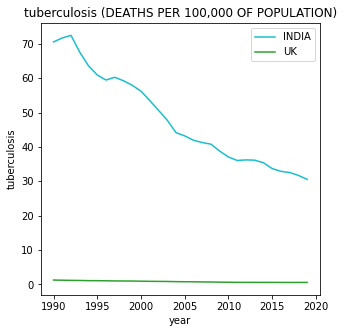

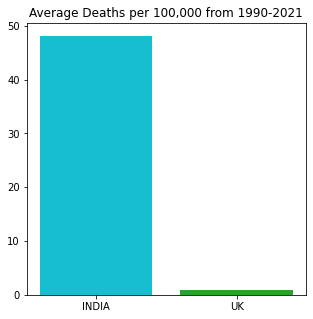



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and UK's cardiovascular_diseases deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by cardiovascular_diseases in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by cardiovascular_diseases in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -13.383569158
- Probability (p) value :  0.0000000000000217985400299405973976304912

- Decision
As p value ( 0.0000000000000217985400299405973976304912 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by cardiovascular_diseases in  INDIA and UK.
Time period : Past 30 yea

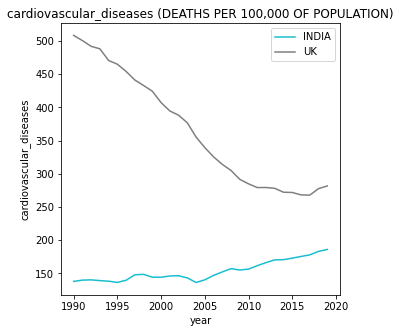

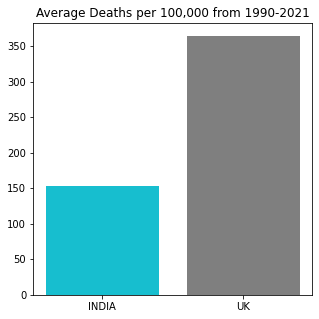



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing INDIA's and UK's lower_respiratory_infections deaths. ---------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by lower_respiratory_infections in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by lower_respiratory_infections in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -5.406863502
- Probability (p) value :  0.0000014491889093372765898886690705271718

- Decision
As p value ( 0.0000014491889093372765898886690705271718 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by lower_respiratory_infections in  INDIA and UK.
Time period

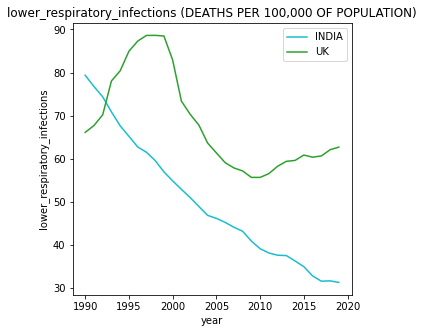

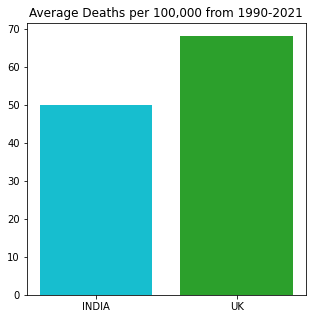



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing INDIA's and UK's neonatal_disorders deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neonatal_disorders in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neonatal_disorders in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  17.128849521
- Probability (p) value :  0.0000000000000000969264923195816509247320

- Decision
As p value ( 0.0000000000000000969264923195816509247320 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neonatal_disorders in  INDIA and UK.
Time period : Past 30 years (1991-2019)



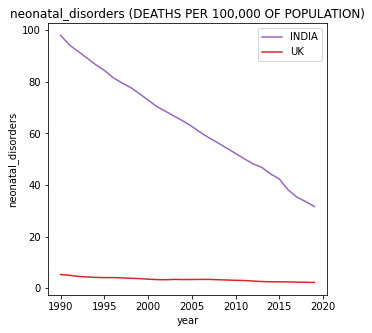

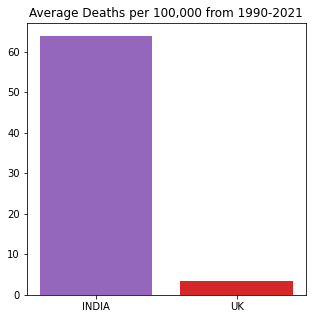



----------------------------------------------------------------------------------------------------


------------ Welch's T Test for comparing INDIA's and UK's alcohol_use_disorders deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by alcohol_use_disorders in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by alcohol_use_disorders in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -3.67541505
- Probability (p) value :  0.0009415137545706307471010676479750145518

- Decision
As p value ( 0.0009415137545706307471010676479750145518 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by alcohol_use_disorders in  INDIA and UK.
Time period : Past 30 years (1991

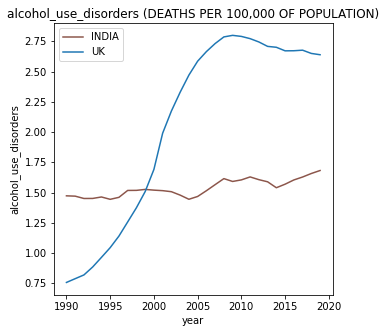

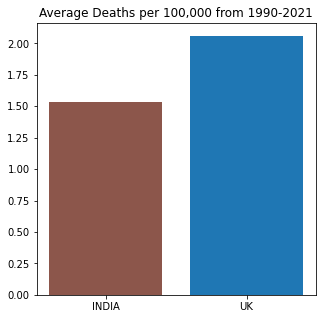



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing INDIA's and UK's self_harm deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by self_harm in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by self_harm in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  20.348331247
- Probability (p) value :  0.0000000000000000000000037384184955962091

- Decision
As p value ( 0.0000000000000000000000037384184955962091 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by self_harm in  INDIA and UK.
Time period : Past 30 years (1991-2019)



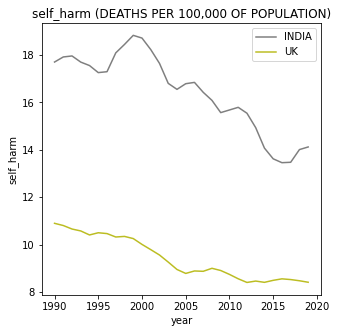

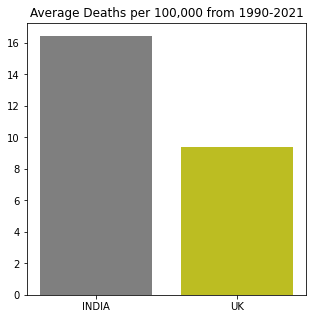



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing INDIA's and UK's exposure_to_forces_of_nature deaths. ---------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by exposure_to_forces_of_nature in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by exposure_to_forces_of_nature in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  3.840527924
- Probability (p) value :  0.0006089362423380730287431061853453684307

- Decision
As p value ( 0.0006089362423380730287431061853453684307 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by exposure_to_forces_of_nature in  INDIA and UK.
Time period 

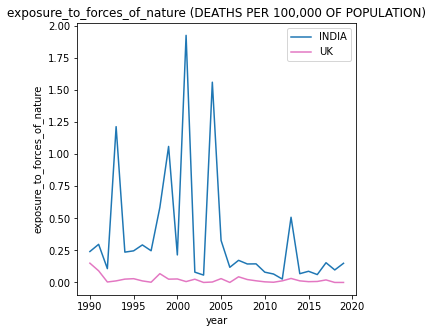

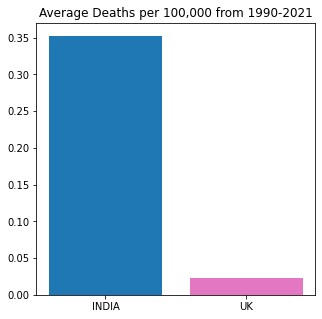



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing INDIA's and UK's diarrheal_diseases deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diarrheal_diseases in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diarrheal_diseases in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  17.221209847
- Probability (p) value :  0.0000000000000000819059562537402578637944

- Decision
As p value ( 0.0000000000000000819059562537402578637944 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diarrheal_diseases in  INDIA and UK.
Time period : Past 30 years (1991-2019)



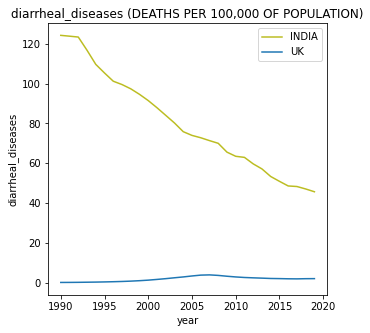

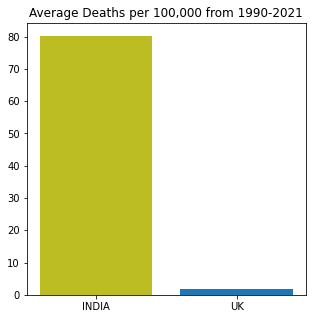



----------------------------------------------------------------------------------------------------


---- Welch's T Test for comparing INDIA's and UK's environmental_heat_and_cold_exposure deaths. -----

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by environmental_heat_and_cold_exposure in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  24.286656908
- Probability (p) value :  0.0000000000000000000000000000005003569084

- Decision
As p value ( 0.0000000000000000000000000000005003569084 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by environmental_heat_and_cold_exposure in  I

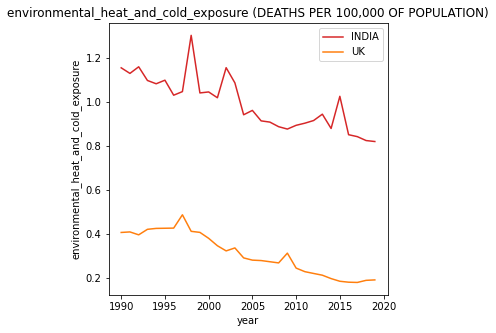

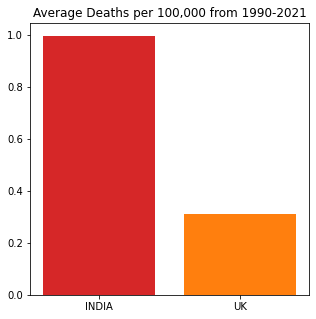



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing INDIA's and UK's neoplasms deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by neoplasms in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by neoplasms in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -118.069400261
- Probability (p) value :  0.0000000000000000000000000000000000000000

- Decision
As p value ( 0.0000000000000000000000000000000000000000 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by neoplasms in  INDIA and UK.
Time period : Past 30 years (1991-2019)



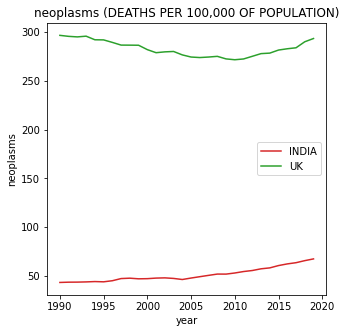

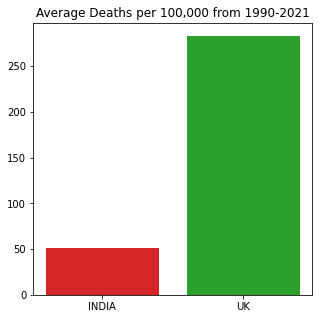



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and UK's conflict_and_terrorism deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by conflict_and_terrorism in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by conflict_and_terrorism in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  3.688587766
- Probability (p) value :  0.0006520044300607514154571875408805681218

- Decision
As p value ( 0.0006520044300607514154571875408805681218 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by conflict_and_terrorism in  INDIA and UK.
Time period : Past 30 years (1

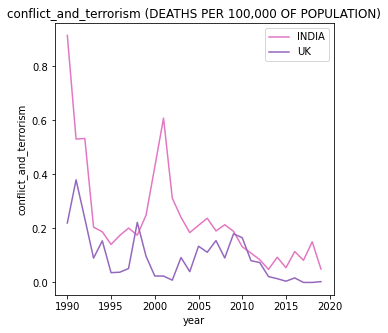

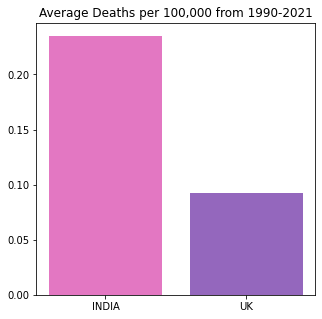



----------------------------------------------------------------------------------------------------


-------------- Welch's T Test for comparing INDIA's and UK's diabetes_mellitus deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by diabetes_mellitus in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by diabetes_mellitus in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  4.338719245
- Probability (p) value :  0.0000898053803350648728468300086014153294

- Decision
As p value ( 0.0000898053803350648728468300086014153294 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by diabetes_mellitus in  INDIA and UK.
Time period : Past 30 years (1991-2019)



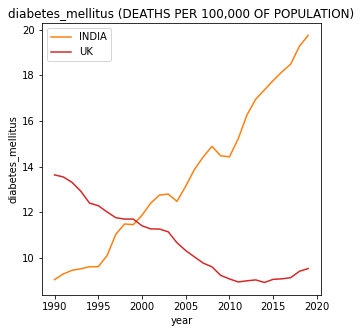

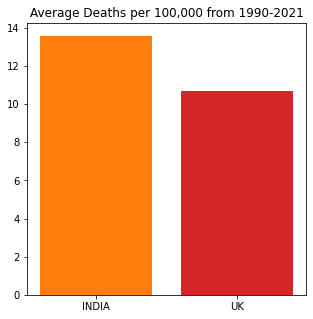



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and UK's chronic_kidney_disease deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_kidney_disease in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_kidney_disease in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  10.633836293
- Probability (p) value :  0.0000000000000033202699257498018634145872

- Decision
As p value ( 0.0000000000000033202699257498018634145872 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_kidney_disease in  INDIA and UK.
Time period : Past 30 years (

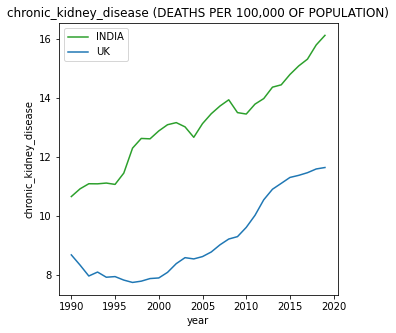

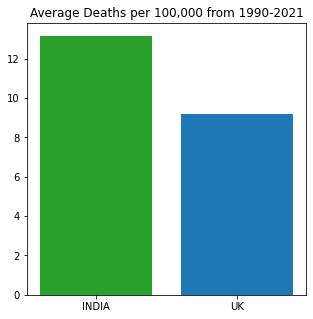



----------------------------------------------------------------------------------------------------


----------------- Welch's T Test for comparing INDIA's and UK's poisonings deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by poisonings in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by poisonings in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  4.824249757
- Probability (p) value :  0.0000119383662614863275919186921814052482

- Decision
As p value ( 0.0000119383662614863275919186921814052482 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by poisonings in  INDIA and UK.
Time period : Past 30 years (1991-2019)



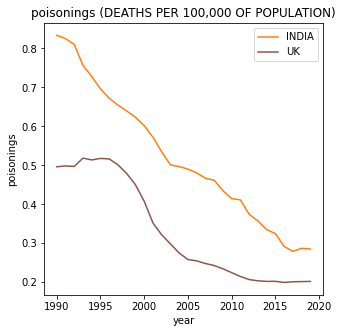

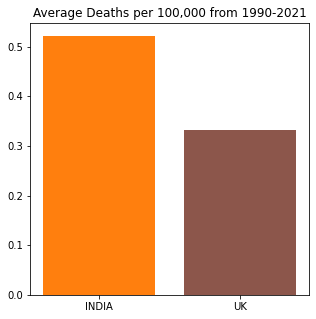



----------------------------------------------------------------------------------------------------


--------- Welch's T Test for comparing INDIA's and UK's protein_energy_malnutrition deaths. ---------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by protein_energy_malnutrition in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by protein_energy_malnutrition in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  6.26016109
- Probability (p) value :  0.0000007820964558995076444552802148735271

- Decision
As p value ( 0.0000007820964558995076444552802148735271 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by protein_energy_malnutrition in  INDIA and UK.
Time period : Pa

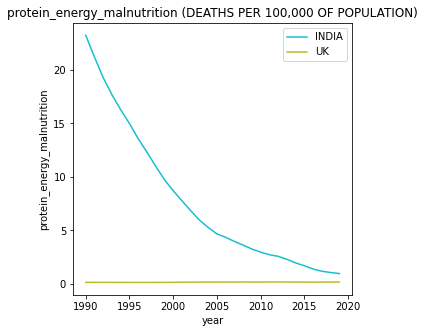

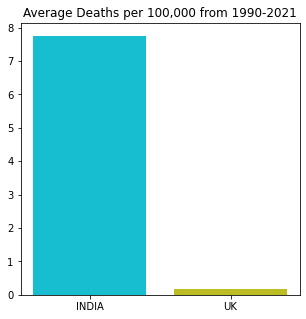



----------------------------------------------------------------------------------------------------


------------------ Welch's T Test for comparing INDIA's and UK's terrorism deaths. ------------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by terrorism in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by terrorism in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  1.929011166
- Probability (p) value :  0.0601425672073741326983942201422905782238

- Decision
As p value ( 0.0601425672073741326983942201422905782238 ) is greater than level of significance ( 0.05 ),
We Fail to reject the Null Hypothesis(Ho) {Accept Null Hypothesis(Ho)}

- Statistical Inference
There is no significant difference in the average of no. deaths caused by terrorism in  INDIA and UK.
Time period : Past 30 years (1991-2019)



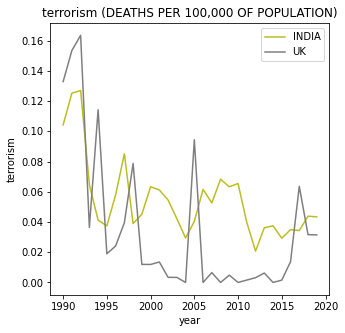

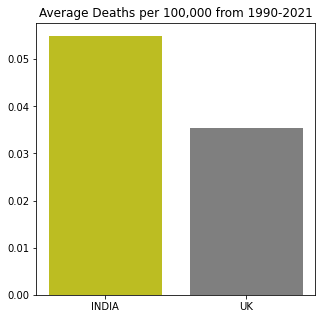



----------------------------------------------------------------------------------------------------


---------------- Welch's T Test for comparing INDIA's and UK's road_injuries deaths. ----------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by road_injuries in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by road_injuries in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  25.161234313
- Probability (p) value :  0.0000000000000000000000014874722856654508

- Decision
As p value ( 0.0000000000000000000000014874722856654508 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by road_injuries in  INDIA and UK.
Time period : Past 30 years (1991-2019)



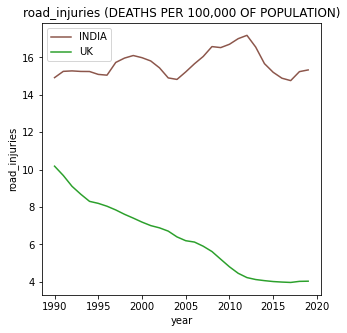

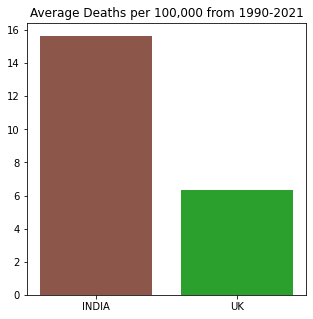



----------------------------------------------------------------------------------------------------


-------- Welch's T Test for comparing INDIA's and UK's chronic_respiratory_diseases deaths. ---------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_respiratory_diseases in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_respiratory_diseases in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  2.610931158
- Probability (p) value :  0.0117652473885605391573649924907840613741

- Decision
As p value ( 0.0117652473885605391573649924907840613741 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_respiratory_diseases in  INDIA and UK.
Time period 

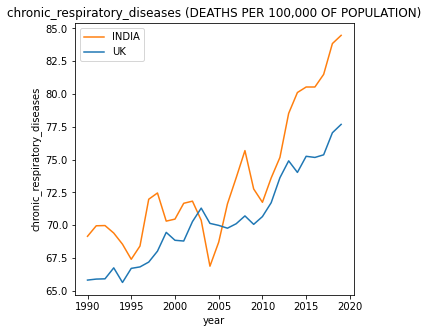

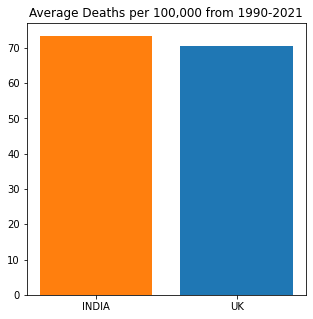



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and UK's chronic_liver_diseases deaths. ------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by chronic_liver_diseases in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by chronic_liver_diseases in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  10.854816353
- Probability (p) value :  0.0000000000001119553916243734984823422302

- Decision
As p value ( 0.0000000000001119553916243734984823422302 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by chronic_liver_diseases in  INDIA and UK.
Time period : Past 30 years (

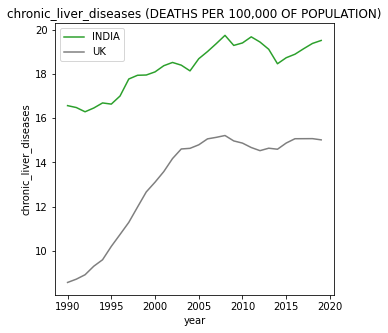

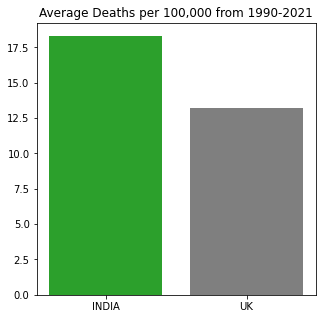



----------------------------------------------------------------------------------------------------


------------- Welch's T Test for comparing INDIA's and UK's digestive_diseases deaths. --------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by digestive_diseases in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by digestive_diseases in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  -12.105627779
- Probability (p) value :  0.0000000000000412918504058108201859332494

- Decision
As p value ( 0.0000000000000412918504058108201859332494 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by digestive_diseases in  INDIA and UK.
Time period : Past 30 years (1991-2019)


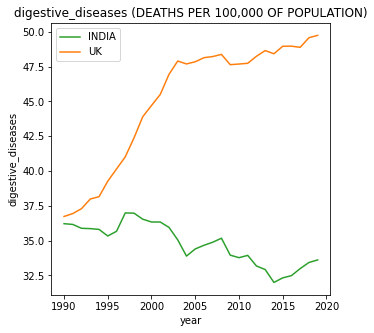

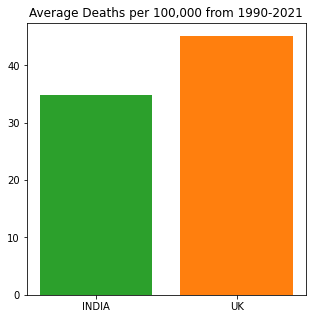



----------------------------------------------------------------------------------------------------


----------- Welch's T Test for comparing INDIA's and UK's fire_heat_hot_substance deaths. -----------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by fire_heat_hot_substance in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by fire_heat_hot_substance in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  18.705555716
- Probability (p) value :  0.0000000000000000000000000304779854564761

- Decision
As p value ( 0.0000000000000000000000000304779854564761 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by fire_heat_hot_substance in  INDIA and UK.
Time period : Past 30 year

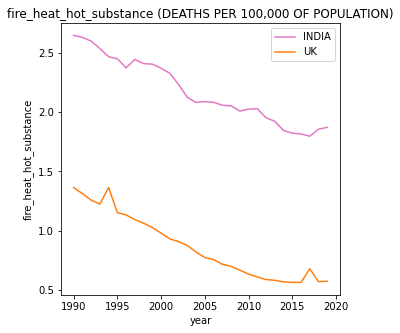

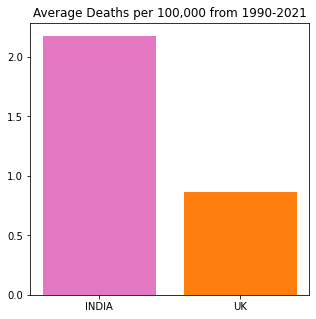



----------------------------------------------------------------------------------------------------


--------------- Welch's T Test for comparing INDIA's and UK's acute_hepatitis deaths. ---------------

 -> Null Hypothesis (Ho) [µO=µ1]
There is no significant difference in the average of deaths caused by acute_hepatitis in  INDIA and UK.

 -> Allternate Hypothesis (H1) [µO≠µ1]
There is a significant difference in the average of deaths caused by acute_hepatitis in  INDIA and UK.

 -> Confidence Level Interval : 0.95

- Statistic (t) value :  17.85518407
- Probability (p) value :  0.0000000000000000346674941467670950177382

- Decision
As p value ( 0.0000000000000000346674941467670950177382 ) is less than level of significance ( 0.05 ),
We Reject the Null Hypothesis(Ho) {Accept Alternate Hypothesis(H1)}

- Statistical Inference
There is a significant difference in the average of no. deaths caused by acute_hepatitis in  INDIA and UK.
Time period : Past 30 years (1991-2019)



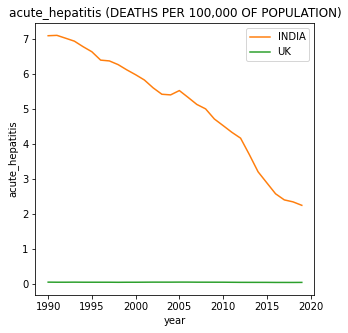

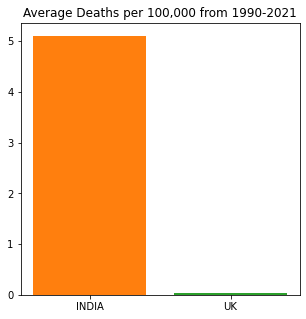



----------------------------------------------------------------------------------------------------




In [188]:
finalResult(df_india, df_uk,ind_uk_t_test ,"INDIA","UK",0.05,show_only_nnullAcceptance = False)